<h2 style='text-align:center;font-size:80px;background-color:purple;border:80px;color:white'>  Housing Price Prediction Project . <h2>

# Problem Statement:

### Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
**A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.**
**The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know :-**

- **`Which variables are important to predict the price of variable?`**

- **`How do these variables describe the price of the house?`**

# Business Goal:

### You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market..

# Technical Requirements:

**◾ Data contains 1460 entries each having 81 variables.**

**• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.**

**• Extensive EDA has to be performed to gain relationships of important variable and price.**

**• Data contains numerical as well as categorical variable. You need to handle them accordingly.**

**• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters.**

**• You need to find important features which affect the price positively or negatively.**

**• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
test.csv file.**


# -----------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading train.csv file
train_df = pd.read_csv("train.csv")
train_df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   127         120       RL          NaN     4928   Pave   NaN      IR1   
1   889          20       RL         95.0    15865   Pave   NaN      IR1   
2   793          60       RL         92.0     9920   Pave   NaN      IR1   
3   110          20       RL        105.0    11751   Pave   NaN      IR1   
4   422          20       RL          NaN    16635   Pave   NaN      IR1   
5  1197          60       RL         58.0    14054   Pave   NaN      IR1   
6   561          20       RL          NaN    11341   Pave   NaN      IR1   
7  1041          20       RL         88.0    13125   Pave   NaN      Reg   
8   503          20       RL         70.0     9170   Pave   NaN      Reg   
9   576          50       RL         80.0     8480   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
5         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
6         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
7         Lvl    AllPub    Corner       Gtl       Sawyer       Norm   
8         Lvl    AllPub    Corner       Gtl      Edwards      Feedr   
9         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   
5       Norm     1Fam     2Story            7            5       2006   
6       Norm     1Fam     1Story            5            6       1957   
7       Norm     1Fam     1Story            5            4       1957   
8       Norm     1Fam     1Story            5            7       1965   
9       Norm     1Fam     1.5Fin            5            5       1947   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   
5          2006     Gable  CompShg     VinylSd     VinylSd       None   
6          1996       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
7          2000     Gable  CompShg     Wd Sdng     Wd Sdng     BrkCmn   
8          1965       Hip  CompShg     MetalSd     MetalSd       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   
5         0.0        Gd        TA      PConc       Gd       TA           Av   
6       180.0        TA        TA     CBlock       Gd       TA           No   
7        67.0        TA        TA     CBlock       TA       TA           No   
8         0.0        TA        TA     CBlock       TA       TA     

In [4]:
# Reading test.csv file
test_df = pd.read_csv("test.csv")
test_df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   
5   650         180       RM         21.0     1936   Pave   NaN      Reg   
6  1453         180       RM         35.0     3675   Pave   NaN      Reg   
7   152          20       RL        107.0    13891   Pave   NaN      Reg   
8   427          80       RL          NaN    12800   Pave   NaN      Reg   
9   776         120       RM         32.0     4500   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
5         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
6         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
7         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
8         Low    AllPub    Inside       Mod      SawyerW       Norm   
9         Lvl    AllPub       FR2       Gtl      Mitchel       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   
5       Norm    Twnhs     SFoyer            4            6       1970   
6       Norm   TwnhsE       SLvl            5            5       2005   
7       Norm     1Fam     1Story            8            5       2007   
8       Norm     1Fam       SLvl            7            5       1989   
9       Norm   TwnhsE     1Story            6            5       1998   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
5          1970     Gable  CompShg     CemntBd     CmentBd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd    BrkFace   
7          2008       Hip  CompShg     VinylSd     VinylSd      Stone   
8          1989     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
9          1998       Hip  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   
5         0.0        TA        TA     CBlock       Gd       TA           Av   
6        80.0        TA        TA      PConc       Gd       TA           Gd   
7       436.0        Gd        TA      PConc       Ex       TA           Gd   
8       145.0        Gd        TA      PConc       Gd       TA     

### The datatsets contains both numerical and categorical data types. And we can notice missing values in some of the columns.The train dataset is comprised of both dependent variable (target) and independent variables. Here "SalesPrice" is our label which is continuous in nature so, it is a "Regression Type Problem" where I need to predict the sales price of the house and The test dataset contains only independent variables .So, I will use train dataset for building our model and then will use the test dataset for getting prediction from the trained model

<h2 style='text-align:center;font-size:80px;background-color:purple;border:80px;color:white'>  EDA  <h2>

In [5]:
# Checking the dimensions of both train and test dataset
print("Shape of train dataset is:",train_df.shape)
print("Shape of test dataset is:",test_df.shape)

Shape of train dataset is: (1168, 81)
Shape of test dataset is: (292, 80)


In [6]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# Checking the type of train dataset
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
# Checking the type of test dataset
test_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## As per different data types in the dataset ,it is needed to be encoded before Building a model

In [10]:
# To get good overview of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.Since counts of some of the columns are different, which means there are null values present in the dataset.

In [11]:
# To get good overview of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [12]:
# Checking number of unique values in each column of train dataset
train_df.nunique().to_frame("No of Unique Values")

No of Unique Values
Id                            1168
MSSubClass                      15
MSZoning                         5
LotFrontage                    106
LotArea                        892
Street                           2
Alley                            2
LotShape                         4
LandContour                      4
Utilities                        1
LotConfig                        5
LandSlope                        3
Neighborhood                    25
Condition1                       9
Condition2                       8
BldgType                         5
HouseStyle                       8
OverallQual                     10
OverallCond                      9
YearBuilt                      110
YearRemodAdd                    61
RoofStyle                        6
RoofMatl                         8
Exterior1st                     14
Exterior2nd                     15
MasVnrType                       4
MasVnrArea                     283
ExterQual                        4
ExterCond                        5
Foundation                       6
BsmtQual                         4
BsmtCond                         4
BsmtExposure                     4
BsmtFinType1                     6
BsmtFinSF1                     551
BsmtFinType2                     6
BsmtFinSF2                     122
BsmtUnfSF                      681
TotalBsmtSF                    636
Heating                          6
HeatingQC                        5
CentralAir                       2
Electrical                       5
1stFlrSF                       669
2ndFlrSF                       351
LowQualFinSF                    21
GrLivArea                      746
BsmtFullBath                     4
BsmtHalfBath                     3
FullBath                         4
HalfBath                         3
BedroomAbvGr                     8
KitchenAbvGr                     4
KitchenQual                      4
TotRmsAbvGrd                    12
Functional                       7
Fireplaces                       4
FireplaceQu                      5
GarageType                       6
GarageYrBlt                     97
GarageFinish                     3
GarageCars                       5
GarageArea                     392
GarageQual                       5
GarageCond                       5
PavedDrive                       3
WoodDeckSF                     244
OpenPorchSF                    176
EnclosedPorch                  106
3SsnPorch                       18
ScreenPorch                     65
PoolArea                         8
PoolQC                           3
Fence                            4
MiscFeature                      4
MiscVal                         20
MoSold                          12
YrSold                           5
SaleType                         9
SaleCondition                    6
SalePrice                      581

### Above are the number of unique values present in the columns of the train dataset.from the nunique() method we can notice the column "Id" is the unique Id number given to the house and it has no significance in the prediction so let's drop it.Also the column "Utilities" has only one unique value AllPub (All public Utilities) throughout the column, so it can be dropped as it won't affect the model.

In [13]:
# Dropping irrelevant columns
train_df.drop("Id",axis=1,inplace=True)
train_df.drop("Utilities",axis=1,inplace=True)

In [14]:
# Checking number of unique values in each column of test dataset
test_df.nunique().to_frame("No of Unique Values")

No of Unique Values
Id                             292
MSSubClass                      15
MSZoning                         4
LotFrontage                     65
LotArea                        249
Street                           2
Alley                            2
LotShape                         4
LandContour                      4
Utilities                        2
LotConfig                        5
LandSlope                        3
Neighborhood                    24
Condition1                       8
Condition2                       2
BldgType                         5
HouseStyle                       8
OverallQual                      8
OverallCond                      7
YearBuilt                       84
YearRemodAdd                    57
RoofStyle                        5
RoofMatl                         3
Exterior1st                     12
Exterior2nd                     14
MasVnrType                       4
MasVnrArea                     104
ExterQual                        4
ExterCond                        4
Foundation                       6
BsmtQual                         4
BsmtCond                         3
BsmtExposure                     4
BsmtFinType1                     6
BsmtFinSF1                     184
BsmtFinType2                     6
BsmtFinSF2                      32
BsmtUnfSF                      231
TotalBsmtSF                    224
Heating                          4
HeatingQC                        4
CentralAir                       2
Electrical                       4
1stFlrSF                       238
2ndFlrSF                       113
LowQualFinSF                     4
GrLivArea                      246
BsmtFullBath                     3
BsmtHalfBath                     2
FullBath                         4
HalfBath                         3
BedroomAbvGr                     7
KitchenAbvGr                     3
KitchenQual                      4
TotRmsAbvGrd                    10
Functional                       6
Fireplaces                       3
FireplaceQu                      5
GarageType                       6
GarageYrBlt                     71
GarageFinish                     3
GarageCars                       5
GarageArea                     166
GarageQual                       5
GarageCond                       5
PavedDrive                       3
WoodDeckSF                      87
OpenPorchSF                     92
EnclosedPorch                   36
3SsnPorch                        3
ScreenPorch                     21
PoolArea                         1
PoolQC                           0
Fence                            4
MiscFeature                      2
MiscVal                          8
MoSold                          12
YrSold                           5
SaleType                         6
SaleCondition                    4

### Above are the number of unique values present in the columns of the test dataset.Here also the column "Id" has no singnificance in the prediction. So I am going to remove it.The column "Utilities" also had been dropped in train dataset, so dropping the same column in test as well to keep the dimension of both the datasets same.

In [15]:
# Dropping irrelevant columns
test_df.drop("Id",axis=1,inplace=True)
test_df.drop("Utilities",axis=1,inplace=True)

In [16]:
# Checking the value counts of each columns of train dataset
for i in train_df.columns:
        print(train_df[i].value_counts())
        print('*'*100)

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
****************************************************************************************************
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
****************************************************************************************************
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
65.0      35
85.0      26
90.0      20
78.0      19
73.0      16
24.0      16
68.0      16
79.0      14
21.0      14
64.0      14
51.0      13
72.0      13
55.0      13
100.0     12
59.0      12
82.0      12
63.0      11
71.0      11
74.0      11
53.0      10
69.0      10
66.0      10
88.0      10
84.0       9
34.0       9
67.0       9
77.0       8
40.0       8
52.0       8
43.0       8
76.0       8
92.0       8
57.0       7
86.0

### These are the value counts of the columns present in the train dataset.

- `From the value count funtion I can observe most of the columns contains maximum amount of zero values which is even not required for the prediction.`
- `The columns 'LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal' and 'BsmtFinSF2' have more than 90% zero values. So I am going to drop these columns.`
- `Also some of the columns like BsmtFinSF, BsmtHalfBath, etc have large amount of zero values.  Since I am assuming, the houses which have no basements could be calculated as zero square feet. So, I am keeping those columns as it is.`

**Let's take a quick look at the columns having maximum zero values by using below code.** 


# Dealing with zero values

In [18]:
Zero_value = pd.DataFrame(train_df.isin([0]).sum().sort_values(ascending=False))
Zero_value.columns=['Count of Zero values']
Zero_value['% of Zero values']=Zero_value['Count of Zero values']/11.68     # 1168/100 = 11.68
Zero_value

Count of Zero values  % of Zero values
PoolArea                       1161         99.400685
3SsnPorch                      1146         98.116438
LowQualFinSF                   1145         98.030822
MiscVal                        1126         96.404110
BsmtHalfBath                   1105         94.606164
ScreenPorch                    1073         91.866438
BsmtFinSF2                     1032         88.356164
EnclosedPorch                   999         85.530822
HalfBath                        724         61.986301
MasVnrArea                      692         59.246575
BsmtFullBath                    686         58.732877
2ndFlrSF                        663         56.763699
WoodDeckSF                      603         51.626712
Fireplaces                      551         47.174658
OpenPorchSF                     531         45.462329
BsmtFinSF1                      375         32.106164
BsmtUnfSF                        97          8.304795
GarageArea                       64          5.479452
GarageCars                       64          5.479452
TotalBsmtSF                      30          2.568493
FullBath                          7          0.599315
BedroomAbvGr                      4          0.342466
KitchenAbvGr                      1          0.085616
Functional                        0          0.000000
GrLivArea                         0          0.000000
KitchenQual                       0          0.000000
TotRmsAbvGrd                      0          0.000000
MSSubClass                        0          0.000000
FireplaceQu                       0          0.000000
GarageType                        0          0.000000
GarageYrBlt                       0          0.000000
GarageQual                        0          0.000000
GarageCond                        0          0.000000
PavedDrive                        0          0.000000
PoolQC                            0          0.000000
Fence                             0          0.000000
MiscFeature                       0          0.000000
MoSold                            0          0.000000
YrSold                            0          0.000000
SaleType                          0          0.000000
SaleCondition                     0          0.000000
GarageFinish                      0          0.000000
CentralAir                        0          0.000000
1stFlrSF                          0          0.000000
Electrical                        0          0.000000
OverallCond                       0          0.000000
OverallQual                       0          0.000000
HouseStyle                        0          0.000000
BldgType                          0          0.000000
Condition2                        0          0.000000
Condition1                        0          0.000000
Neighborhood                      0          0.000000
LandSlope                         0          0.000000
LotConfig                         0          0.000000
LandContour                       0          0.000000
LotShape                          0          0.000000
Alley                             0          0.000000
Street                            0          0.000000
LotArea                           0          0.000000
LotFrontage                       0          0.000000
YearBuilt                         0          0.000000
YearRemodAdd                      0          0.000000
RoofStyle                         0          0.000000
BsmtCond                          0          0.000000
MSZoning                          0          0.000000
HeatingQC                         0          0.000000
Heating                           0          0.000000
BsmtFinType2                      0          0.000000
BsmtFinType1                      0          0.000000
BsmtExposure                      0          0.000000
BsmtQual                          0          0.000000
RoofMatl                          0          0.000000
Foundation                        0          0.000000
ExterCond          

In [19]:
## Dropping the columns containing maximum amount(90%) of zero values
train_df.drop(columns = ['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF2'],inplace = True)

# Now let's check the value counts of test dataset

In [20]:
# Checking the value counts of each columns of test dataset
for i in test_df.columns:
        print(test_df[i].value_counts())
        print('*'*100)

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
180      4
190      4
45       2
75       2
85       1
40       1
Name: MSSubClass, dtype: int64
****************************************************************************************************
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
****************************************************************************************************
60.0     32
85.0     14
50.0     13
70.0     12
21.0      9
65.0      9
80.0      9
75.0      7
52.0      6
63.0      6
78.0      6
66.0      5
64.0      5
57.0      5
43.0      4
72.0      4
55.0      4
100.0     4
40.0      4
74.0      4
102.0     3
48.0      3
93.0      3
79.0      3
86.0      3
110.0     3
67.0      3
90.0      3
68.0      3
44.0      3
76.0      3
24.0      3
56.0      2
83.0      2
58.0      2
92.0      2
32.0      2
35.0      2
73.0      2
47.0      2
96.0      2
107.0     2
42.0     

GasA    285
GasW      4
Grav      2
OthW      1
Name: Heating, dtype: int64
****************************************************************************************************
Ex    156
TA     76
Gd     49
Fa     11
Name: HeatingQC, dtype: int64
****************************************************************************************************
Y    275
N     17
Name: CentralAir, dtype: int64
****************************************************************************************************
SBrkr    264
FuseA     20
FuseF      6
FuseP      1
Name: Electrical, dtype: int64
****************************************************************************************************
864     6
630     4
840     4
698     4
990     4
672     3
980     3
848     3
1040    3
1004    3
1314    2
1836    2
1048    2
858     2
959     2
1056    2
1113    2
1504    2
953     2
1630    2
1088    2
483     2
1689    2
938     2
912     2
789     2
923     2
1360    2
1344    2
972     2
988     2
1022    

TA    265
Fa      7
Po      1
Ex      1
Gd      1
Name: GarageCond, dtype: int64
****************************************************************************************************
Y    269
N     16
P      7
Name: PavedDrive, dtype: int64
****************************************************************************************************
0      158
100     10
192     10
168      8
120      6
144      4
224      3
140      3
178      2
160      2
125      2
216      2
106      2
220      2
264      2
172      2
28       2
316      2
80       2
74       1
519      1
105      1
295      1
40       1
149      1
147      1
208      1
400      1
68       1
97       1
12       1
154      1
58       1
115      1
206      1
30       1
536      1
195      1
145      1
126      1
156      1
139      1
135      1
306      1
276      1
280      1
320      1
314      1
122      1
342      1
270      1
728      1
335      1
209      1
185      1
108      1
238      1
448      1
88       1
327      1

### These are the value counts of the columns present in the test dataset.

**Here also I can observe most of the columns contains maximum amount of zero values which is even not required for the prediction.**
**The columns 'LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal' and 'BsmtFinSF2' have more than 90% zero values which is same as in the case of train dataset. So I am going to drop these columns.**

In [21]:
# Dropping the columns containing maximum amount(90%) of zero values
test_df.drop(columns = ['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF2'],inplace = True)

# Time variables in tain/test dataset

### From the Dataset we have 4 year variables YearBuilt, YearRemodAdd, GarageYrBlt and YrSold . Converting them into age variables seem more meaningful, as they offer more information about the longevity of the feature.Let's extract age information from the datetime variables by taking difference in years between the year the house was built and the year the house was sold

In [22]:
# Let's subtract built year by year sold in order to get  the age
train_df["AgeBuilt"] = train_df.YrSold - train_df.YearBuilt
train_df["AgeRemod"] = train_df.YrSold - train_df.YearRemodAdd
train_df["AgeGarage"] = train_df.YrSold - train_df.GarageYrBlt

In [23]:
# Dropping YearBuilt, YearRemodAdd and GarageYrBlt as I have already got the required value from it.
train_df.drop("YearBuilt",axis=1,inplace=True)
train_df.drop("YearRemodAdd",axis=1,inplace=True)
train_df.drop("GarageYrBlt",axis=1,inplace=True)

In [25]:
# Let's subtract built year by year sold in order to get  the age
test_df["AgeBuilt"] = test_df.YrSold - test_df.YearBuilt
test_df["AgeRemod"] = test_df.YrSold - test_df.YearRemodAdd
test_df["AgeGarage"] = test_df.YrSold - test_df.GarageYrBlt

In [26]:
# Dropping YearBuilt, YearRemodAdd and GarageYrBlt as I have already got the required value from it.
test_df.drop("YearBuilt",axis=1,inplace=True)
test_df.drop("YearRemodAdd",axis=1,inplace=True)
test_df.drop("GarageYrBlt",axis=1,inplace=True)

# Checking null values in train dataset

In [28]:
# Displaying the columns containing null values count and their % i.e. ((count of null)/1168)/100

train_null = pd.DataFrame(train_df[train_df.columns[train_df.isnull().any()]].isnull().sum())
train_null.columns=['Count of Null Values']
train_null['% of Null Values']=train_null['Count of Null Values']/11.68     # 1168/100 = 11.68
train_null

Count of Null Values  % of Null Values
LotFrontage                    214         18.321918
Alley                         1091         93.407534
MasVnrType                       7          0.599315
MasVnrArea                       7          0.599315
BsmtQual                        30          2.568493
BsmtCond                        30          2.568493
BsmtExposure                    31          2.654110
BsmtFinType1                    30          2.568493
BsmtFinType2                    31          2.654110
FireplaceQu                    551         47.174658
GarageType                      64          5.479452
GarageFinish                    64          5.479452
GarageQual                      64          5.479452
GarageCond                      64          5.479452
PoolQC                        1161         99.400685
Fence                          931         79.708904
MiscFeature                   1124         96.232877
AgeGarage                       64          5.479452

- **`Above are the columns of train dataset containing null values. Let's treat these null values using appropriate imputation techniques.`**
- **`The columns PoolQC, MiscFeature, Alley and Fence have null values more than 70%, filing them with imputation methods is meaningless. So let me drop them as they have no importance in the prediction`**

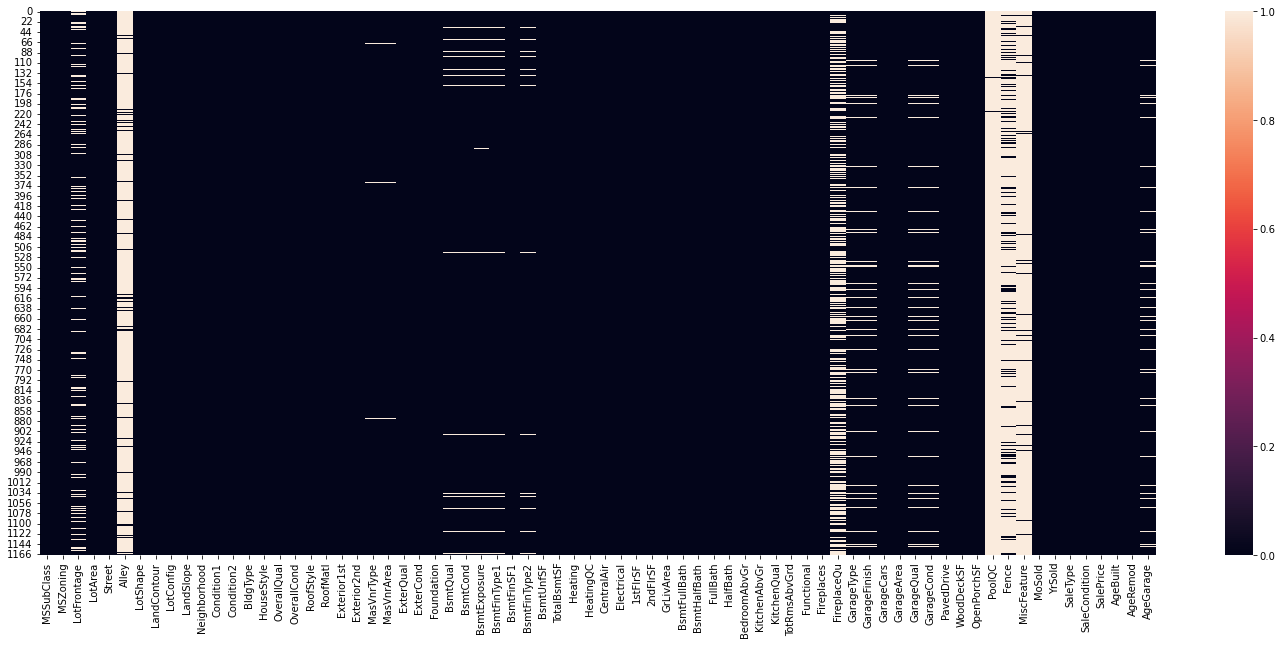

In [29]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(25,10))
sns.heatmap(train_df.isnull(), cmap="rocket")
plt.show()

# Light color show Null Value

In [30]:
# Dropping the columns containing more than 70% of the null values
train_df.drop(["PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)


# Treating null values using imputation techniques

- `1. The columns LotFrontage, MasVnrArea and GarageYrBlt are numerical in nature, let's fill the null values using mean values as there are no outliers present in these columns.`
- `2. The remaining columns seems to be categorical so filling the null values using mode.`

In [31]:
# Filling null values of object data column with their mode values (most frequently occurred values).

col1=train_df.columns.values
for i in range(0,len(col1)):
    if train_df[col1[i]].dtype == "object":
        train_df[col1[i]].fillna(train_df[col1[i]].mode()[0], inplace=True)

In [32]:
# Filling null values of numerical columns with their mean values

col2=train_df.columns.values
for i in range(0,len(col2)):
    if train_df[col2[i]].dtype != "object":
        train_df[col2[i]].fillna(train_df[col2[i]].mean(), inplace=True)

In [33]:
train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish

## I have filled all the null values using mean and mode method. Let's visualize it using heat map.

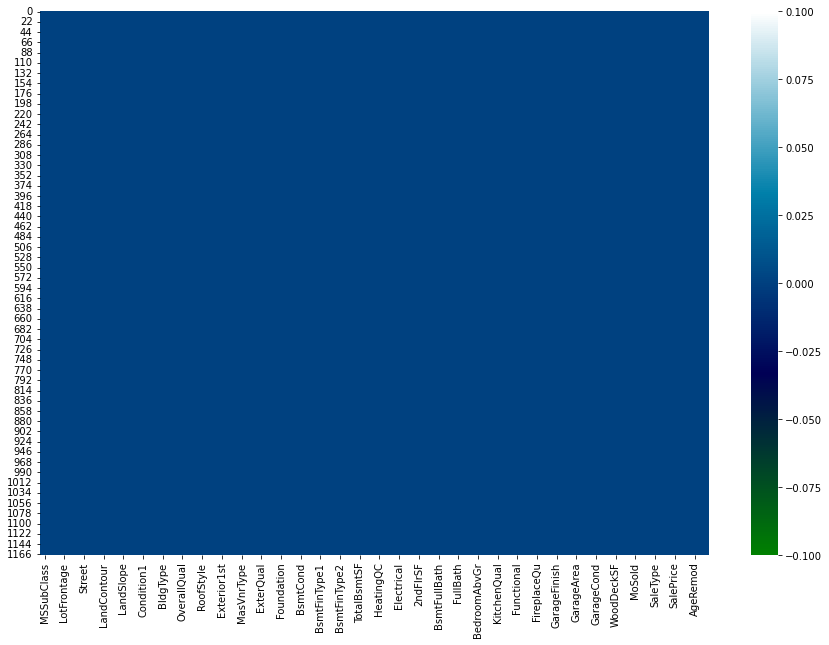

In [35]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,10))
sns.heatmap(train_df.isnull(), cmap="ocean")
plt.show()

## NO null value is present

# `Checking null values in test dataset`

In [36]:
# Displaying the columns containing null values count and their % i.e. ((count of null)/292)/100

test_null = pd.DataFrame(test_df[test_df.columns[test_df.isnull().any()]].isnull().sum())
test_null.columns=['Count of Null Values']
test_null['% of Null Values']=test_null['Count of Null Values']/2.92     # 292/100 = 11.68
test_null

Count of Null Values  % of Null Values
LotFrontage                     45         15.410959
Alley                          278         95.205479
MasVnrType                       1          0.342466
MasVnrArea                       1          0.342466
BsmtQual                         7          2.397260
BsmtCond                         7          2.397260
BsmtExposure                     7          2.397260
BsmtFinType1                     7          2.397260
BsmtFinType2                     7          2.397260
Electrical                       1          0.342466
FireplaceQu                    139         47.602740
GarageType                      17          5.821918
GarageFinish                    17          5.821918
GarageQual                      17          5.821918
GarageCond                      17          5.821918
PoolQC                         292        100.000000
Fence                          248         84.931507
MiscFeature                    282         96.575342
AgeGarage                       17          5.821918

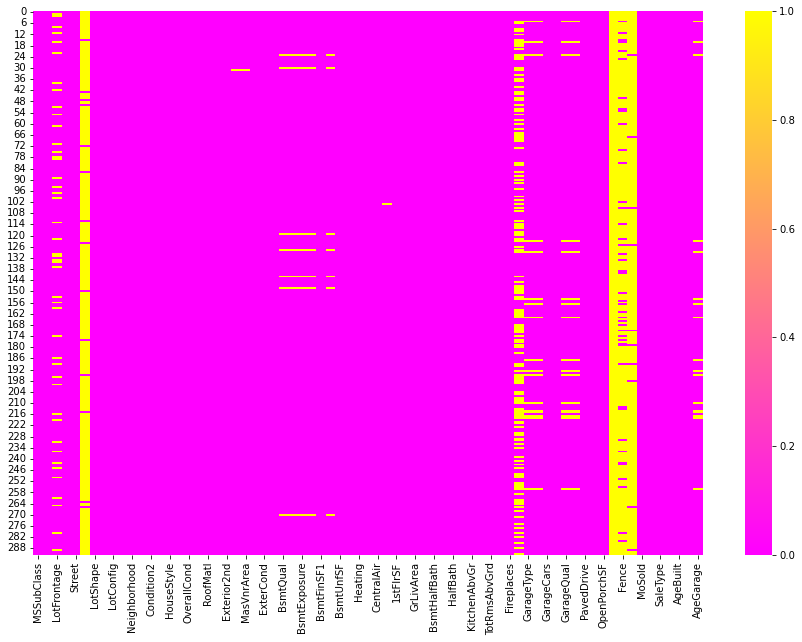

In [38]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,10))
sns.heatmap(test_df.isnull(), cmap="spring")
plt.show()

In [39]:
# Dropping the columns containing more than 70% of the null values
test_df.drop(["PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

### Treating null values using imputation techniques
- `The columns LotFrontage, MasVnrArea and GarageYrBlt are numerical in nature, let's fill the null values using mean values as there are no outliers present in these columns.`
- `The remaining columns seems to be categorical so filling the null values using mode method.`

In [40]:
# Filling null values of object data column with their mode values (most frequently occurred values).

cols1=test_df.columns.values
for i in range(0,len(cols1)):
    if test_df[cols1[i]].dtype == "object":
        test_df[cols1[i]].fillna(test_df[cols1[i]].mode()[0], inplace=True)

In [41]:
# Filling null values of numerical columns with their mean values

cols2=test_df.columns.values
for i in range(0,len(cols2)):
    if test_df[cols2[i]].dtype != "object":
        test_df[cols2[i]].fillna(test_df[cols2[i]].mean(), inplace=True)

In [42]:
test_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish

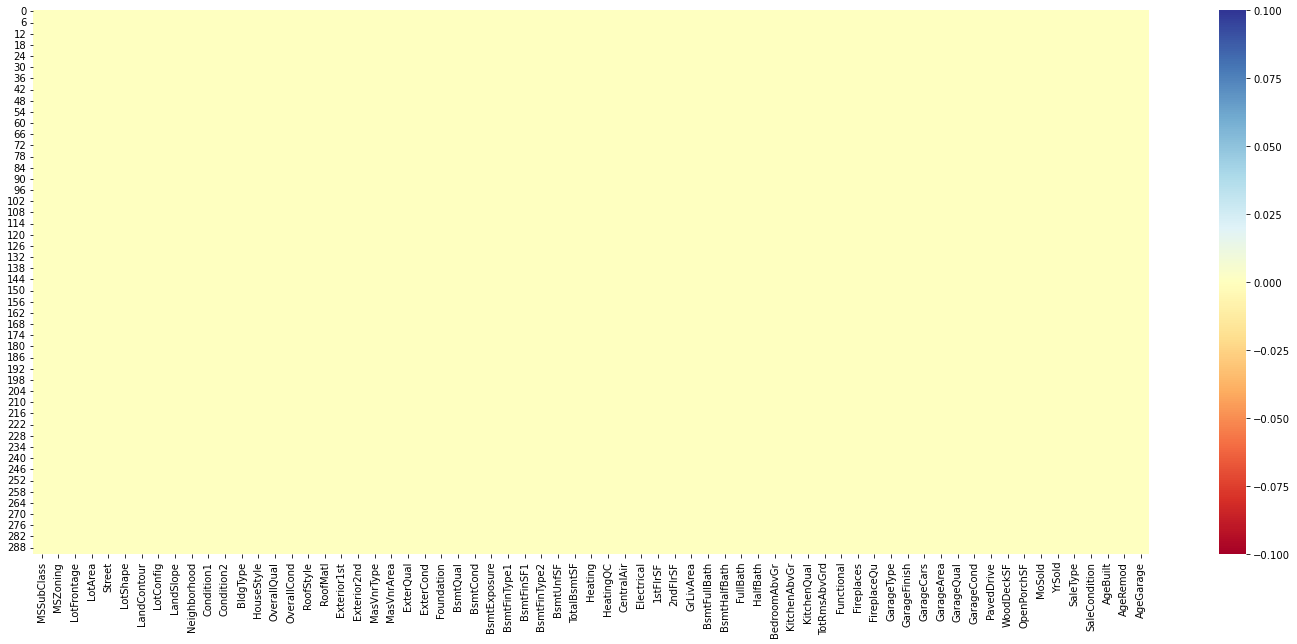

In [44]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(25,10))
sns.heatmap(test_df.isnull(), cmap="RdYlBu")
plt.show()

In [45]:
# Checking the uniqueness of target column
train_df["SalePrice"].unique()

array([128000, 268000, 269790, 190000, 215000, 219210, 121500, 155000,
       140000, 118500, 119500, 237000, 201000, 126500, 135500, 165000,
       120500, 194500, 148000, 106000, 231500, 133000, 142125, 136500,
       146000, 217000, 112000, 394432, 113000, 188700, 319900, 135000,
       128500, 169000, 122000, 152000, 243000, 156000,  79500, 132000,
       144152, 130000, 149900, 124500, 179000, 147000,  39300, 312500,
       256000,  60000, 153000,  84900, 230000, 180000, 106500, 239000,
       107500, 123000, 176000, 228500, 117500, 350000, 200624, 173000,
       225000,  84500, 174900,  79000, 297000,  87000, 465000, 204900,
       127000, 159000, 170000, 159500, 102000, 109500, 163990, 189950,
       119000, 157500, 287000, 144000, 286000, 172000, 212000, 124000,
       150000, 205950, 251000, 129000, 223500, 475000, 335000, 115000,
       205000, 209500, 176432, 171000, 302000, 259500, 141000, 187500,
       385000, 275000, 108000,  89500, 109900, 185000, 143000, 127500,
      

In [46]:
# Checking the dimensions of both train and test dataset
print("Shape of train dataset is:",train_df.shape)
print("Shape of test dataset is:",test_df.shape)

Shape of train dataset is: (1168, 68)
Shape of test dataset is: (292, 67)


# `Now Lets Separate numerical and categorical columns`

## In train dataset

In [47]:
# Checking for categorical columns
categorical_coltr=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]=='object':
        categorical_coltr.append(i)
print("Categorical columns in train dataset are:\n",categorical_coltr)

Categorical columns in train dataset are:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [48]:
# Now checking for numerical columns
numerical_coltr=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]!='object':
        numerical_coltr.append(i)
print("Numerical columns in train dataset are:\n",numerical_coltr)

Numerical columns in train dataset are:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice', 'AgeBuilt', 'AgeRemod', 'AgeGarage']


## In test dataset

In [49]:
# Checking for categorical columns
categorical_coltest=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]=='object':
        categorical_coltest.append(i)
print("Categorical columns in test dataset are:\n",categorical_coltest)

Categorical columns in test dataset are:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [50]:

# Now checking for numerical columns
numerical_coltest=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]!='object':
        numerical_coltest.append(i)
print("Numerical columns in test dataset are:\n",numerical_coltest)

Numerical columns in test dataset are:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'AgeBuilt', 'AgeRemod', 'AgeGarage']


<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:green'>  DESCRIPTIVE STATISTICS  <h2>

# Train

In [52]:
# Statistical summary of dataset
train_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    102.310078   444.726027   569.721747  1061.095034  1169.860445   
std     182.047152   462.664785   449.375525   442.272249   391.161983   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   216.000000   799.000000   892.000000   
50%       0.000000   385.500000   474.000000  1005.500000  1096.500000   
75%     160.000000   714.500000   816.000000  1291.500000  1392.000000   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count  1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean    348.826199  1525.066781      0.425514      0.055651     1.562500   
std     439.696370   528.042957      0.521615      0.236699     0.551882   
min       0.000000   334.000000      0.000000      0.000000     0.000000   
25%       0.000000  1143.250000      0.000000      0.000000     1.000000   
50%       0.000000  1468.500000      0.000000      0.000000     2.000000   
75%     729.000000  1795.000000      1.000000      0.000000     2.000000   
max    2065.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF       MoSold  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.776541   476.860445    96.206336    46.559932     6.344178   
std       0.745554   214.466769   126.158988    66.381023     2.686352   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000   338.000000     0.000000     0.000000     5.000000   
50%       2.000000   480.000000     0.000000    24.000000     6.000000   
75%       2.000000   576.000000   171.000000    70.000000     8.000000   
max       4.000000  1418.000000   857.000000   547.000000    12.000000   

            YrSold      SalePrice     AgeBuilt     AgeRemod    AgeGarage  
count  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000  
mean   2007.804795  181477.005993    36.874144    23.046233    29.608696  
std       1.329738   79105.586863    30.193130    20.783486    24.247703  
min    2006.000000   34900.000000     0.000000    -1.000000     0.000000  
25%    2007.000000  130375.000000     8.000000     4.000000     7.000000  
50%    2008.000000  163995.000000    36.000000    14.000000    29.608696  
75%    2009.000000  215000.000000    54.000000    42.000000    46.250000  
max    201

## This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

**From the above description we can observe the following things**

- **`The counts of every column is same which means there are no missing values preent in the dataset.`**
- **`In some of the columns the mean value is greater than the median(50%), which means they are sjewed to right.`**
- **`The median(50%) is bit greater than mean in some of the columns so they are skewed to left.`**
- **`From the description we can say that the mean sales price of the house is around 181477 dollars(say), maximum sale price is 755000 and min is 163995.`**
- **`By summarizing the data I can notice there is huge difference between maximum value and 75% percentile that leads to large number of outliers present in the dataset.`**
- **`I will remove these outliers using either Zscore or IQR method.`**

# Test

In [53]:
# Statistical summary of dataset
test_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   292.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    19.975962   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    57.750000    7200.000000     5.000000     5.000000   
50%     50.000000    66.425101    9200.000000     6.000000     5.000000   
75%     70.000000    76.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean    109.171821   439.294521   557.315068  1042.767123  1133.691781   
std     174.729023   429.559675   411.043768   424.561153   366.941919   
min       0.000000     0.000000     0.000000     0.000000   372.000000   
25%       0.000000     0.000000   255.000000   771.750000   858.000000   
50%       0.000000   369.500000   487.000000   971.000000  1047.500000   
75%     180.000000   700.500000   780.000000  1322.000000  1370.500000   
max    1031.000000  1767.000000  1935.000000  3094.000000  2402.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count   292.000000   292.000000    292.000000    292.000000  292.000000   
mean    339.657534  1477.051370      0.424658      0.065068    1.575342   
std     424.278825   514.199429      0.508831      0.247070    0.547856   
min       0.000000   520.000000      0.000000      0.000000    0.000000   
25%       0.000000  1061.500000      0.000000      0.000000    1.000000   
50%       0.000000  1440.000000      0.000000      0.000000    2.000000   
75%     717.000000  1720.250000      1.000000      0.000000    2.000000   
max    1589.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageCars   GarageArea  WoodDeckSF  OpenPorchSF      MoSold  \
count  292.000000   292.000000  292.000000   292.000000  292.000000   
mean     1.729452   457.458904   86.397260    47.061644    6.232877   
std      0.754430   210.785591  121.898836    65.865449    2.774556   
min      0.000000     0.000000    0.000000     0.000000    1.000000   
25%      1.000000   300.000000    0.000000     0.000000    4.000000   
50%      2.000000   467.500000    0.000000    28.500000    6.000000   
75%      2.000000   569.750000  149.250000    66.000000    8.000000   
max      4.000000  1052.000000  728.000000   418.000000   12.000000   

            YrSold    AgeBuilt    AgeRemod   AgeGarage  
count   292.000000  292.000000  292.000000  292.000000  
mean   2007.859589   35.243151   22.565068   28.090909  
std       1.322867   30.494309   20.089470   23.145196  
min    2006.000000    0.000000    0.000000    0.000000  
25%    2007.000000    6.750000    4.000000    6.000000  
50%    2008.000000   32.000000   14.000000   28.090909  
75%    2009.000000   53.250000   39.250000   42.000000  
max    2010.000000  136.000000   60.000000   90.000000

## Similar to train dataset

<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:green'>  Univariate Analysis  <h2>

In [55]:
def generate_pie(i):
    plt.figure(figsize=(10,5))
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()
    

Pie plot for the column: Street
Pave    1164
Grvl       4
Name: Street, dtype: int64


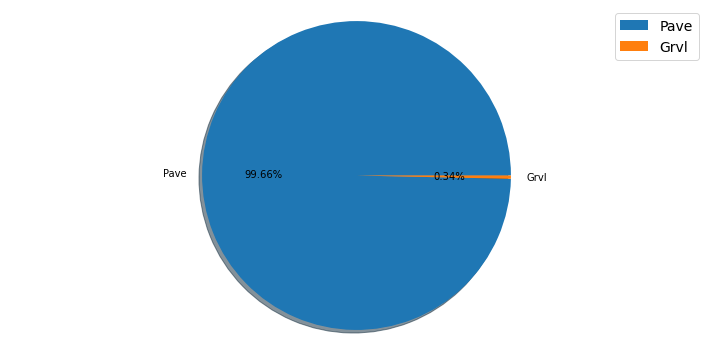

*****************************************************************************************************************************
Pie plot for the column: LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


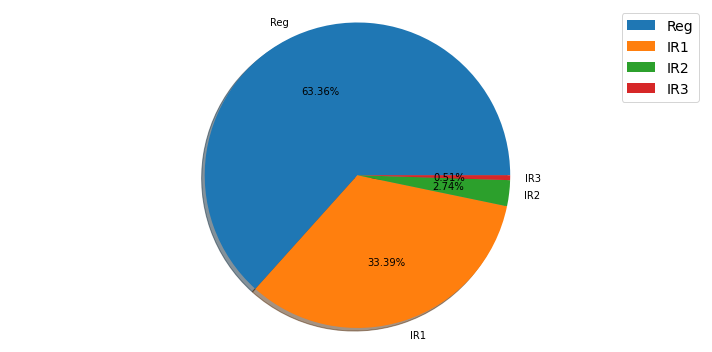

*****************************************************************************************************************************
Pie plot for the column: LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


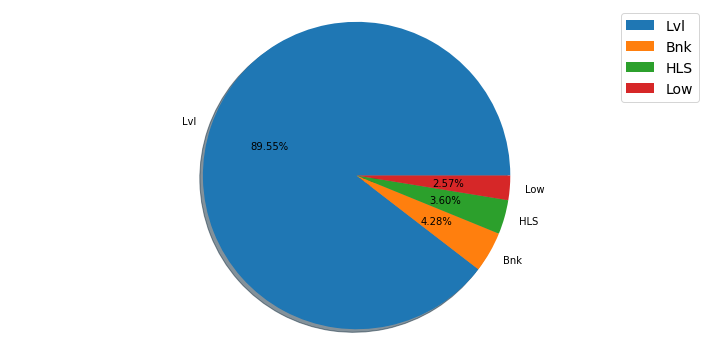

*****************************************************************************************************************************
Pie plot for the column: LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


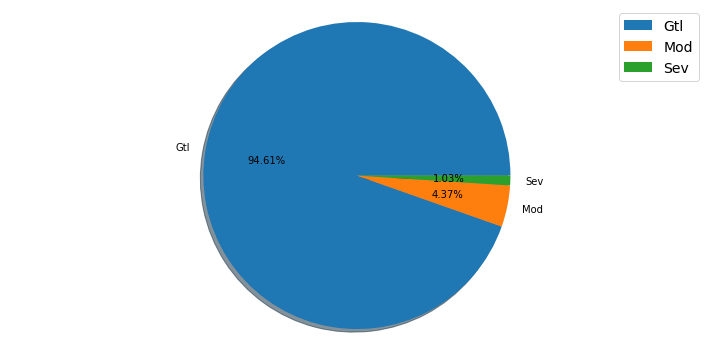

*****************************************************************************************************************************
Pie plot for the column: MasVnrType
None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


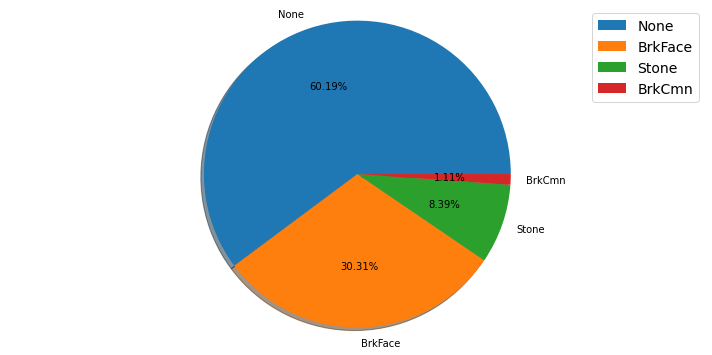

*****************************************************************************************************************************
Pie plot for the column: ExterQual
TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


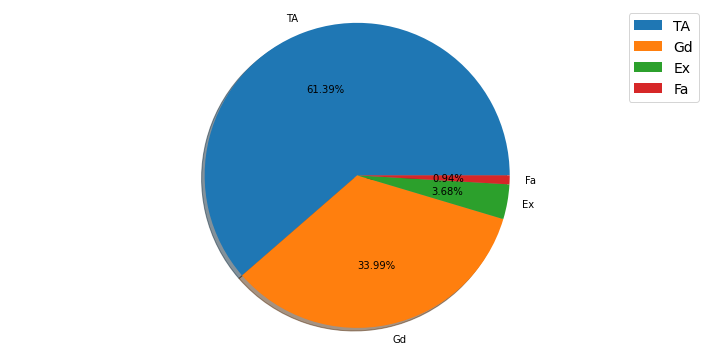

*****************************************************************************************************************************
Pie plot for the column: BsmtQual
TA    547
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


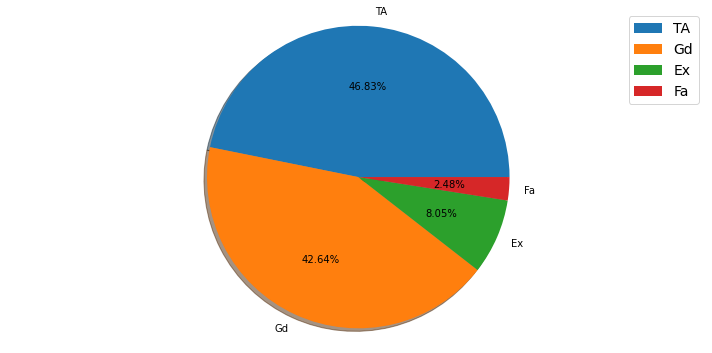

*****************************************************************************************************************************
Pie plot for the column: BsmtCond
TA    1071
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


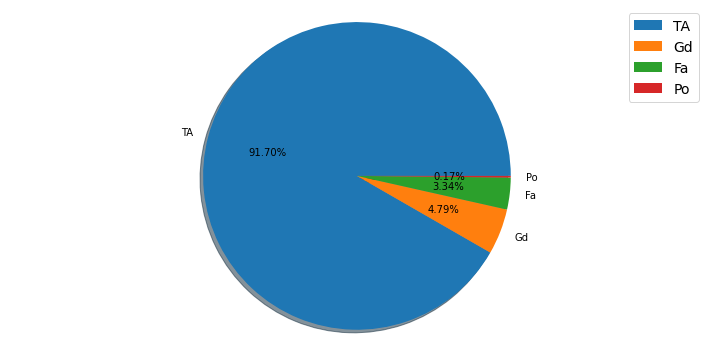

*****************************************************************************************************************************
Pie plot for the column: BsmtExposure
No    787
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


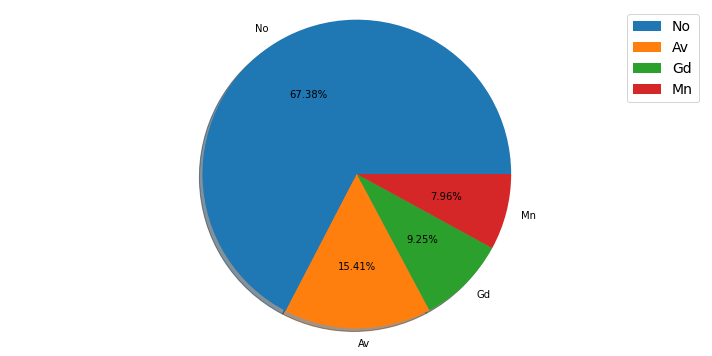

*****************************************************************************************************************************
Pie plot for the column: CentralAir
Y    1090
N      78
Name: CentralAir, dtype: int64


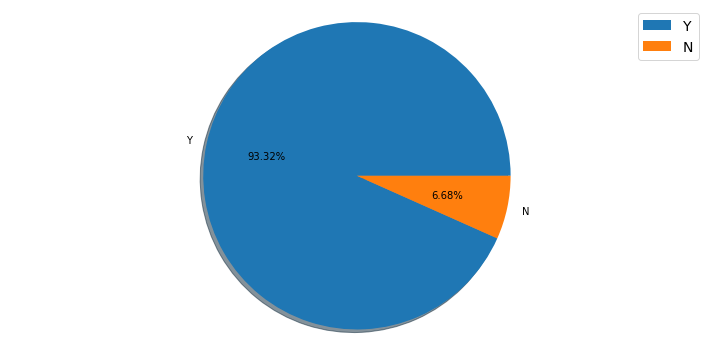

*****************************************************************************************************************************
Pie plot for the column: KitchenQual
TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


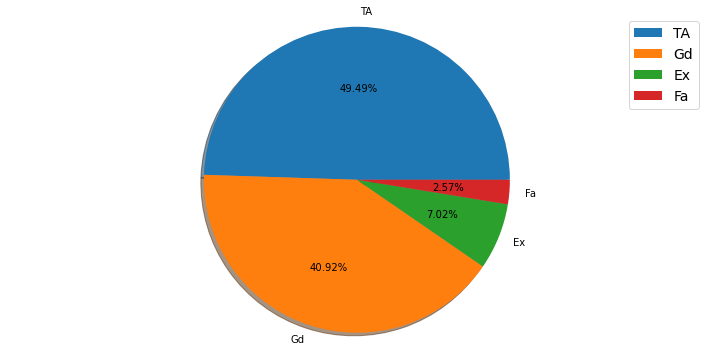

*****************************************************************************************************************************
Pie plot for the column: GarageFinish
Unf    551
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


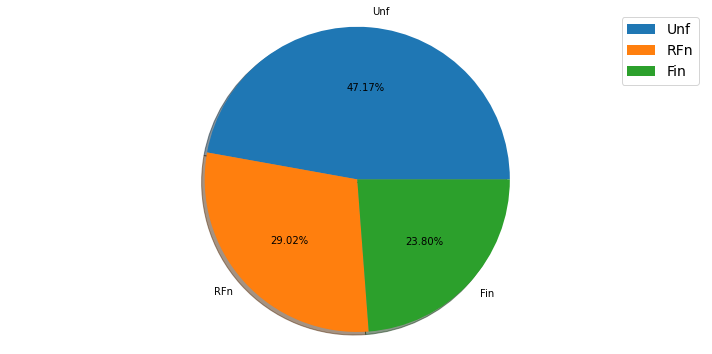

*****************************************************************************************************************************
Pie plot for the column: PavedDrive
Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


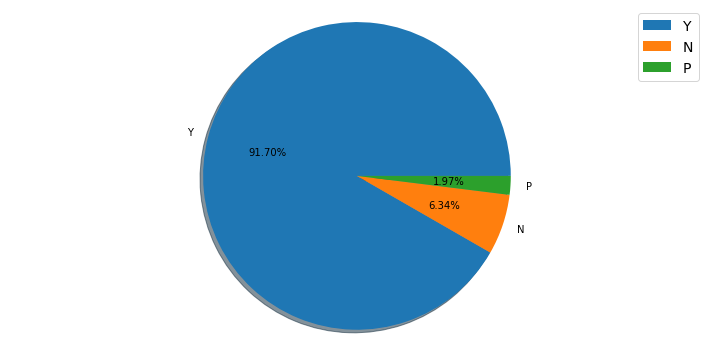

*****************************************************************************************************************************


In [56]:
cols1 = ['Street', 'LotShape','LandContour','LandSlope', 'MasVnrType','ExterQual','BsmtQual','BsmtCond','BsmtExposure','CentralAir','KitchenQual','GarageFinish','PavedDrive']

plotnumber=1
for j in train_df[cols1]:
    print(f"Pie plot for the column:", j)
    print(train_df[j].value_counts())
    generate_pie(train_df[j])
    print("*"*125)

# Observations:

- **`Street:`** The count of road access to the property Paved is 1164 which covers around 99.66% of the property where Graved type has count 4 that is only 0.34%.
-  **`LotShape:`** The count is high for the property having the shape regular followed by slightly regular and the count is less for irregular shape of property.
-  **`LandContour:`** The total number of flatness of the property for level is high which has 89.55% and the others like banked, hillside and depression have very less flatness of area.
-  **`LandSlope:`** The slope of the property Gentle slope has very high count of 1105 i.e, 94.61% and other types Moderate Slope and Severe Slope have very less count.
- **`MasVnrType:`** Around 60% of the houses does not have Masonry veneer type, 30% of the houses contains Brick Face type of Masonry veneer.
- **`ExterQual:`** Around 61% of the houses evaluates typical/average quality of the material on the exterior, 34% of the houses have good quality of the material on the exterior. Only few have excellent quality.
- **`BsmtQual:`** Most of the houses evaluates typical/average and good quality of heoght of the basement, only few of the houses have excellent quality.
-  **`BsmtCond:`** Around 91% of the houses have typical/average condition of the basement and only 2 houses have poor condion.
- **`BsmtExposure:`** Around 67% of the houses does not contain any walkout or garden  level walls and 7% of the houses have minimum exposure.
-  **`CentralAir:`** 93.32% of the houses have central air conditioning and only 6.68% of houses do not have air conditioning.
-  **`KitchenQual:`** 49% of the houses contains typical/average kitchen quality and 40% of the houses have good kutchen quality. The count for excellent kitchen quality is very low and is around 2%.
-  **`GarageFinish:`** 47% Of the houses have unfinished garage interior, 29% rough finished and only 23% of the houses' interior garage has finished.
- **`PavedDrive:`** 91.70% of the houses contains the paved drive way.

In [57]:
def value_count(column):
    counts=len(train_df[column].value_counts())
    if counts<3:
        plt.figure(figsize=(8,5))
    elif counts<5:
        plt.figure(figsize=(8,5))
        plt.xticks(rotation=90)
    elif counts<10:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(10,8))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=train_df,palette="Dark2")
    plt.show()
    print("*"*125)

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


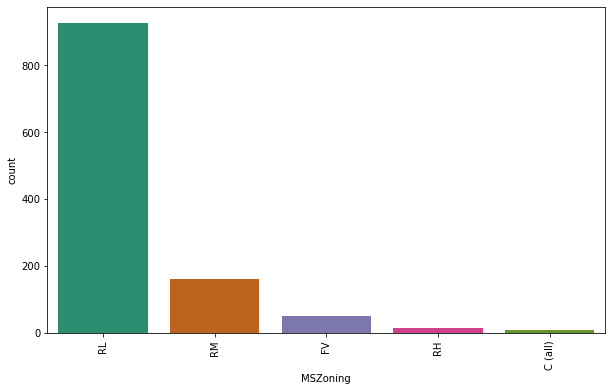

*****************************************************************************************************************************
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


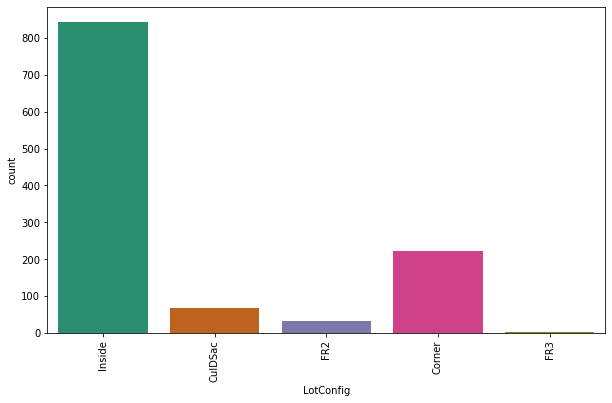

*****************************************************************************************************************************
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


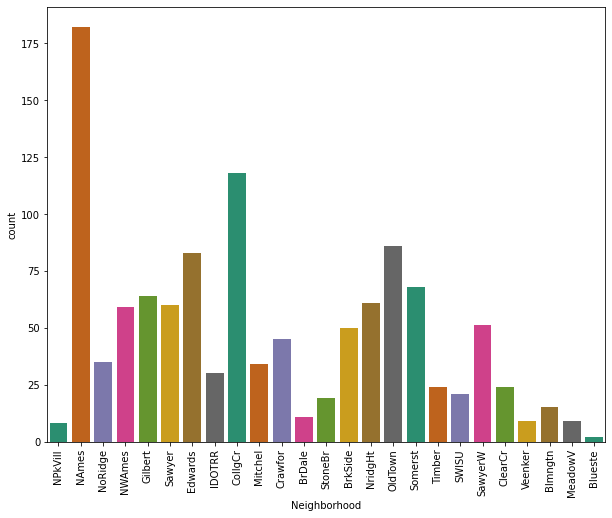

*****************************************************************************************************************************
Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


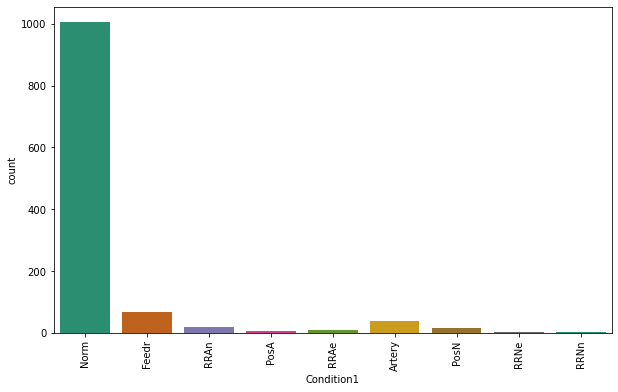

*****************************************************************************************************************************
Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64


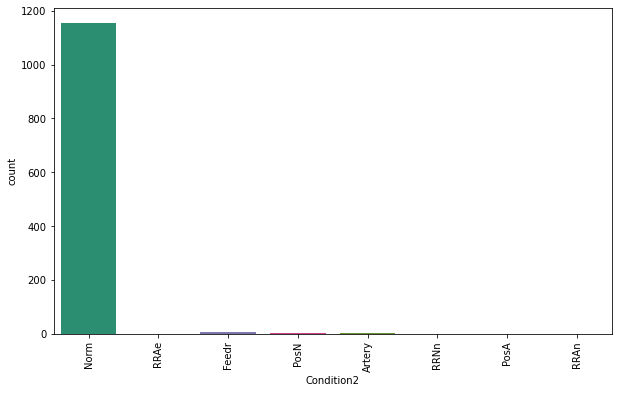

*****************************************************************************************************************************
1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


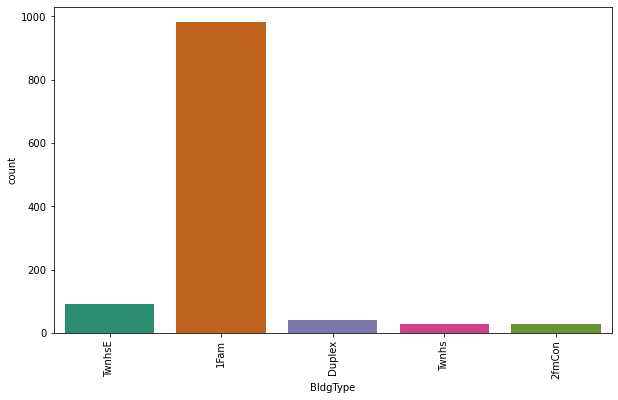

*****************************************************************************************************************************
1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


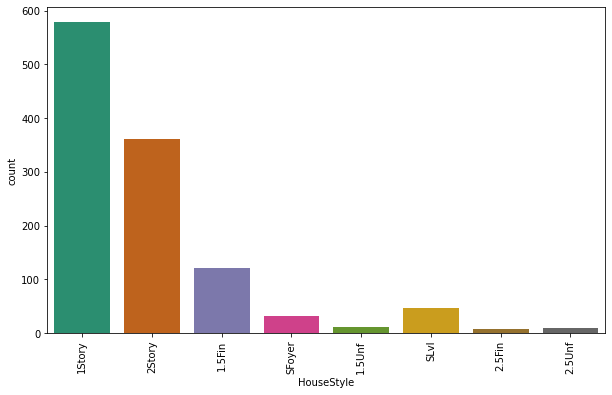

*****************************************************************************************************************************
Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


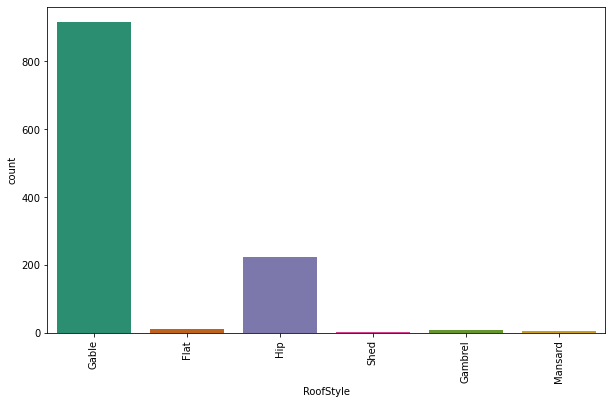

*****************************************************************************************************************************
CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64


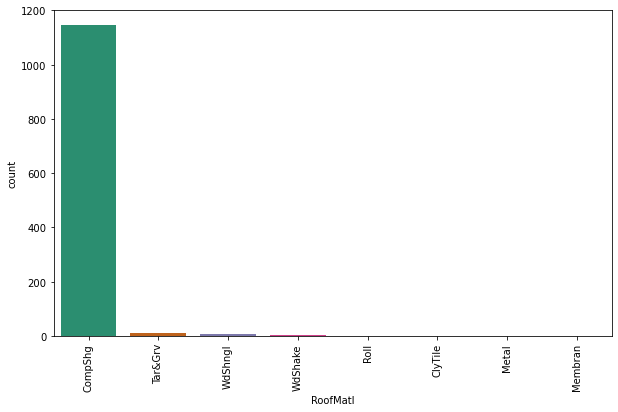

*****************************************************************************************************************************
VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
AsphShn      1
ImStucc      1
BrkComm      1
Name: Exterior1st, dtype: int64


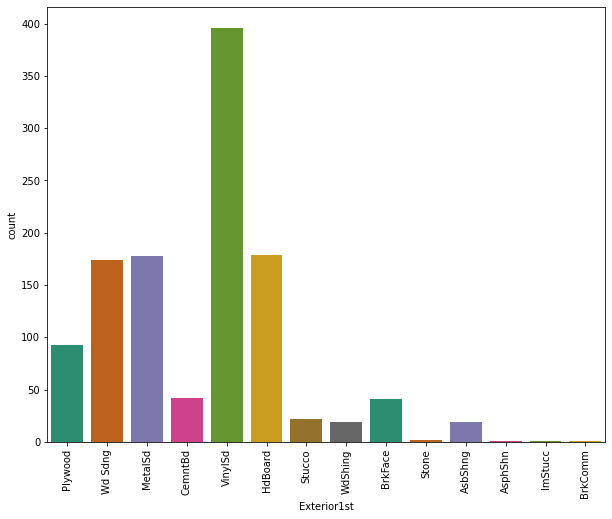

*****************************************************************************************************************************
VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


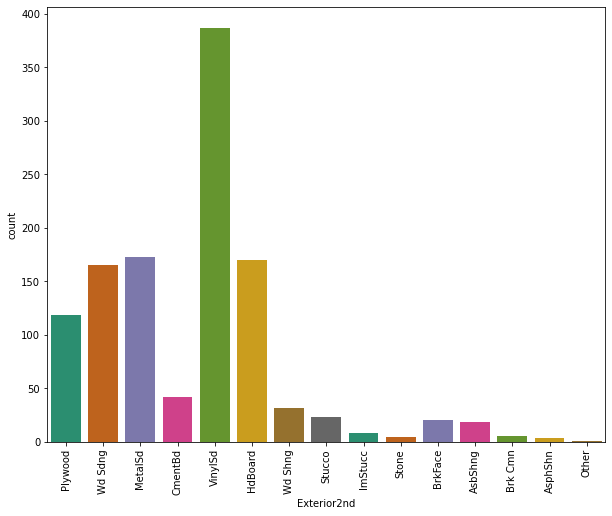

*****************************************************************************************************************************
TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


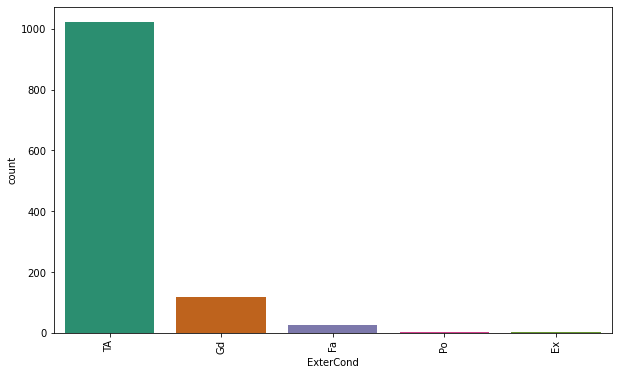

*****************************************************************************************************************************
CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


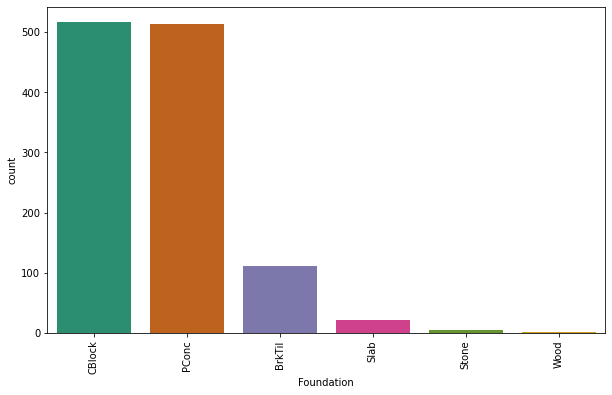

*****************************************************************************************************************************
Unf    375
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


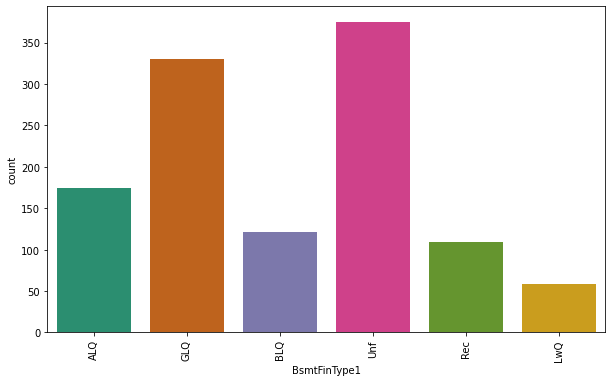

*****************************************************************************************************************************
Unf    1033
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


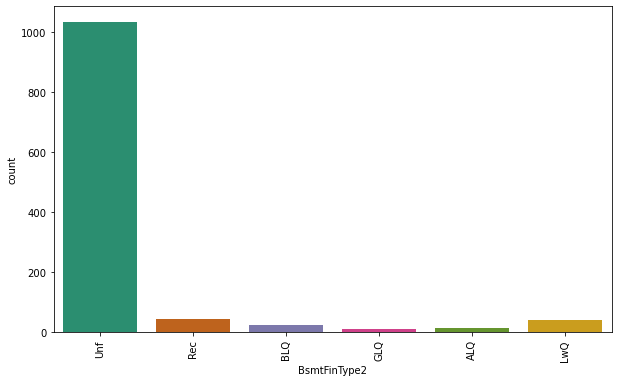

*****************************************************************************************************************************
GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


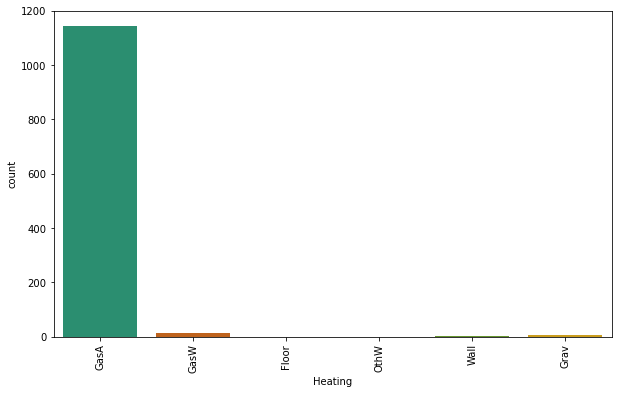

*****************************************************************************************************************************
Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


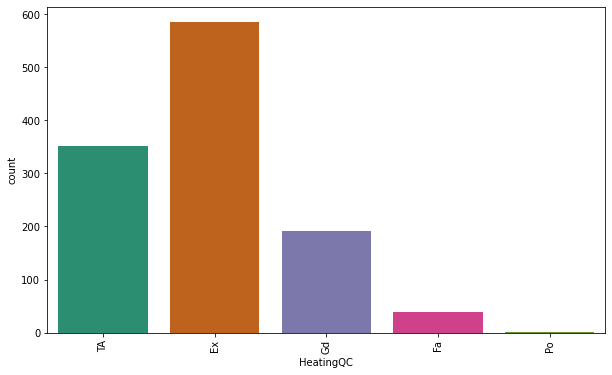

*****************************************************************************************************************************
SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


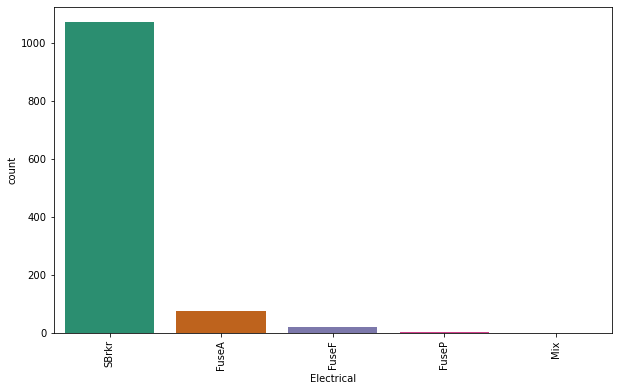

*****************************************************************************************************************************
Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


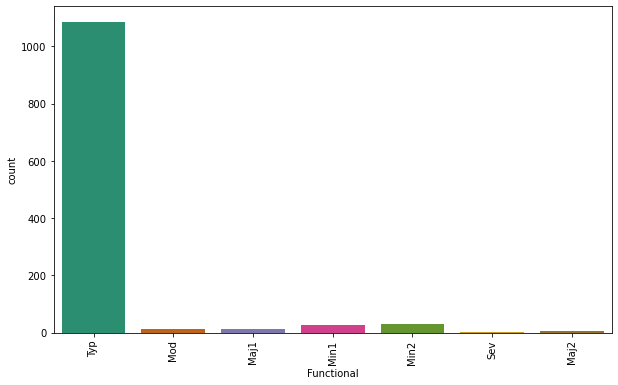

*****************************************************************************************************************************
Gd    852
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64


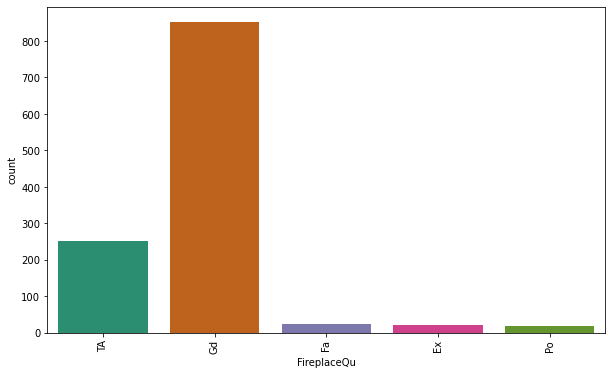

*****************************************************************************************************************************
Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


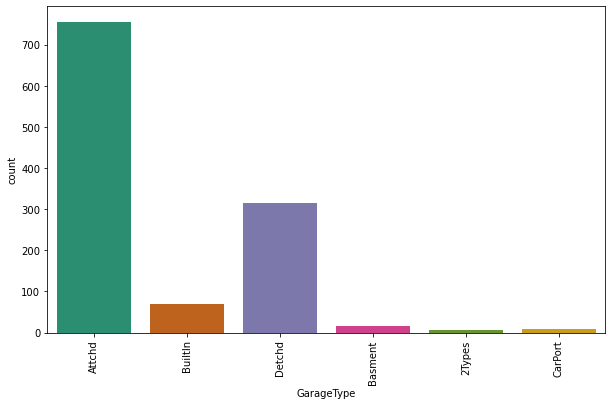

*****************************************************************************************************************************
TA    1114
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64


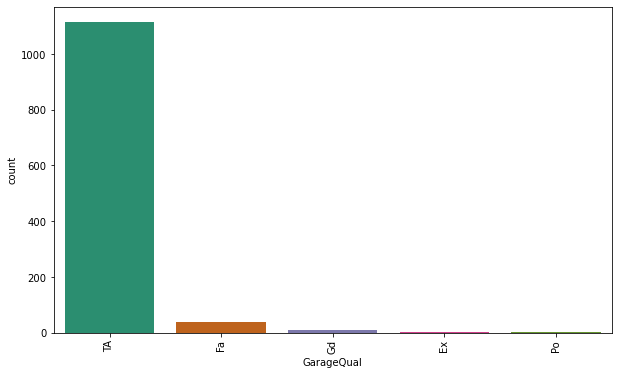

*****************************************************************************************************************************
TA    1125
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


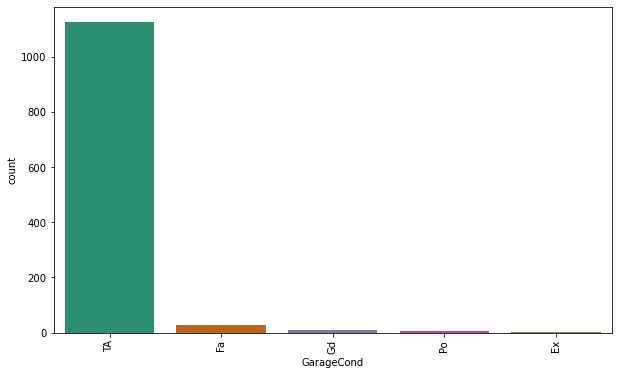

*****************************************************************************************************************************
WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64


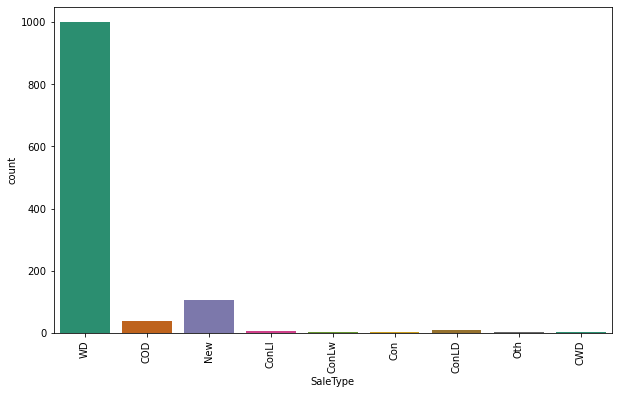

*****************************************************************************************************************************
Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


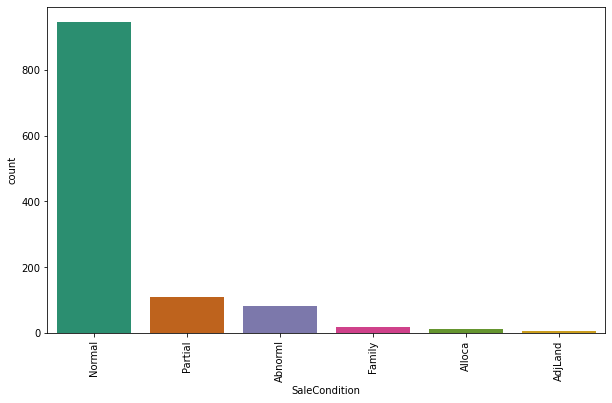

*****************************************************************************************************************************


In [58]:
df1 = train_df[['MSZoning','LotConfig',  'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',  'ExterCond', 'Foundation','BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',  'Electrical',  'Functional', 'FireplaceQu', 'GarageType',  'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition']]
for i in df1:
    print(df1[i].value_counts())
    value_count(i)

## Observations:
- **`MSZoning:`** The houses having Residential Low Density zoning of the sale have high count and commercial zoning sale have very less count compared to others.
- **`LotConfig:`** Inside lot configiration has high count and Frontage on 3 sides of property have very less count compared to others.
- **`Neighborhood:`** The count is high for the North Ames cities floowed by college creek and count is very low for Bluestem.
- **`Condition1:`** The count is high for the Normal proximity condition apart from this all the others have very less count.
- **`Condition2:`** Similar to condition1, in comdition2 also Normal proximity has very high count compared to others.
- **`BldgType:`** Single-family detached dwelling type has very high counts compared to other types have very less count.
- **`HouseStyle:`** 1 story style of dwelling has high count followed by 2 story and others have very less count.
- **`RoofStyle:`** The flat type roof has high count and shed has very less count.
- **`RoofMatl:`** The roof material type Standard (Composite) Shingle has highest count and others have very less counts.
- **`Exterior1st:`** Most of the houses have Vinyl Siding exterior covering materials followed by hard board also Brick Common, Asphalt Shingles and Imitation Stucco have very count which means there are no more houses with these types.
- **`Exterior2nd:`** Similar to Exterior1st, here also most of the houses have Vinyl Siding exterior covering materials.
- **`ExterCond:`** The present condition of the material on the exterior for most of the houses are Average/Typical. 
- **`Foundation:`** Most of the houses have Cinder Block and Poured Contrete type of foundation.
- **`BsmtFinType1:`** The count is high for the houses having unfinished basement area. Also some houses have Good Living Quarters.
- **`BsmtFinType2:`** Similar to BsmtFinType1, here also the count is high for unfinished basements.
- **`Heating:`** Most of the houses have Gas forced warm air furnace heating type.
- **`HeatingQC:`** Most of the houses have excellent heating quality and condition also some houses have typical/average HeatingQC and only 1%  of the houses have poor heating quality and condition.
- **`Electrical:`** The electrical system of the type Standard Circuit Breakers & Romex has very high count which means most of the houses have this facility. 
- **`Functional:** The total number of home functionality of the property for typical functionality have high count compared to others.
- **`FireplaceQu:`** The houses with Masonry Fireplace in main level have good quality compared ot others.
- **`GarageType:`** The garage location attachec to home has high count also the garage locations detached to home have moderate level of counts. Only few houses have car port and more than one type of garage.
- **`GarageQual:`** Houses with typical/average garage quality have high count compared to others.
- **`GarageCond:** Houses with typical/average garage condition have high count compared to others.
- **`SaleType:`** Warranty Deed type of sale has high count followed by Home just constructed and sold(new).
- **`SaleCondition:`** Mormal sale has high count also the home which was not completed when last assessed also has average sale condition.

# Skewness

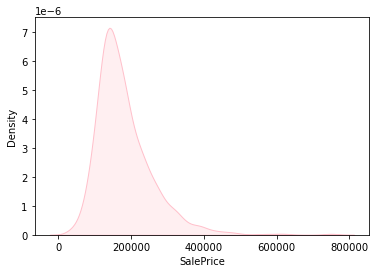

In [61]:
# Let's visualize the target variable SalePrice
plt.figure(figsize=(6,4))
sns.distplot(train_df["SalePrice"],color="pink",kde_kws={"shade": True},hist=False)
plt.show()

## The data in the target variable SalePrice is almost normally distributed. The maximum SalePrice of the house is around 200000.

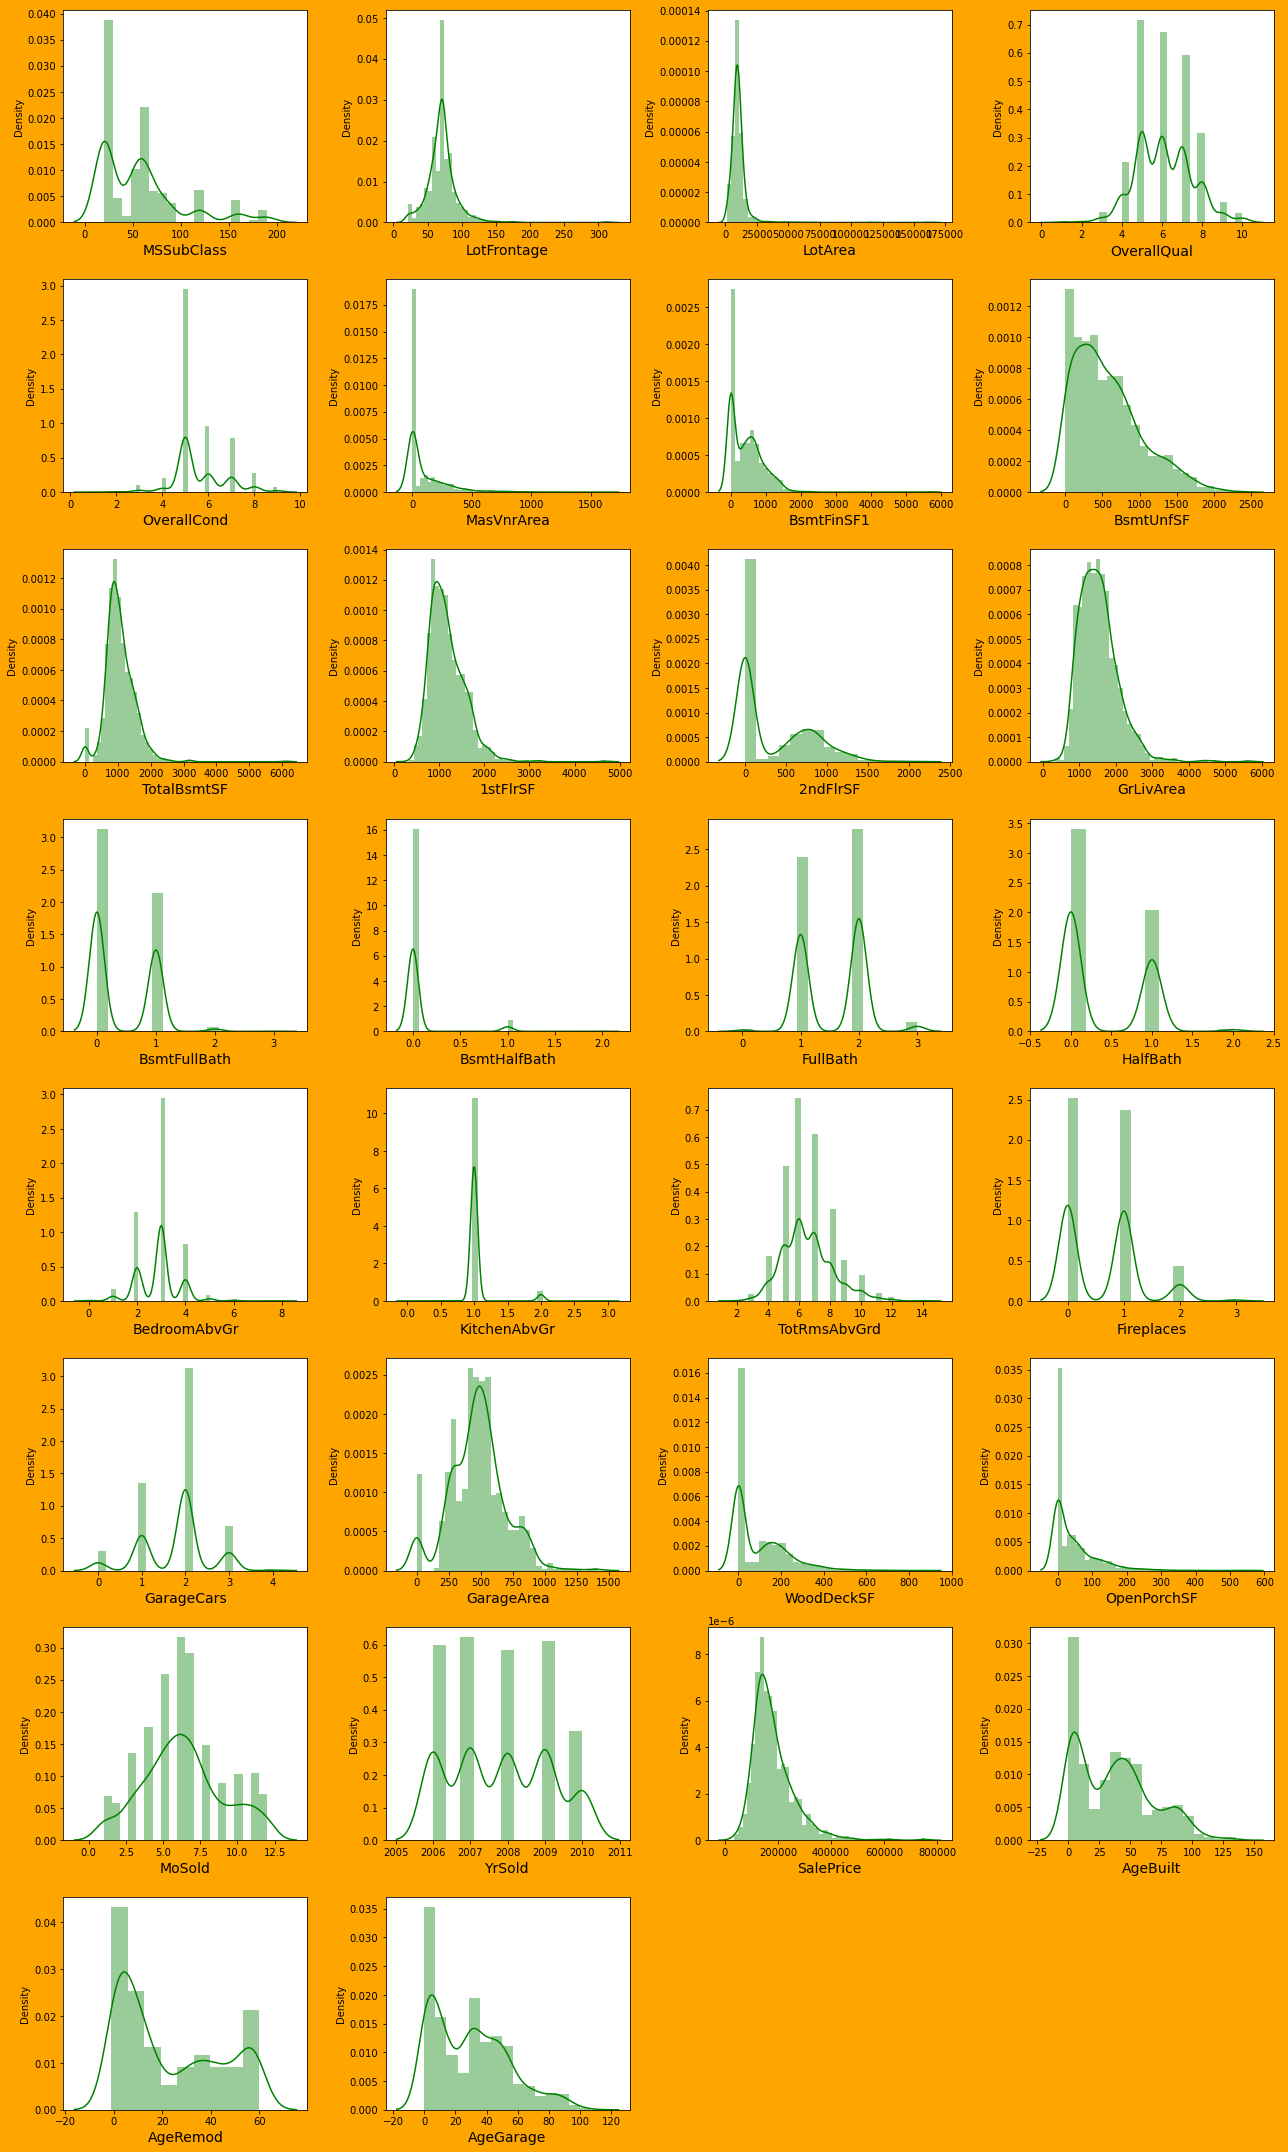

In [60]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(18,30),facecolor='orange')
plotnumber=1
for column in numerical_coltr:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(train_df[column],color="g")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

*1. ` From the above distribution plot we can observe most of the columns are not normally distributed only of the columns are almost distributed normally.`*
*2.` Almost all the columns have skewness and are skewed to right since the mean is greater than the median in these columns. We need to remove this skewness before building our machine learning models.`*

<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:green'>  Bivariate Analysis  <h2>

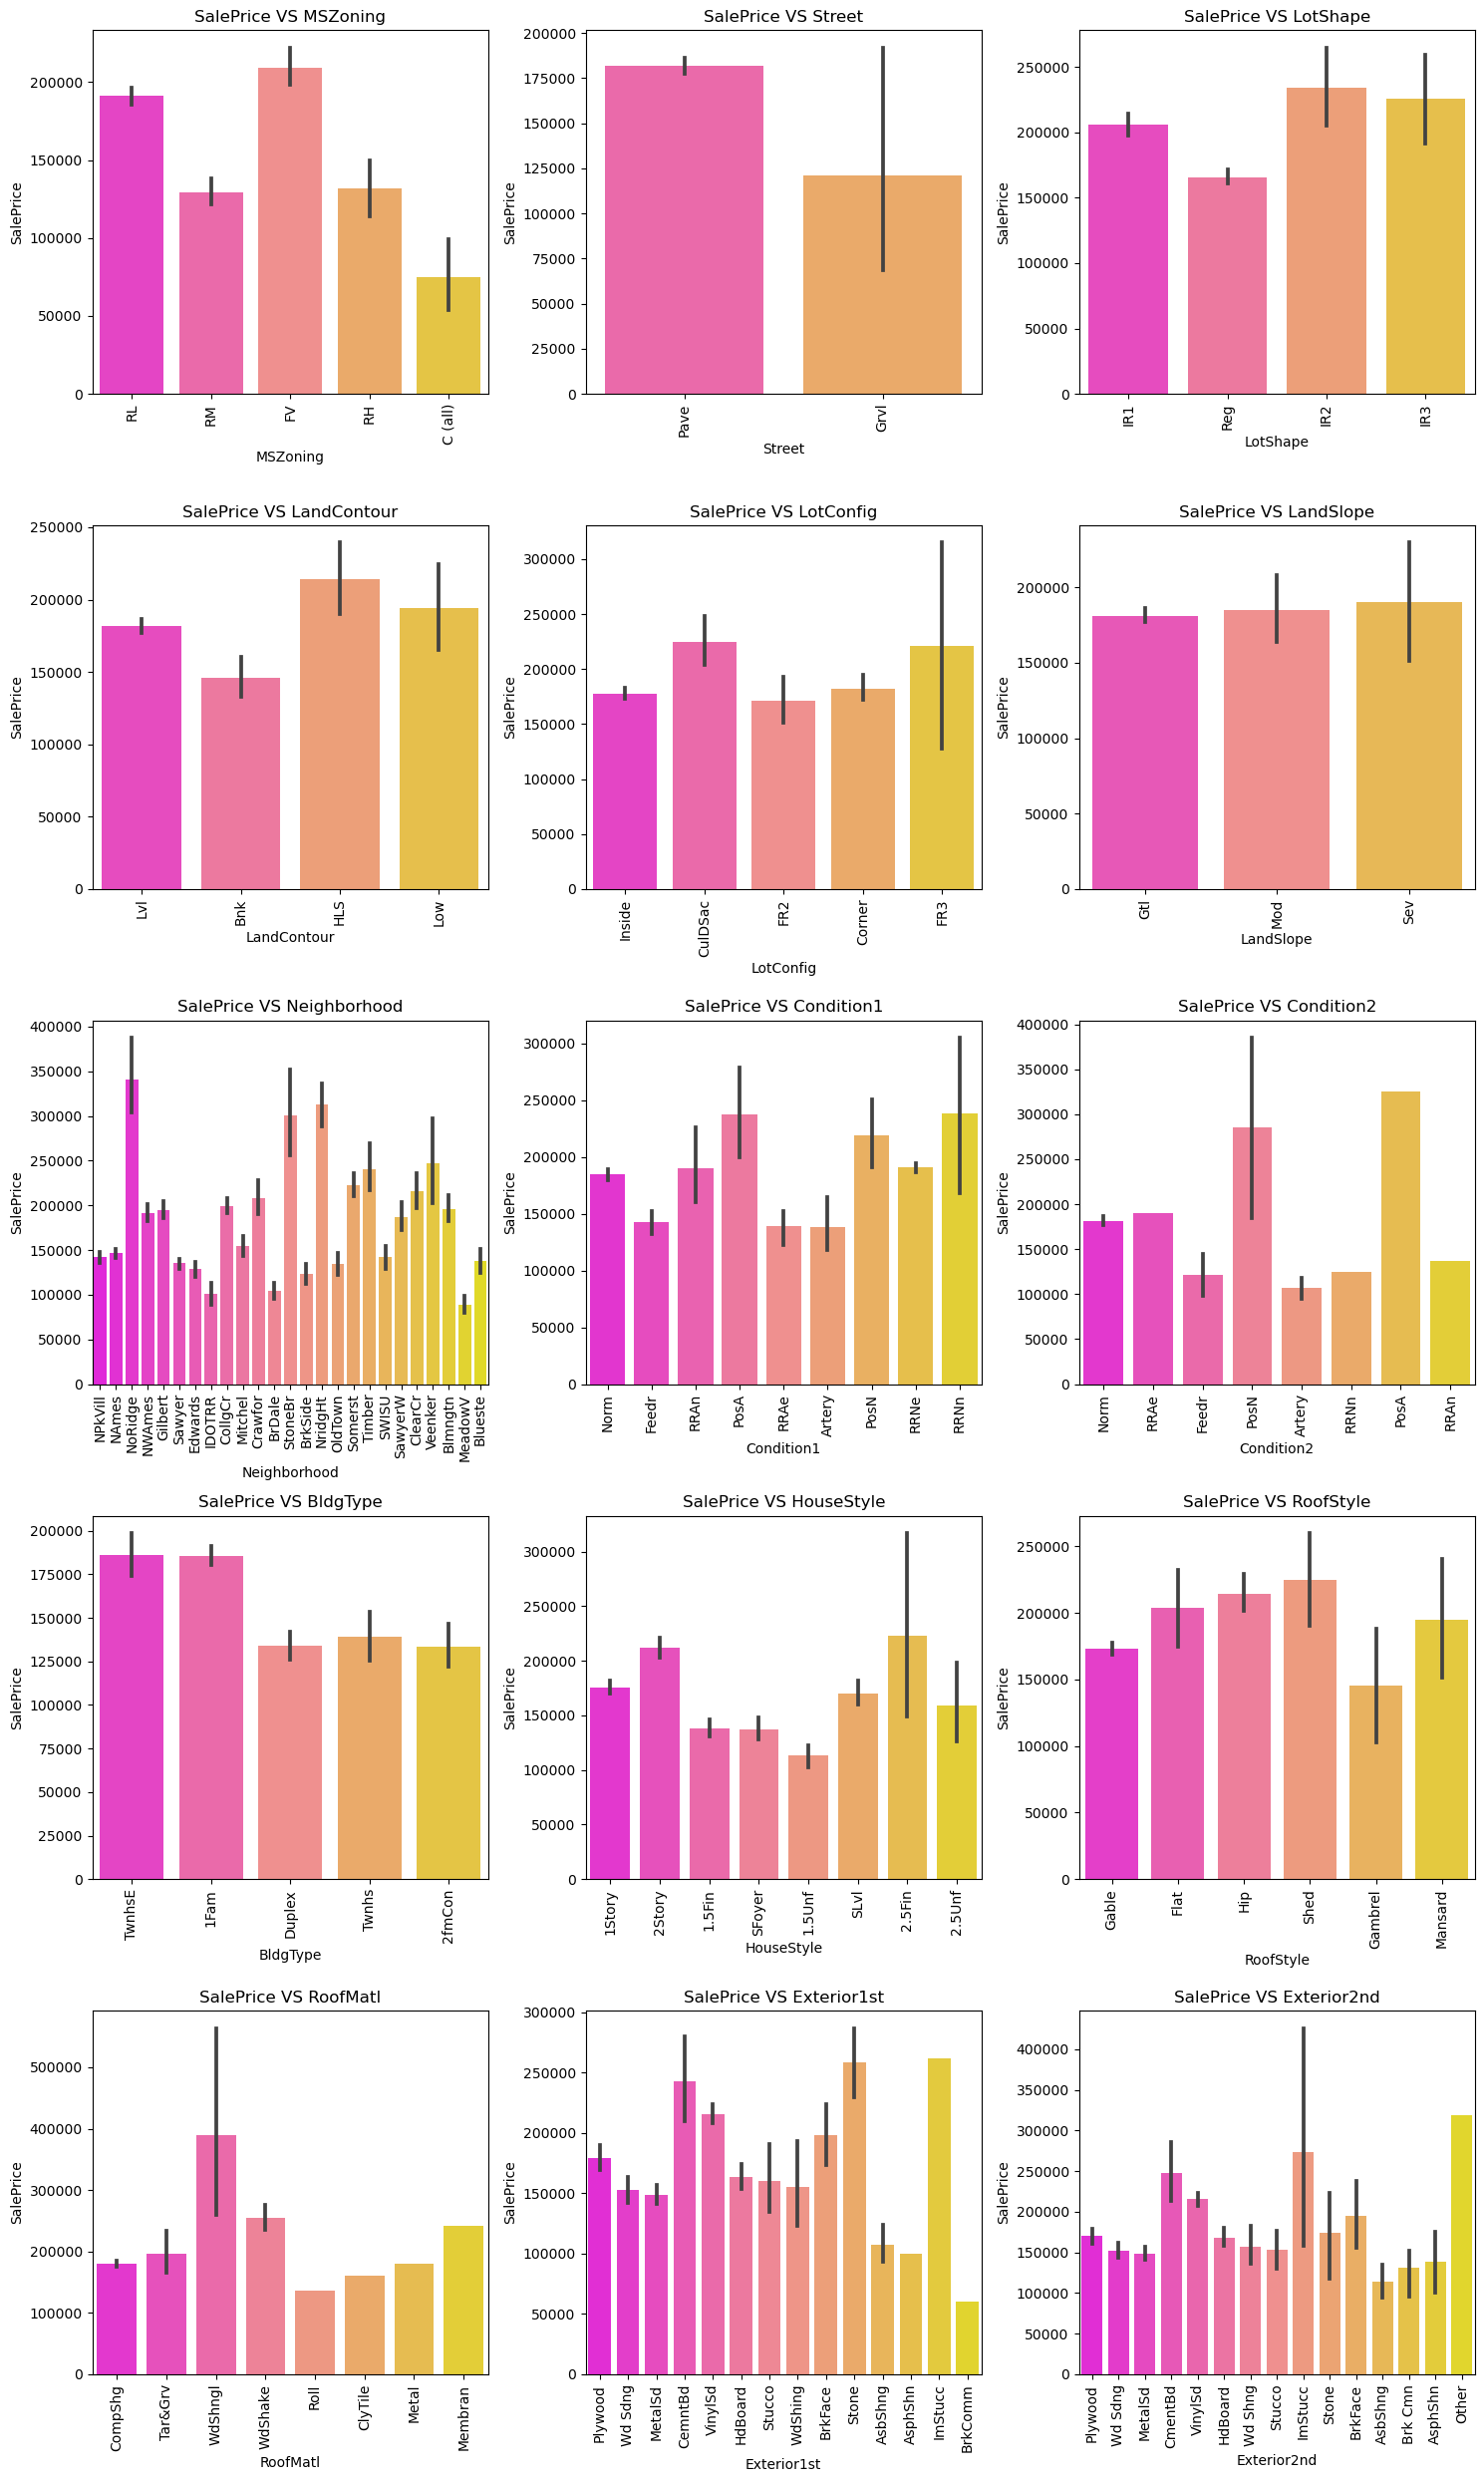

In [64]:
# Cheching relation between nominal categorical variables and target variable
nominal_data1 = ['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd']
plt.style.use('default')
plt.figure(figsize=(15,25))
for i in range(len(nominal_data1)):
    plt.subplot(5,3,i+1)
    sns.barplot(y=train_df['SalePrice'],x=train_df[nominal_data1[i]],palette="spring")
    plt.title(f"SalePrice VS {nominal_data1[i]}",fontsize=12)
    plt.xticks(rotation = 90)  
    plt.tight_layout()

### Observations:
- **SalePrice vs MSZoning:** `Most of the houses are belongs to Floating Village Residential followed by Residential Low Density. The houses from this zone are have high saleprice compared to other zones.`
- **SlaePrice vs Street:** `By observing the bar plot, it is obvious that the property of house with Paved type of road have high SalePrice and the the houses in gravel roads have very less sale price.` 
- **SlaePrice vs LotShape:** `Most of the houses having moderately irregular and irregular shape of property have high sale price and houses with regullar type of property have less sale peice compared to others.`
- **SalePrice vs LandContour:** `The houses having the hillside and depression property flatness have high sale price compared to others.`
- **SalePrice vs LotConfig:** `Most of the houses with Frontage on 3 sides of property have high sale price compared to others.`
- **SalePrice vs LandSlope:** `There is no significance difference between the slope of the property. As we can observe the houses having Gentle slope, Moderate Slope and Severe Slope have same sale price.`
- **SalePrice vs Neighborhood:** `The houses which are located near Northridge have high sale price compared to others.`
- **SalePrice vs Condition1:** `The houses having the conditions adjacent to postive off-site feature and houses within 200' of North-South Railroad have high sale price compared to others.`
- **SalePrice vs Condition2:** `The houses having the conditions near positive off-site feature park, greenbelt, etc and adjacent to postive off-site feature have high sale price.`
- **SalePrice vs BldgType:** `Most of the houses are Single-family Detached and Townhouse End Unit and they have higher sale price compared to other categories.`
- **SalePrice vs HouseStyle:** `Houses which are having style of dwelling 2nd level finished and Two story have high sale price compared to other types.`
- **SalePrice vs RoofStyle:** `The houses having the roof style Flat, Hip and Shed have high sale price and the houses having gabrel roof style have less sale price.`
- **SalePrice vs RoofMatl:** `Houses with Wood Shingles root materials have high sale prices.`
- **SalePrice vs Exterior1st:** `Houses having Imitation Stucco, Stone and Cement Board as 1st exterior cover have high sale price.`
- **SalePrice vs Exterior2nd:** `Houses having Imitation Stucco and other as 2nd cover have high sale price.`

### Ordinal and sales variable

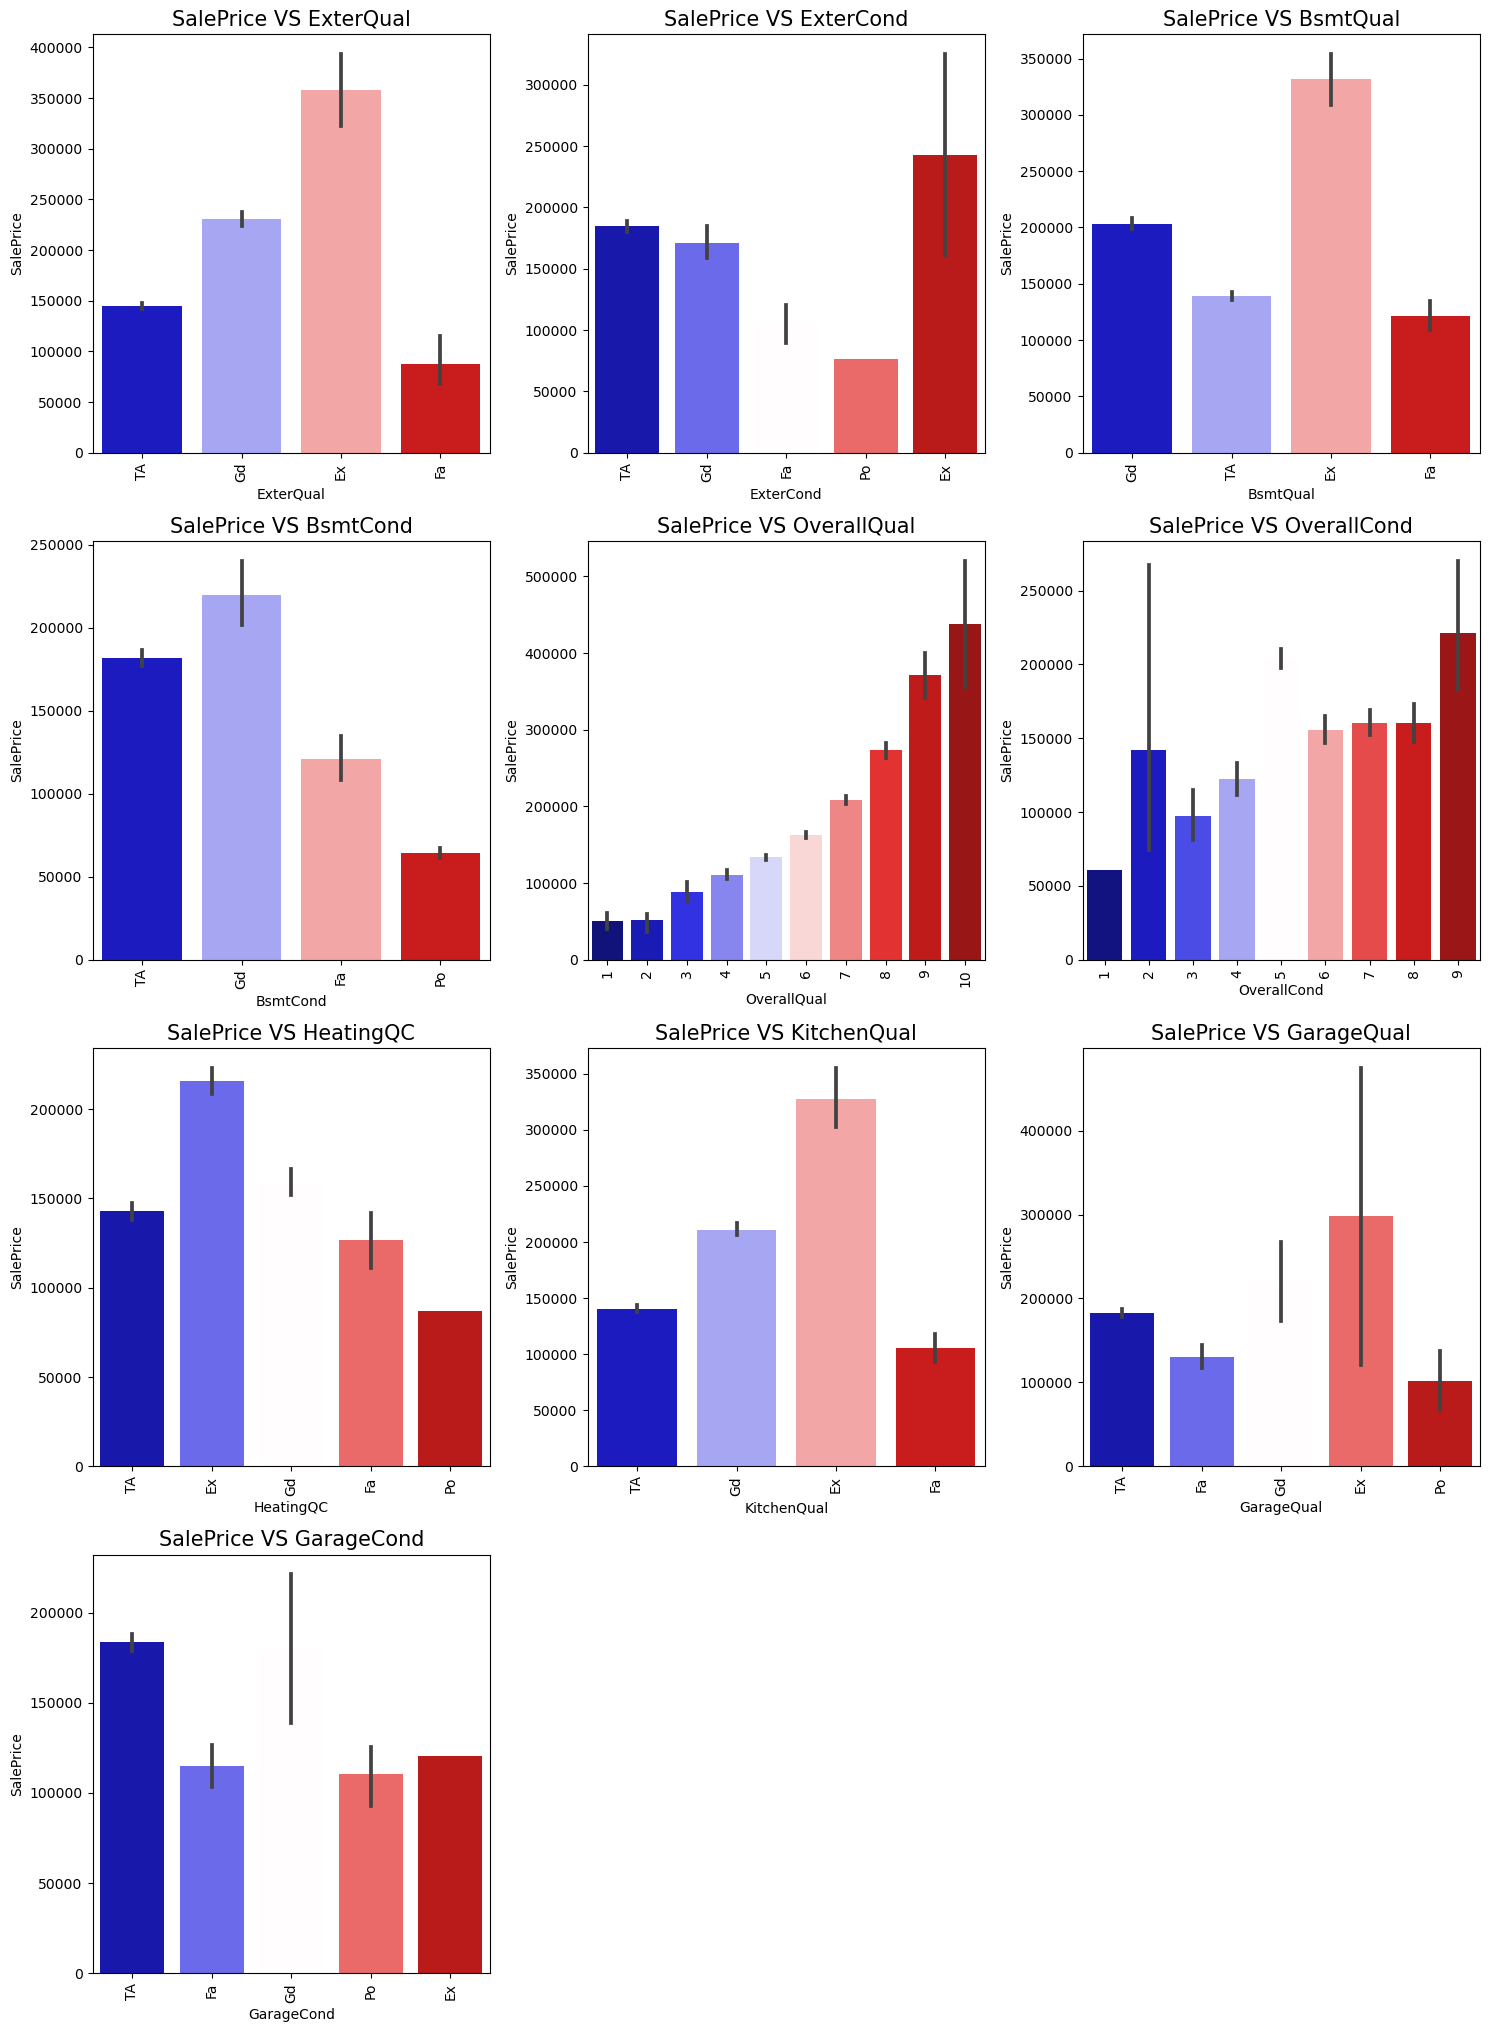

In [67]:
# Cheching relation between ordinal categorical variables and target variable
ordinal_data = ['ExterQual','ExterCond','BsmtQual','BsmtCond','OverallQual','OverallCond','HeatingQC','KitchenQual','GarageQual','GarageCond']
plt.style.use('default')
plt.figure(figsize=(15,25))
for i in range(len(ordinal_data)):
    plt.subplot(5,3,i+1)
    sns.barplot(y=train_df['SalePrice'],x=train_df[ordinal_data[i]],palette="seismic")
    plt.title(f"SalePrice VS {ordinal_data[i]}",fontsize=15)
    plt.xticks(rotation = 90)  
    plt.tight_layout()

### Observations:
- **SalePrice vs ExterQual:** `Houses having excellent quality of the material on the exterior have high sale price and houses having fair quality have very less sale price.
- **SalePrice vs ExterCond:** `Houses having excellent condition of the material on the exterior have high sale price and the houses having poor condition of the material on the exterior have very less sale price compared to others.`
- **SalePrice vs BsmtQual:** `The houses which evaluates the excellent quality of height of the basement have high sale price compared to others.`
- **SalePrice vs BsmtCond:** `The houses which evaluates the good quality of general condition of the basement have high sale price compared to others.`
- **SalePrice vs OverallQual:** `The houses which have very excellent overall quality like material and finish of the house have high sale price. Also we can observe from the plot as the overall quality of the house increases, the sale price also increases. That is there is good linear relation between SalePrice and OverallQual.`
- **SalePrice vs OverallCond:** `The houses having overall condition as excellent and average have very high sale price compared to others.`
- **SalePrice vs HeatingQC:** `Most of the houses having excellent heating quality and condition have high sale price.`
- **SalePrice vs KitchenQual:** `Houses having excellent quality of the kitchen have high sale price compared to others.`
- **SalePrice vs GarageQual:** `The sale price of the house is high for the houses having excellent garage quality.`
- **SalePrice vs GarageCond:** `Houses having typical/average garage condition have high sale price and the houses having good garage condition also have high sales price compared to others.`

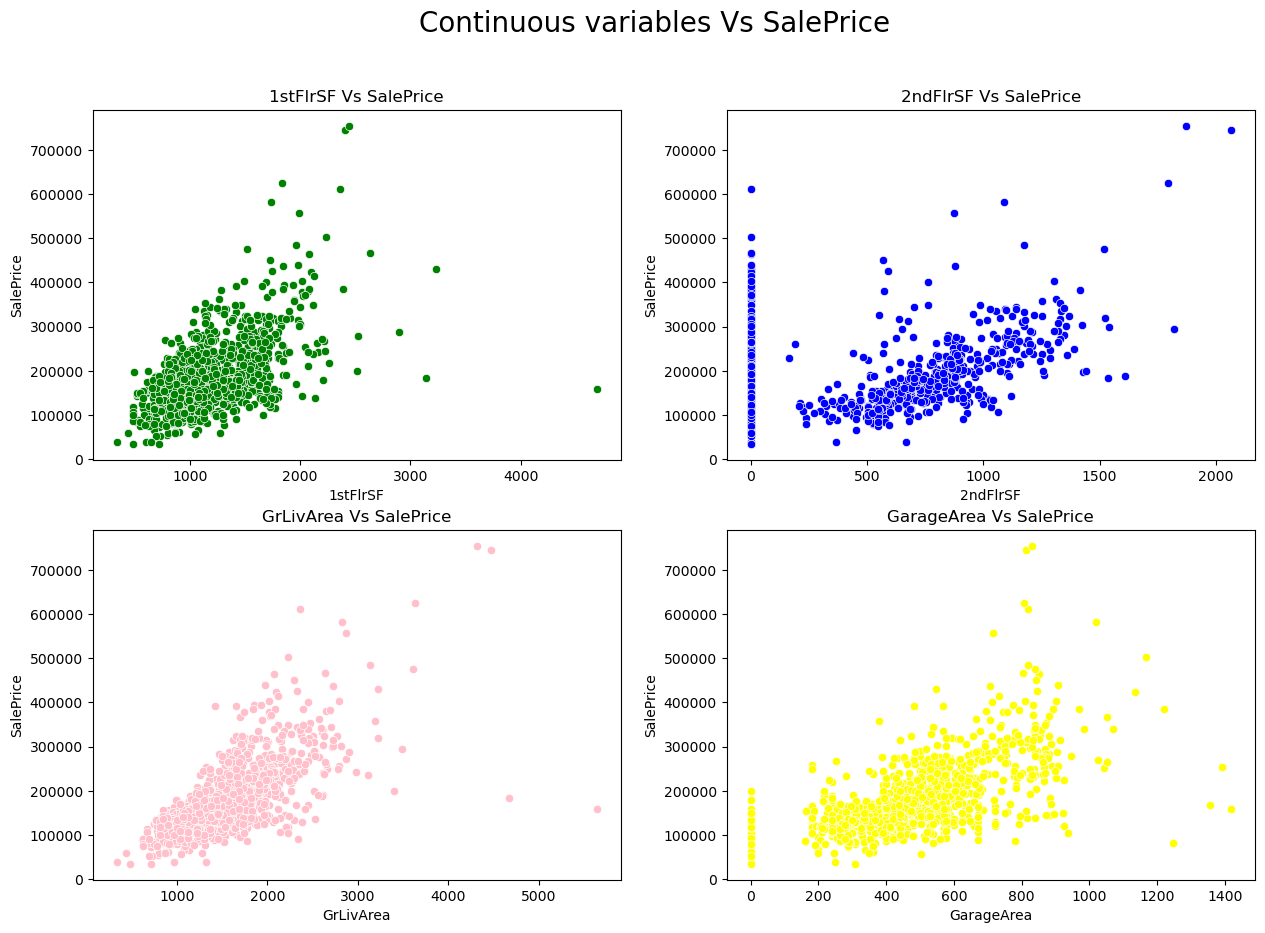

In [68]:
plt.figure(figsize=(15,10))
plt.suptitle('Continuous variables Vs SalePrice',fontsize=20)

plt.subplot(2,2,1)
plt.title('1stFlrSF Vs SalePrice')
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=train_df,color='g')

plt.subplot(2,2,2)
plt.title('2ndFlrSF Vs SalePrice')
sns.scatterplot(x='2ndFlrSF',y='SalePrice',data=train_df,color='b')

plt.subplot(2,2,3)
plt.title('GrLivArea Vs SalePrice')
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_df,color='pink')

plt.subplot(2,2,4)
plt.title('GarageArea Vs SalePrice')
sns.scatterplot(x='GarageArea',y='SalePrice',data=train_df,color="yellow")
plt.show()

### Observations:
- **SalePrice vs 1stFlrSF:** `There is a linear relation between the label and feature. As we can observe in the plot, the sale price is high when the first floor area lies between 500-2000 square feet. So as the 1st floor area increases, sales price also increases moderately.`
- **SalePrice vs 2ndFlrSF:** `There is a positive correlation between SalePrice and 2ndFlrSF. So it is obvious that the sale price increases based on the floors.`
- **SalePrice vs GrLivArea:** `Most of the houses have above grade living area. There is a positive correlation between the label and feature. Here as the above grade living area increases, sale price also increases.`
- **SalePrice vs GarageArea:** `Similar to 2nd floor sf, here also positive linear relation between the label and feature. As size of garage area increases, sale price also increases. The sale price is high when size of garage area is beween 200-800 square feet.`

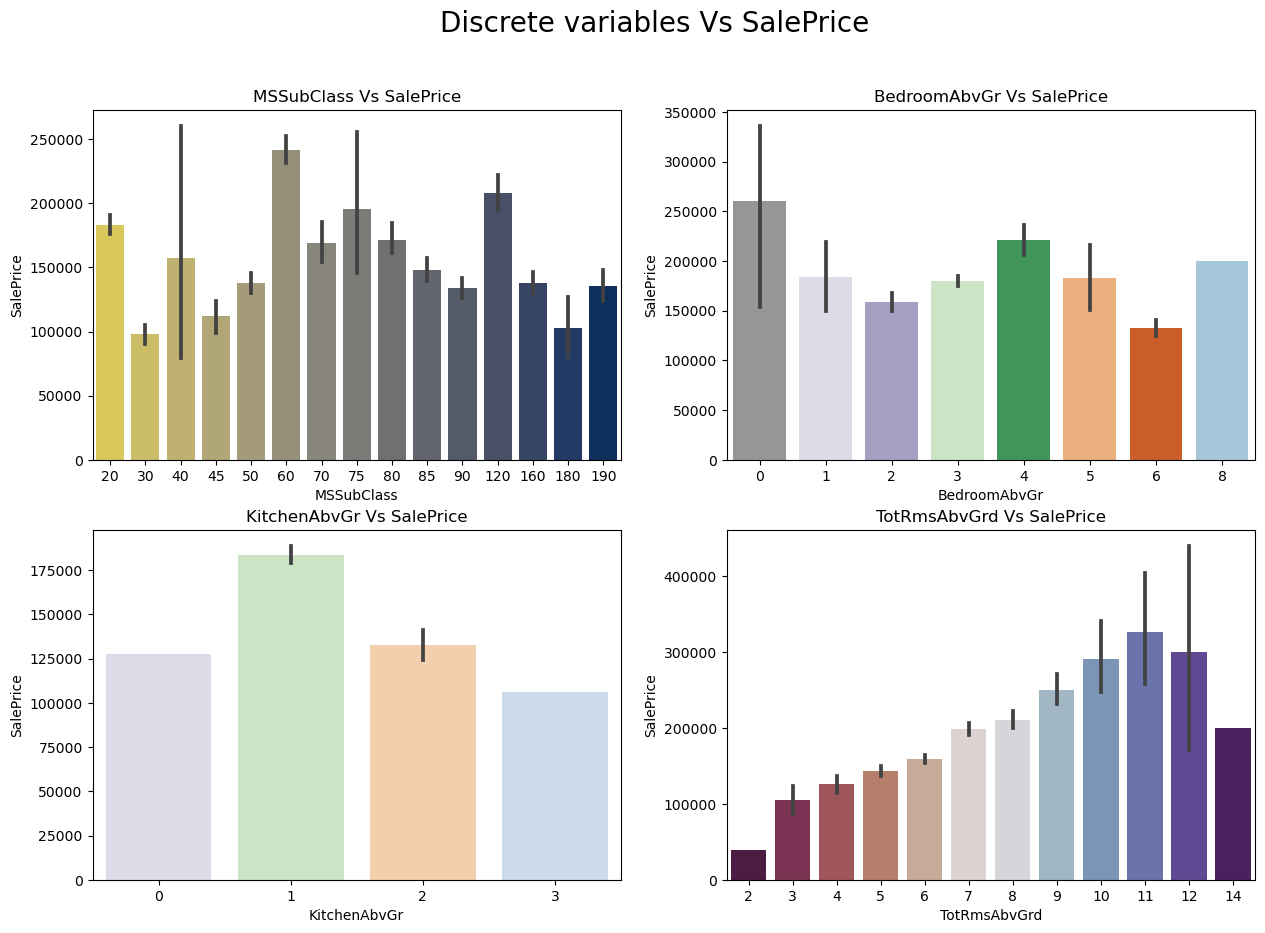

In [71]:
plt.style.use('default')
plt.figure(figsize=(15,10))
plt.suptitle('Discrete variables Vs SalePrice',fontsize=20)

plt.subplot(2,2,1)
plt.title('MSSubClass Vs SalePrice')
sns.barplot(x='MSSubClass',y='SalePrice',data=train_df,palette="cividis_r")

plt.subplot(2,2,2)
plt.title('BedroomAbvGr Vs SalePrice')
sns.barplot(x='BedroomAbvGr',y='SalePrice',data=train_df,palette='tab20c_r')

plt.subplot(2,2,3)
plt.title('KitchenAbvGr Vs SalePrice')
sns.barplot(x='KitchenAbvGr',y='SalePrice',data=train_df,palette="tab20c_r")

plt.subplot(2,2,4)
plt.title('TotRmsAbvGrd Vs SalePrice')
sns.barplot(x='TotRmsAbvGrd',y='SalePrice',data=train_df,palette='twilight_shifted_r')
plt.show()

### Observations:
- **SalePrice vs MSSubClass:** `The sale price is high for the MSSubClass 60,120 and 20.`
- **SalePrice vs BedroomAbvGr:** `Many houses are having 0 and 4 bedrooms have high sales price also houses having 8 bedrooms also have  high sales price. Other bedroom grades have average sale price.`
- **SalePrice vs KitchenAbvGr:** `Most of the houses have single kitchen and few houses have 2 kitchens. The sale price is also high in case of the houses having single kitchen.`
- **SalePrice vs TotRmsAbvGrd:** `We can observe some linear relation between Total rooms above grade and Sale Prices as the number of rooms increases the sales price also increases.` 

<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:green'>  Checking Outliers from the dataset  <h2>

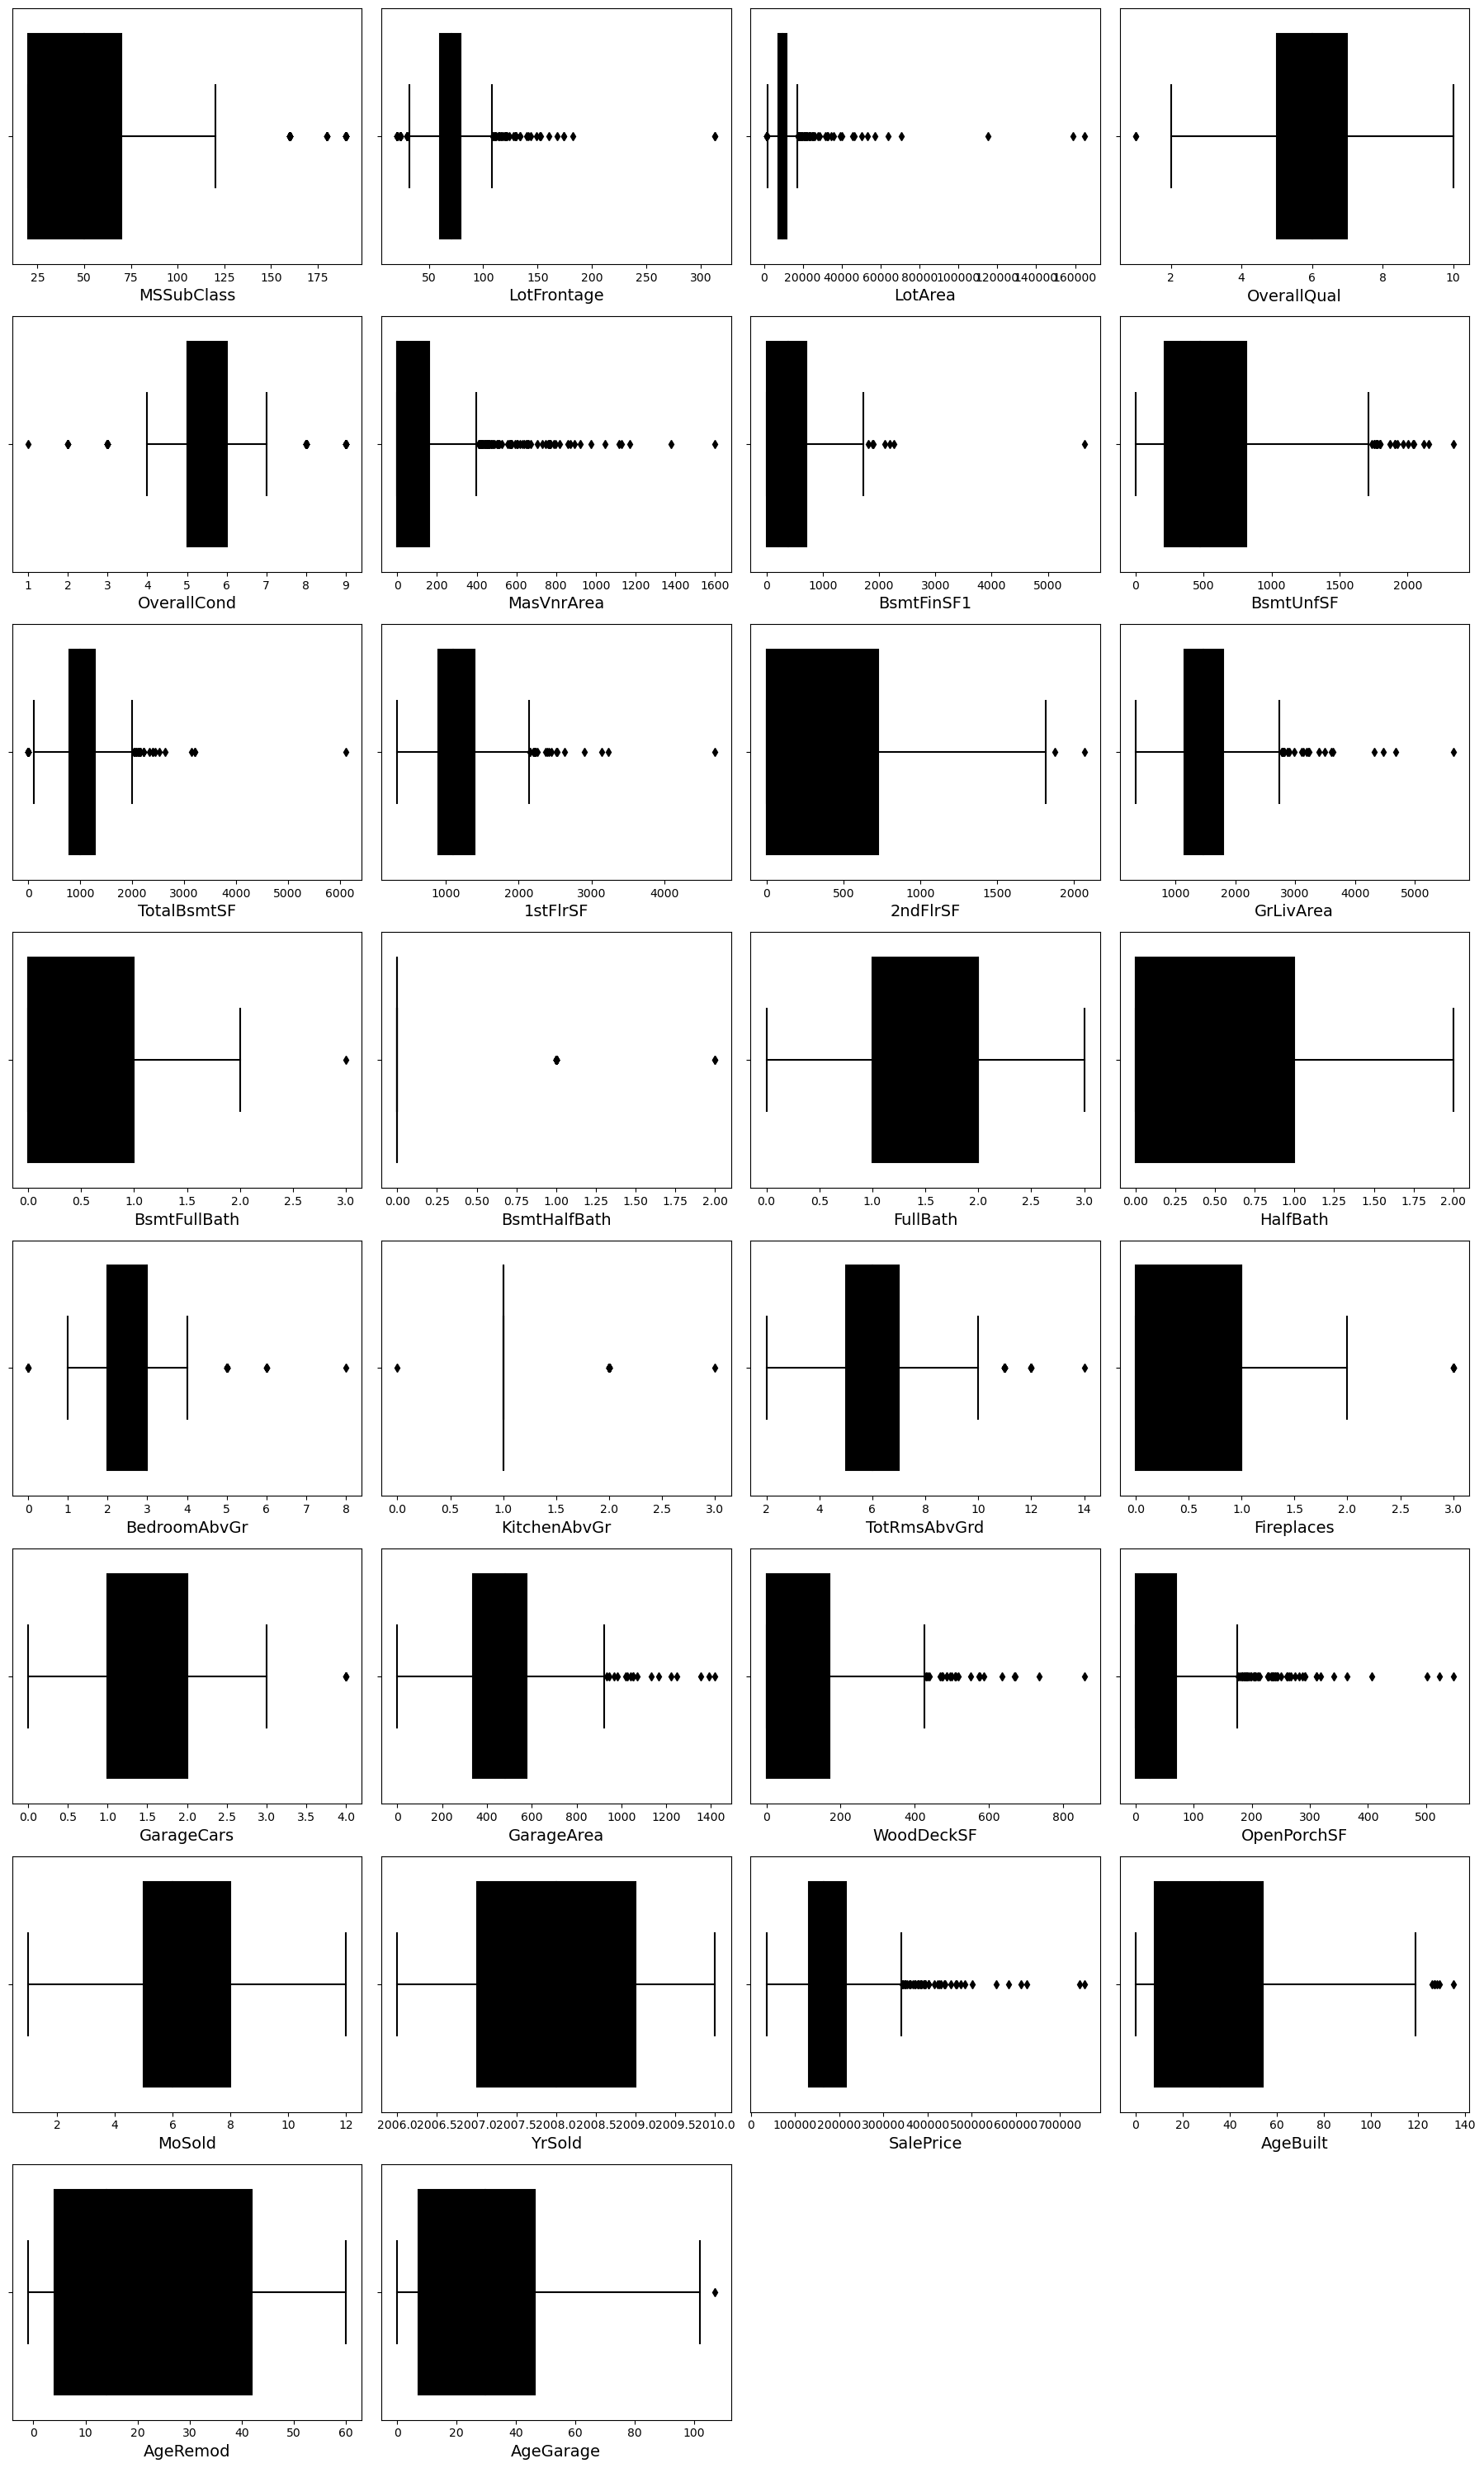

In [78]:
# Identifying the outliers using boxplot
plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for column in numerical_coltr:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(train_df[column],color="black")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

- **`All the columns contains outliers except FullBath, HalfBath, MoSold, YrSold and AgeRemod.`**
- **`The columns OverallQual and OverallCond seems to be categorical also, the column SalePrice is the label so I am not removing outliers in these columns.`**


## Removing outliers in train dataset

## Zscore method

In [74]:
# Feature containing outliers
features_tr = train_df[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeBuilt', 'AgeGarage']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features_tr))

In [75]:
# Creating new dataframe
new_train_df = train_df[(z<3).all(axis=1)] 
new_train_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
5          60       RL     58.00000    14054   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
5    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            6            5     Gable  CompShg     Plywood     Plywood   
1            8            6      Flat  Tar&Grv     Wd Sdng     Wd Sdng   
2            7            5     Gable  CompShg     MetalSd     MetalSd   
3            6            6       Hip  CompShg     Plywood     Plywood   
5            7            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       None         0.0        TA        TA     CBlock       Gd       TA   
1       None         0.0        Gd        Gd      PConc       TA       Gd   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3    BrkFace       480.0        TA        TA     CBlock       Gd       TA   
5       None         0.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           No          ALQ         120          Unf        958         1078   
1           Gd          ALQ         351          Rec       1043         2217   
2           Av          GLQ         862          Unf        255         1117   
3           No          BLQ         705          Unf       1139         1844   
5           Av          Unf           0          Unf        879          879   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        TA          Y      SBrkr       958         0        958   
1    GasA        Ex          Y      SBrkr      2217         0       2217   
2    GasA        Ex          Y      SBrkr      1127       886       2013   
3    GasA        Ex          Y      SBrkr      1844         0       1844   
5    GasA        Ex          Y      SBrkr       879       984       1863   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
5             0             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd   
3          TA             7        Typ           1          TA     Attchd   
5          Gd             9        Typ           1          Gd    BuiltIn   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         440         TA         TA          Y   
1          Unf           2         621         TA         TA          Y   
2          Unf           2         455      

### This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [76]:
# Checking the shape of dataset before and after removing outliers
print("Shape of train dataset before removing outliers:", train_df.shape)
print("Shape of train dataset after removing outliers:", new_train_df.shape)

Shape of train dataset before removing outliers: (1168, 68)
Shape of train dataset after removing outliers: (947, 68)


In [77]:
# Checking the the data loss after removing outliers
data_loss = (1168-947)/1168*100
data_lossprint("Shape of train data after using IQR method:", train_df1.shape)

18.92123287671233

### By using Zscore I am losing around 19% of data which is not acceptable. The acceptable range of data loss is less than 10. So let's try to remove outliers using IQR method.

## IQR (Inter Quantile Range) method

In [79]:
# 1st quantile
Q1=features_tr.quantile(0.25)

# 3rd quantile
Q3=features_tr.quantile(0.75)

# IQR
IQR=Q3 - Q1

train_df1=train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [80]:
print("Shape of train data after using IQR method:", train_df1.shape)

Shape of train data after using IQR method: (756, 68)


In [81]:
# Checking the the data loss after removing outliers
data_loss = (1168-756)/1168*100
data_loss

35.273972602739725

## By using Zscore and IQR method I am losing large amount of data, let's use percentile method to remove the outliers by setting the dataloss to 2%.

In [83]:
# Removing outliers in train data using percentile method 
for col in features_tr:
    if train_df[col].dtypes != 'object':
        percentile = train_df[col].quantile([0.01,0.98]).values
        train_df[col][train_df[col]<=percentile[0]]=percentile[0]
        train_df[col][train_df[col]>=percentile[1]]=percentile[1]

### I have removed the outliers present in train dataset using percentile method.

**Let's perform the same thing for test dataset also.**

## Identifying the outliers in test dataset

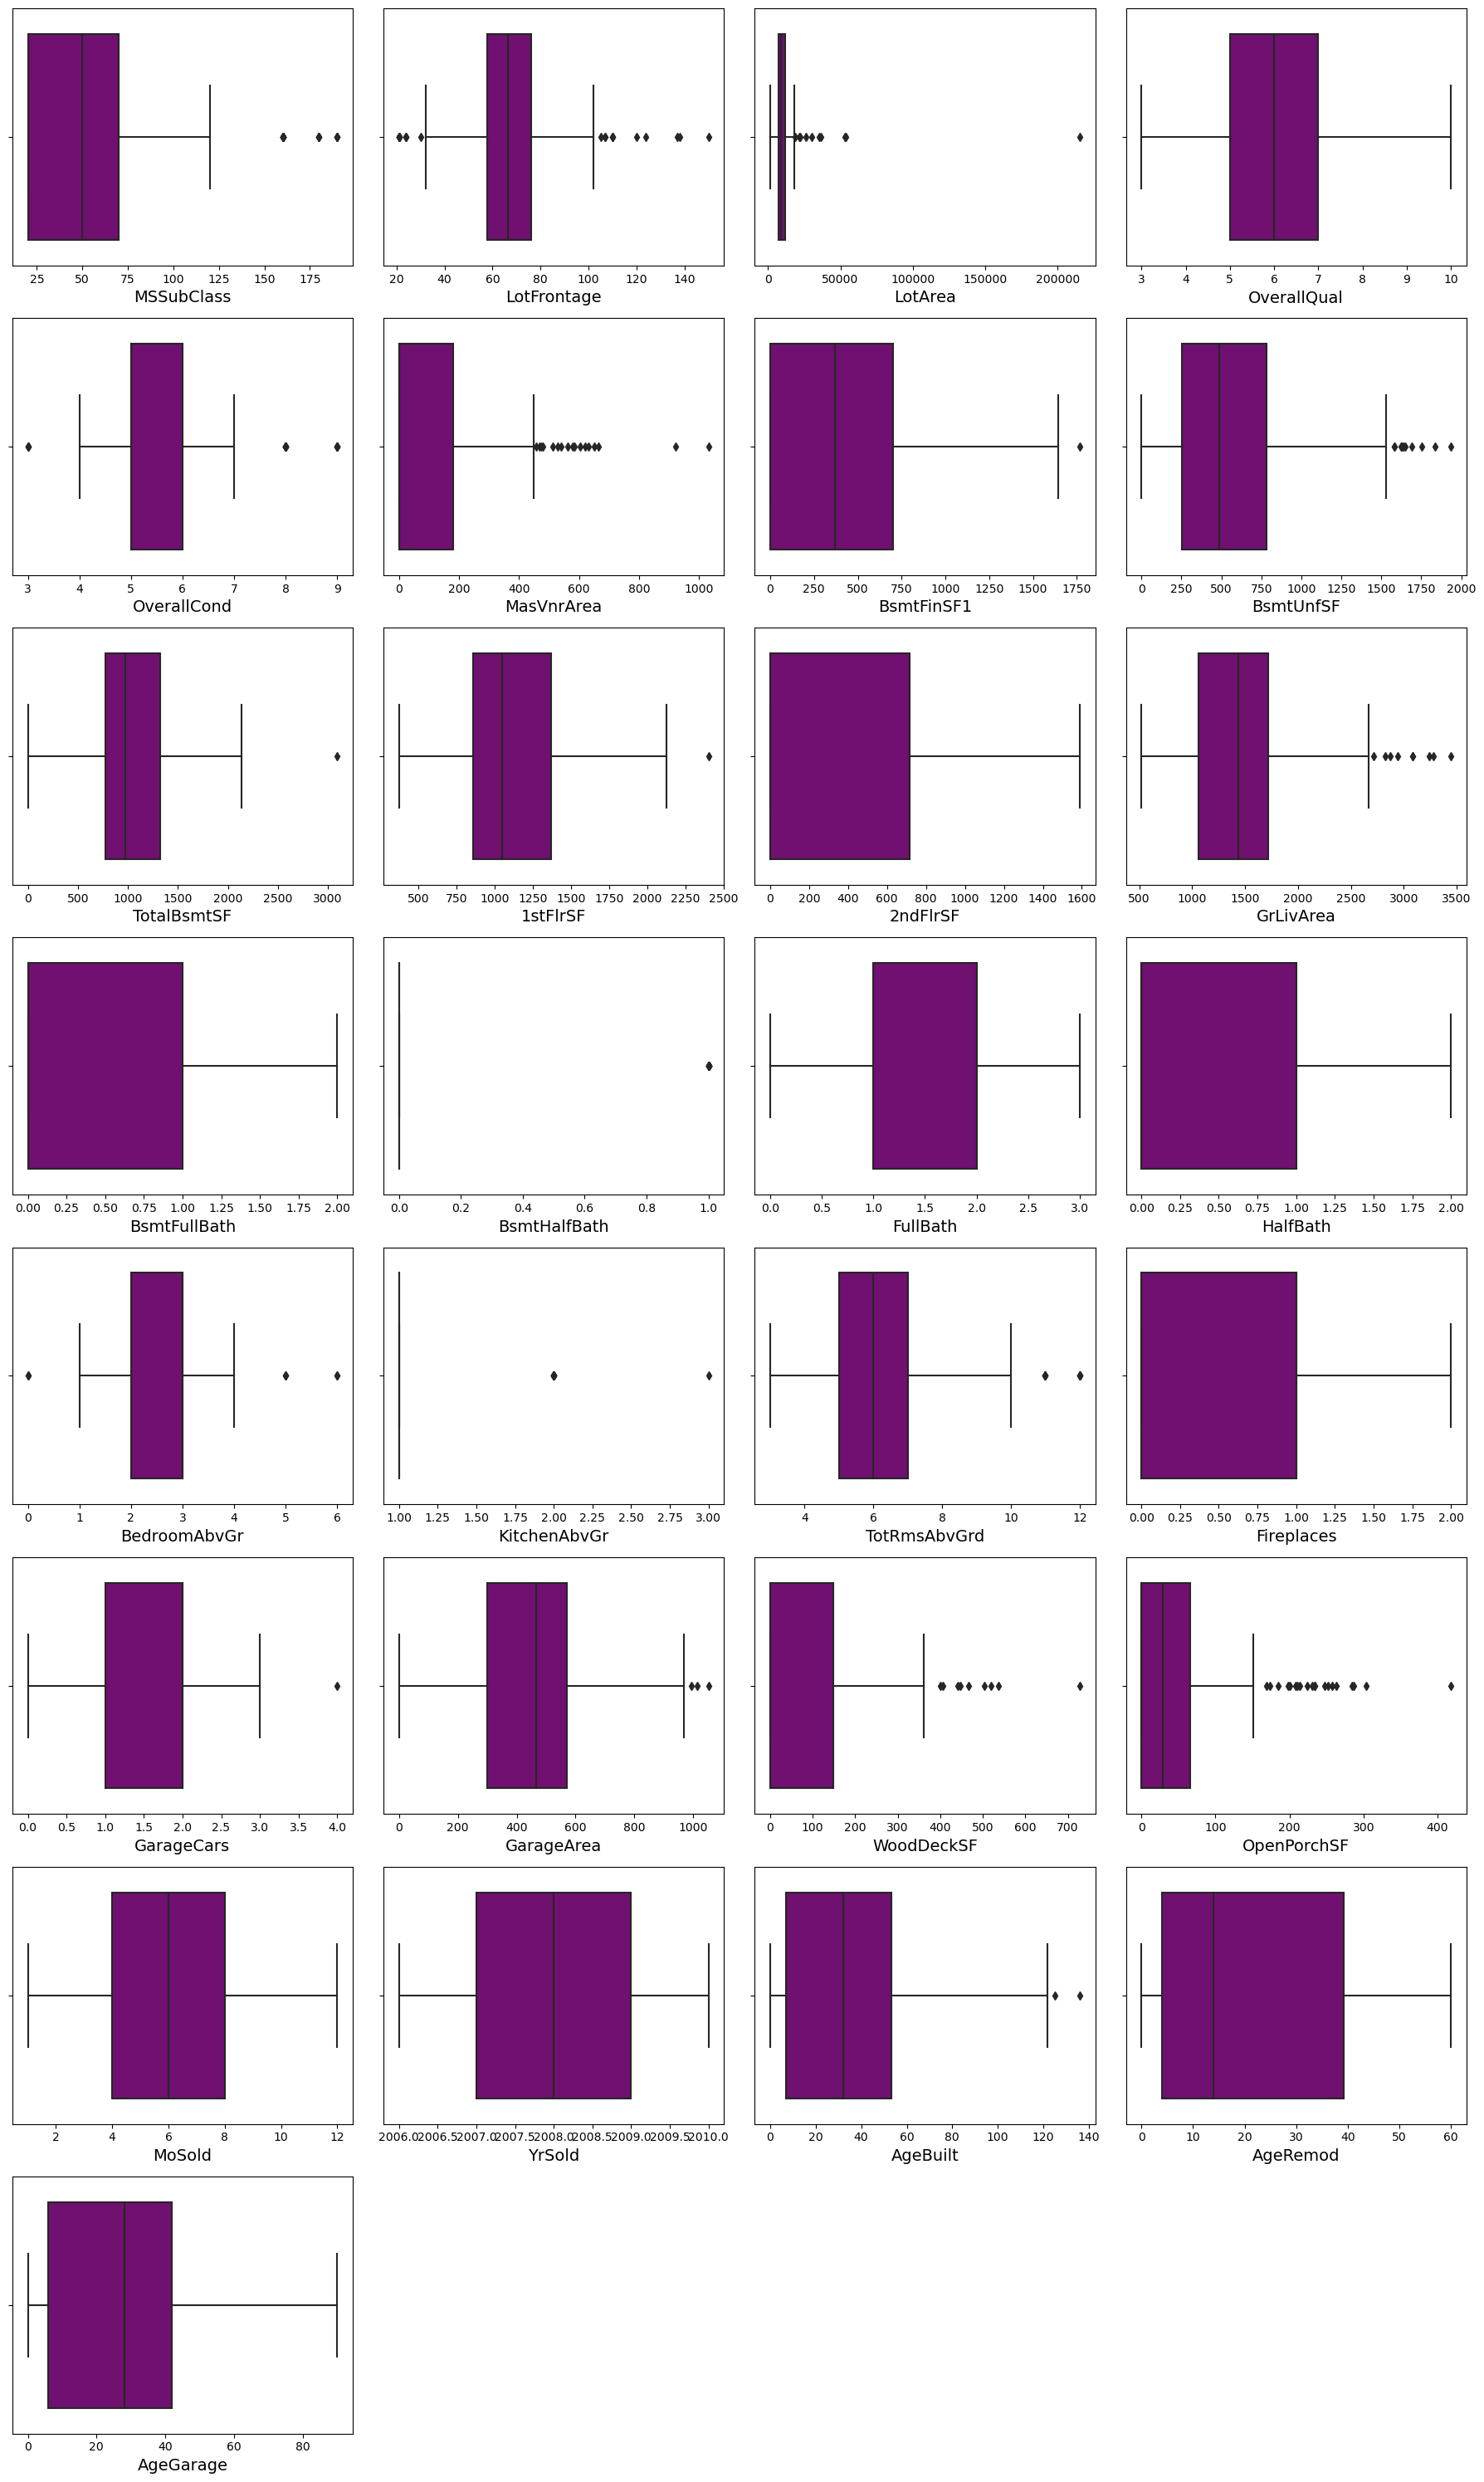

In [86]:
# Identifying the outliers using boxplot
plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for column in numerical_coltest:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(test_df[column],color="purple")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

- *`Outliers present in all the columns except OverallQual, 2ndFlrSF,BsmtFullBath, FullBath, HalfBath, FirePlaces, MoSold, YrSold, AgeRemod and AgeGarage.`
- *`The column OverallCond seems to be categorical so, I am not removing outliers in this columns.`


# Let's remove the outliers in the remaining columns using both Zscore and IQR method and compare the dataloss.

# Removing outliers in test dataset

# Zscore method

In [87]:
# Feature containing outliers
features_te = test_df[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeBuilt']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features_te))

In [88]:
# Creating new dataframe
new_test_df = test_df[(z<3).all(axis=1)] 
new_test_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL    86.000000    14157   Pave      IR1         HLS   
1         120       RL    66.425101     5814   Pave      IR1         Lvl   
2          20       RL    66.425101    11838   Pave      Reg         Lvl   
3          70       RL    75.000000    12000   Pave      Reg         Bnk   
4          60       RL    86.000000    14598   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Corner       Gtl      StoneBr       Norm       Norm     1Fam     1Story   
1   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     1Story   
3    Inside       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4   CulDSac       Gtl      Somerst      Feedr       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            9            5       Hip  CompShg     VinylSd     VinylSd   
1            8            5     Gable  CompShg     HdBoard     HdBoard   
2            8            5       Hip  CompShg     VinylSd     VinylSd   
3            7            7     Gable  CompShg     MetalSd     MetalSd   
4            6            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0      Stone       200.0        Gd        TA      PConc       Ex       TA   
1       None         0.0        Gd        TA     CBlock       Gd       TA   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     CBlock       TA       TA   
4      Stone        74.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           Gd          GLQ        1249          Unf        673         1922   
1           Av          GLQ        1036          Unf        184         1220   
2           Av          Unf           0          Unf       1753         1753   
3           No          Rec         275          Unf        429          704   
4           Mn          Unf           0          Unf        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        Ex          Y      SBrkr      1922         0       1922   
1    GasA        Gd          Y      SBrkr      1360         0       1360   
2    GasA        Ex          Y      SBrkr      1788         0       1788   
3    GasA        Ex          Y      SBrkr       860       704       1564   
4    GasA        Ex          Y      SBrkr       894      1039       1933   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         0             3             1   
1             1             0         1         0             1             1   
2             0             0         2         0             3             1   
3             0             0         1         1             3             1   
4             0             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           1          Gd     Attchd   
1          Gd             4        Typ           1          Ex     Attchd   
2          Ex             7        Typ           1          TA     Attchd   
3          Fa             7        Typ           1          Gd     Attchd   
4          Gd             9        Typ           1          Gd    BuiltIn   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          Fin           3         676         TA         TA          Y   
1          RFn           2         565         TA         TA          Y   
2          RFn           2         522      

## This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3

In [89]:
# Checking the shape of dataset before and after removing outliers
print("Shape of test dataset before removing outliers:", test_df.shape)
print("Shape of test dataset after removing outliers:", new_test_df.shape)

Shape of test dataset before removing outliers: (292, 67)
Shape of test dataset after removing outliers: (234, 67)


In [90]:
# Checking the the data loss after removing outliers
data_loss = (292-234)/292*100
data_loss

19.863013698630137

## By using Zscore I am losing around 19.86% of data which is not acceptable. The acceptable range of data loss is less than 10. So let's try to remove outliers using IQR method.

# IQR (Inter Quantile Range) method

In [91]:
# 1st quantile
Q1=features_te.quantile(0.25)

# 3rd quantile
Q3=features_te.quantile(0.75)

# IQR
IQR=Q3 - Q1

test_df1=test_df[~((test_df < (Q1 - 1.5 * IQR)) |(test_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [92]:
print("Shape of test data after using IQR method:", test_df1.shape)

Shape of test data after using IQR method: (181, 67)


In [93]:
# Checking the the data loss after removing outliers
data_loss = (292-181)/292*100
data_loss

38.013698630136986

## By using Zscore and IQR method I am losing large amount of data, let's use percentile method to remove the outliers by setting the dataloss to 2%.

# Percentile Method

In [94]:
# Removing outliers in train data using percentile method 
for col1 in features_te:
    if test_df[col1].dtypes != 'object':
        percentile = test_df[col1].quantile([0.01,0.98]).values
        test_df[col1][test_df[col1]<=percentile[0]]=percentile[0]
        test_df[col1][test_df[col1]>=percentile[1]]=percentile[1]

## I have removed the outliers present in train dataset using percentile method.

## Checking for skewness in train data

In [95]:
# Checking the skewness
train_df.skew()

MSSubClass      1.422019
LotFrontage     0.188060
LotArea         1.191912
OverallQual     0.175082
OverallCond     0.580714
MasVnrArea      1.873138
BsmtFinSF1      0.639523
BsmtUnfSF       0.777624
TotalBsmtSF     0.166773
1stFlrSF        0.645842
2ndFlrSF        0.717390
GrLivArea       0.592755
BsmtFullBath    0.355224
BsmtHalfBath    3.954345
FullBath        0.057809
HalfBath        0.656492
BedroomAbvGr   -0.145762
KitchenAbvGr    4.374289
TotRmsAbvGrd    0.443931
Fireplaces      0.552677
GarageCars     -0.434745
GarageArea     -0.135675
WoodDeckSF      1.053617
OpenPorchSF     1.513678
MoSold          0.220979
YrSold          0.115765
SalePrice       1.953878
AgeBuilt        0.469054
AgeRemod        0.495051
AgeGarage       0.598789
dtype: float64

### The following features contains skewness more than +0.5 and -0.5
- MSSubClass
- LotArea
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- BsmtHalfBath
- HalfBath
- KitchenAbvGr
- Fireplaces
- WoodDeckSF
- OpenPorchSF
- SalePrice
- AgeGarage

Since OverallCond is categorical and SalePrice is label, so no need to remove skewness in these columns.
Let's remove skewenss present in the remaining columns.

<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:green'>  Removing Skewness  <h2>

In [96]:
# Removing skewness using yeo-johnson  method to get better prediction
skew1 = ["MSSubClass","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtHalfBath","HalfBath","KitchenAbvGr","Fireplaces","WoodDeckSF","OpenPorchSF","AgeGarage"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')


In [97]:
train_df[skew1] = scaler.fit_transform(train_df[skew1].values)
train_df[skew1].head()

MSSubClass   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
0    1.370435 -1.306083   -0.822896   -0.117054   0.916764 -0.481887   
1   -1.167999  1.356458   -0.822896    0.395541   1.042594  2.082190   
2    0.490047  0.113089   -0.822896    0.934402  -0.510359  0.048689   
3   -1.167999  0.530989    1.385487    0.803940   1.178365  1.665038   
4   -1.167999  1.497522    1.140684    1.189724  -0.230032  1.201931   

   2ndFlrSF  GrLivArea  BsmtHalfBath  HalfBath  KitchenAbvGr  Fireplaces  \
0 -0.871789  -1.281768     -0.238775 -0.782707           0.0    0.779453   
1 -0.871789   1.377184     -0.238775 -0.782707           0.0    0.779453   
2  1.177246   1.060650     -0.238775  1.268421           0.0    0.779453   
3 -0.871789   0.775546     -0.238775 -0.782707           0.0    0.779453   
4 -0.871789   0.322952      4.188040 -0.782707           0.0    0.779453   

   WoodDeckSF  OpenPorchSF  AgeGarage  
0   -0.960144     1.423871   0.284279  
1    0.783831     1.428474   0.520844  
2    1.047285     1.208580  -0.652949  
3   -0.960144     1.178672   0.389131  
4    1.139237    -1.062308   0.354804

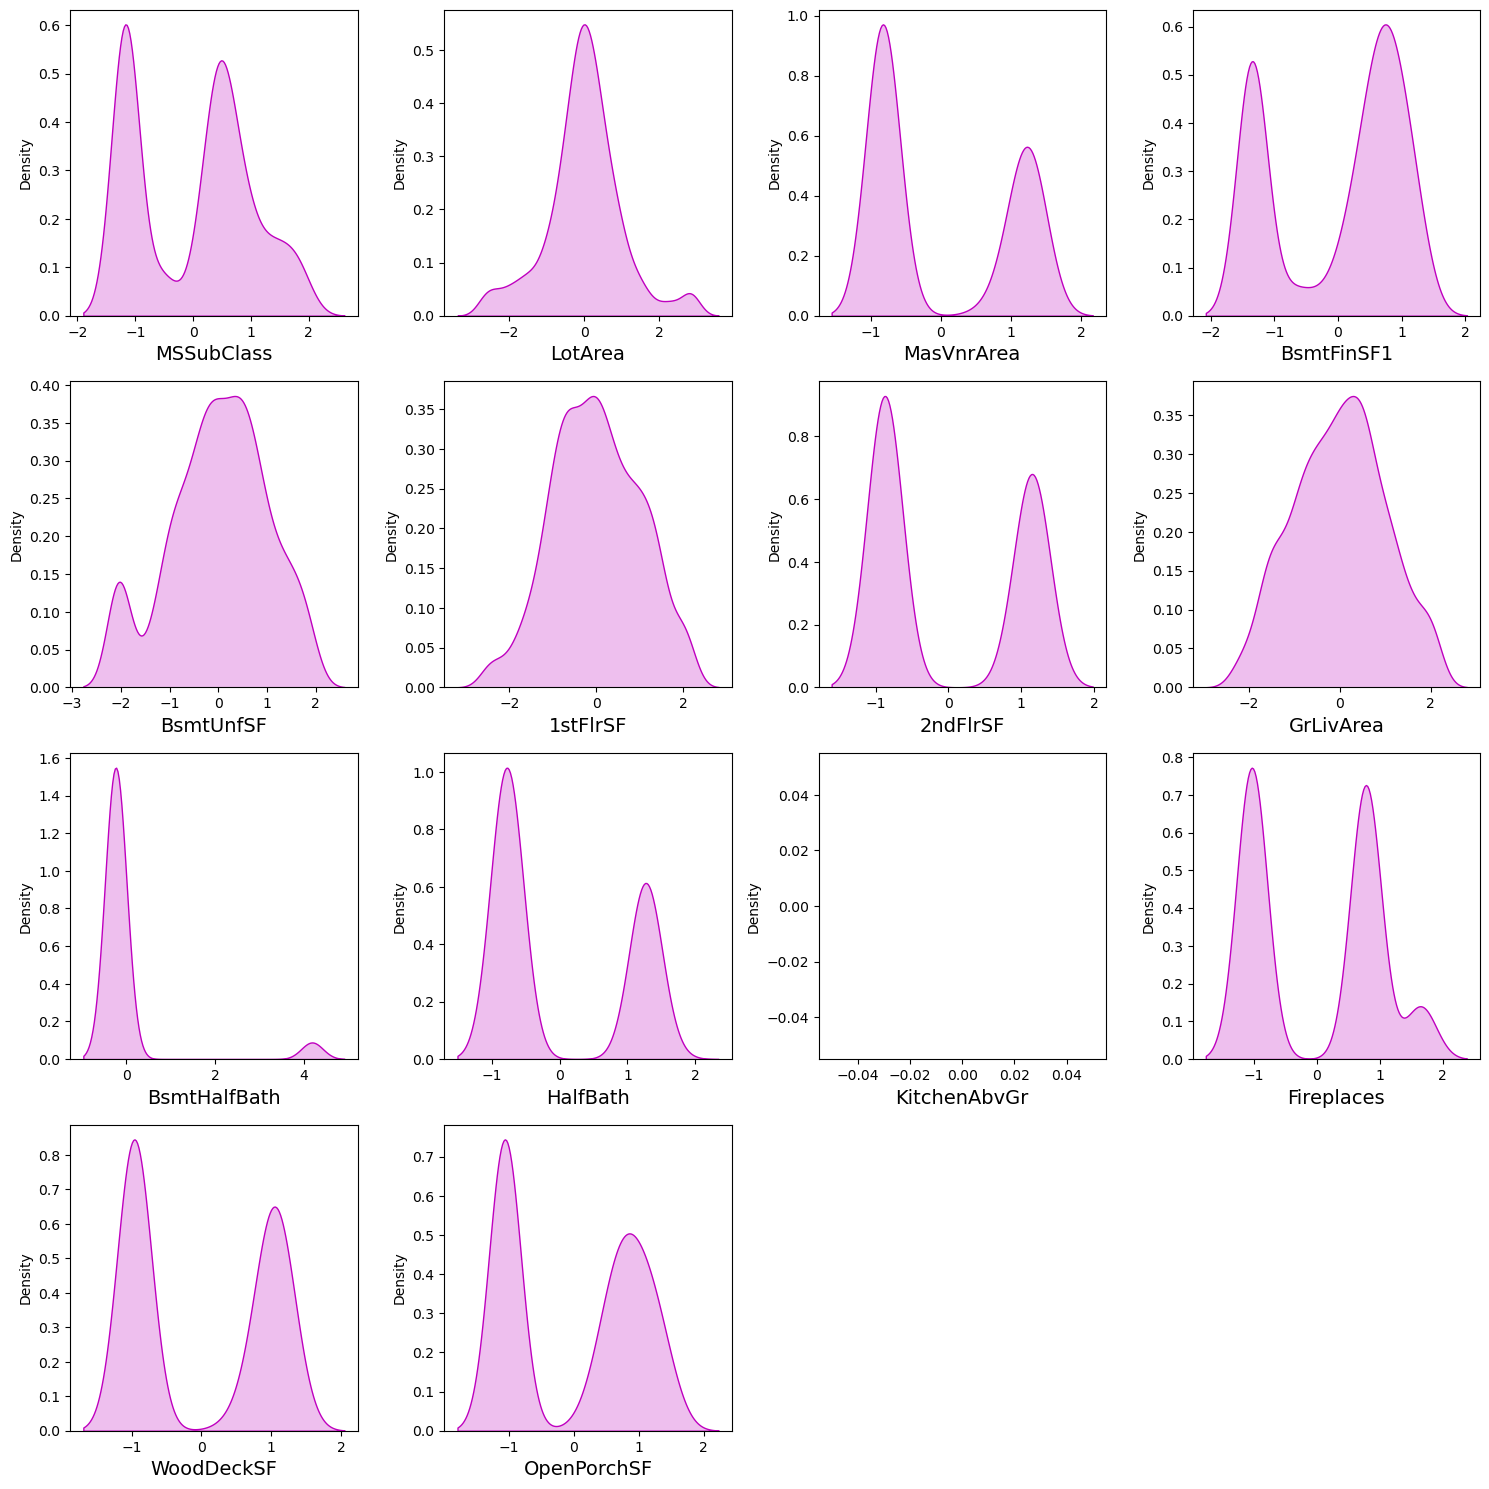

In [98]:
# Checking how the data has been distriubted in each column after removing skewness

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in train_df[skew1] :
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(train_df[column],color="m",kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [99]:
# Checking skewness after using yeo-johnson method
train_df[skew1].skew()

MSSubClass      0.064007
LotArea         0.077861
MasVnrArea      0.415092
BsmtFinSF1     -0.418554
BsmtUnfSF      -0.304290
1stFlrSF       -0.000731
2ndFlrSF        0.279883
GrLivArea      -0.005974
BsmtHalfBath    3.954345
HalfBath        0.498003
KitchenAbvGr    0.000000
Fireplaces      0.076595
WoodDeckSF      0.110387
OpenPorchSF    -0.010092
AgeGarage      -0.217611
dtype: float64

-` We can observe the skewness has almost been reduced in all the columns.`

-` The column KitchenAbvGr has skewness zero which means it contains only one unique value that is zero throughout the dataset, So I can drop this column as well.`

In [100]:
# Dropping irrelevant colum
train_df.drop("KitchenAbvGr",axis=1,inplace=True)

# Checking for skewness in test data

In [101]:
# Checking the skewness
test_df.skew()

MSSubClass      1.323471
LotFrontage    -0.017005
LotArea         1.266527
OverallQual     0.397312
OverallCond     1.209714
MasVnrArea      1.545675
BsmtFinSF1      0.639990
BsmtUnfSF       0.873375
TotalBsmtSF     0.149160
1stFlrSF        0.596239
2ndFlrSF        0.765511
GrLivArea       0.790479
BsmtFullBath    0.463685
BsmtHalfBath    3.544994
FullBath       -0.049800
HalfBath        0.758892
BedroomAbvGr   -0.345731
KitchenAbvGr    4.253608
TotRmsAbvGrd    0.627431
Fireplaces      0.540164
GarageCars     -0.356072
GarageArea      0.051450
WoodDeckSF      1.317908
OpenPorchSF     1.790292
MoSold          0.186504
YrSold          0.018412
AgeBuilt        0.623131
AgeRemod        0.533693
AgeGarage       0.678577
dtype: float64

### The following features contains skewness more than +0.5 and -0.5

- MSSubClass
- LotArea
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- BsmtHalfBath
- HalfBath
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- WoodDeckSF
- OpenPorchSF
- AgeBuilt
- AgeGarage

Since OverallCond is categorical so no need to remove skewness in this columns.
Let's remove skewenss present in the remaining columns.

# Removing skewness 

In [102]:
# Removing skewness using yeo-johnson  method to get better prediction
skew2 = ["MSSubClass","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtHalfBath","HalfBath","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","WoodDeckSF","OpenPorchSF","AgeBuilt","AgeGarage"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [103]:
test_df[skew2] = scaler.fit_transform(test_df[skew2].values)
test_df[skew2].head()

MSSubClass   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
0   -1.149822  1.012372    1.184649    1.212776   0.459512  1.831025   
1    1.341197 -0.878055   -0.846660    1.071176  -0.847801  0.748588   
2   -1.149822  0.565525   -0.846660   -1.376632   1.999450  1.606536   
3    0.706032  0.598156   -0.846660    0.235999  -0.094676 -0.717217   
4    0.507373  1.092887    0.953962   -1.376632   0.880166 -0.591803   

   2ndFlrSF  GrLivArea  BsmtHalfBath  HalfBath  KitchenAbvGr  TotRmsAbvGrd  \
0 -0.870294   0.966245     -0.263813 -0.738058           0.0      0.981907   
1 -0.870294  -0.083846     -0.263813 -0.738058           0.0     -1.613568   
2 -0.870294   0.744611     -0.263813 -0.738058           0.0      0.449228   
3  1.137231   0.337234     -0.263813  1.349285           0.0      0.449228   
4  1.211129   0.983798     -0.263813  1.349285           0.0      1.463878   

   Fireplaces  WoodDeckSF  OpenPorchSF  AgeBuilt  AgeGarage  
0    0.808861    1.121289     0.720332 -1.417238  -1.398277  
1    0.808861    0.815051    -1.112306 -0.008559   0.159148  
2    0.808861    1.156129     1.287751 -0.830966  -0.763392  
3    0.808861   -0.913781    -1.112306  1.066994   1.406311  
4    0.808861    0.955750     0.216312 -1.583151  -1.573401

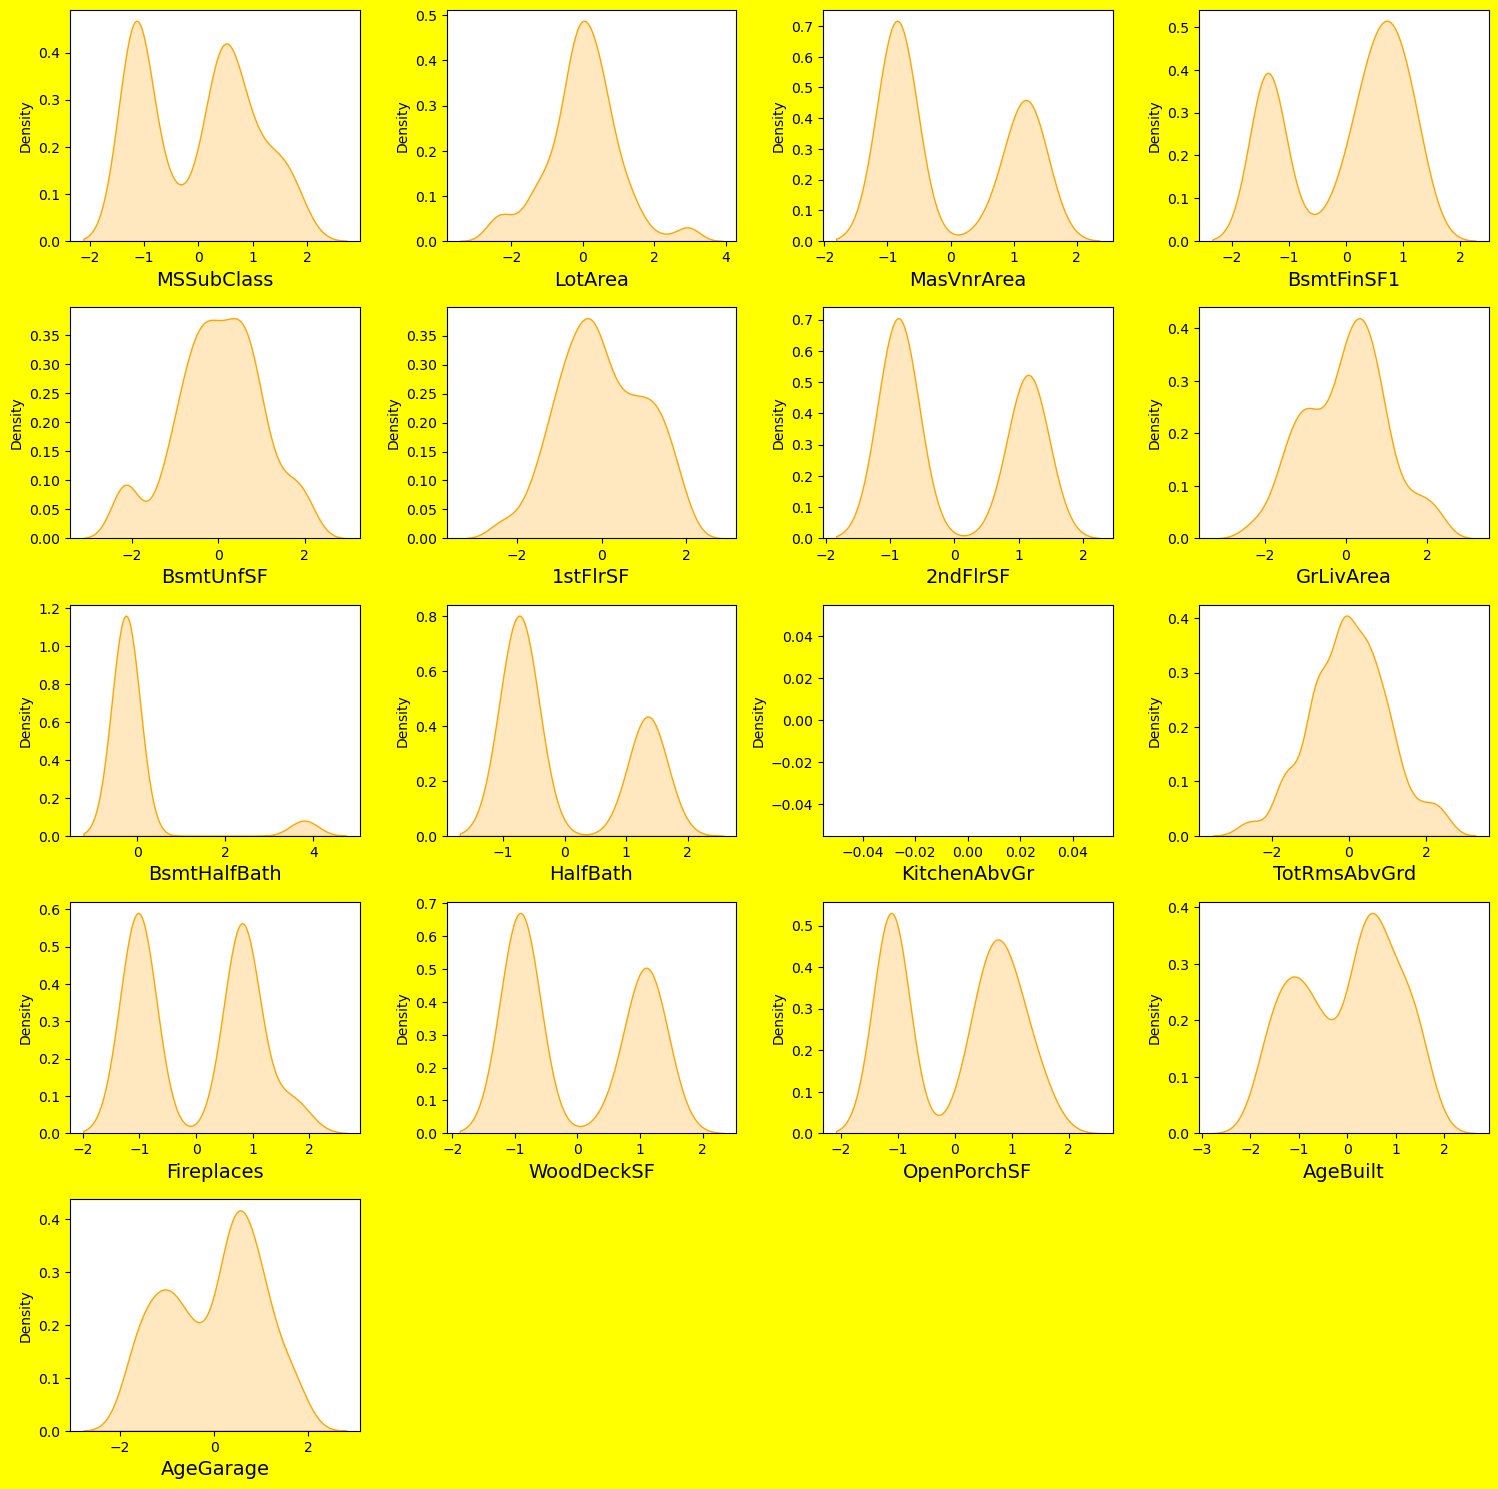

In [105]:
# Checking how the data has been distriubted in each column after removing skewness

plt.figure(figsize=(15,15),facecolor='yellow')
plotnumber=1
for column in test_df[skew2] :
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(test_df[column],color="orange",kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [106]:
# Checking skewness after using yeo-johnson method
test_df[skew2].skew()

MSSubClass      0.088585
LotArea         0.075717
MasVnrArea      0.362294
BsmtFinSF1     -0.447437
BsmtUnfSF      -0.247815
1stFlrSF        0.003835
2ndFlrSF        0.284246
GrLivArea      -0.003046
BsmtHalfBath    3.544994
HalfBath        0.621093
KitchenAbvGr    0.000000
TotRmsAbvGrd    0.000698
Fireplaces      0.076669
WoodDeckSF      0.208541
OpenPorchSF    -0.065103
AgeBuilt       -0.190514
AgeGarage      -0.186322
dtype: float64

In [107]:
test_df.drop("KitchenAbvGr",axis=1,inplace=True)

#The column KitchenAbvGr has skewness zero which means it contains only one unique value that is zero throughout the dataset, So I can drop this column as well.

<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:green'>  Encoding the dataset  <h2>

In [108]:
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    train_df[i] = train_df[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [109]:
# Encoding train dataframe using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in train_df.columns:
    if train_df[i].dtypes == "object":
        train_df[i] = enc.fit_transform(train_df[i].values.reshape(-1,1))

In [110]:
train_df.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0    1.370435       3.0     70.98847 -1.306083     1.0       0.0          3.0   
1   -1.167999       3.0     95.00000  1.356458     1.0       0.0          3.0   
2    0.490047       3.0     92.00000  0.113089     1.0       0.0          3.0   
3   -1.167999       3.0    105.00000  0.530989     1.0       0.0          3.0   
4   -1.167999       3.0     70.98847  1.497522     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        4.0        0.0          13.0         2.0         2.0       4.0   
1        4.0        1.0          12.0         2.0         2.0       0.0   
2        1.0        0.0          15.0         2.0         2.0       0.0   
3        4.0        0.0          14.0         2.0         2.0       0.0   
4        2.0        0.0          14.0         2.0         2.0       0.0   

   HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
0         2.0            6            5        1.0       1.0          8.0   
1         2.0            8            6        0.0       5.0         12.0   
2         5.0            7            5        1.0       1.0          7.0   
3         2.0            6            6        3.0       1.0          8.0   
4         2.0            6            7        1.0       1.0          4.0   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0          9.0         2.0   -0.822896          3          3         1.0   
1         13.0         2.0   -0.822896          4          4         2.0   
2          7.0         2.0   -0.822896          4          3         2.0   
3          9.0         1.0    1.385487          3          3         1.0   
4          4.0         3.0    1.140684          4          3         1.0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         4         3           3.0           0.0   -0.117054           5.0   
1         3         4           1.0           0.0    0.395541           4.0   
2         4         3           0.0           2.0    0.934402           5.0   
3         4         3           3.0           1.0    0.803940           5.0   
4         4         3           3.0           0.0    1.189724           5.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.916764      1078.00      1.0          3         1.0         4.0   
1   1.042594      2025.14      1.0          5         1.0         4.0   
2  -0.510359      1117.00      1.0          5         1.0         4.0   
3   1.178365      1844.00      1.0          5         1.0         4.0   
4  -0.230032      1602.00      1.0          4         1.0         4.0   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0 -0.481887 -0.871789  -1.281768             0     -0.238775         2   
1  2.082190 -0.871789   1.377184             1     -0.238775         2   
2  0.048689  1.177246   1.060650             1     -0.238775         2   
3  1.665038 -0.871789   0.775546             0     -0.238775         2   
4  1.201931 -0.871789   0.322952             0      4.188040         2   

   HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0 -0.782707           2.0            3           5.0         6.0    0.779453   
1 -0.782707           4.0            4           8.0         6.0    0.779453   
2  1.268421           3.0            3           8.0         6.0    0.779453   
3 -0.782707           3.0            3           7.0         6.0    0.779453   
4 -0.782707           3.0            4           8.0         6.0    0.779453   

   FireplaceQu  GarageType  GarageFinish  GarageCars  GarageArea  GarageQual  \
0            3         1.0           1.0           2       440.0           3   
1            3         1.0           2.0           2       621.0           3   
2            3         1.0           2.0           2       455.0 

## I have encoded object data types into numerical using OrdinalEncoder method

# Correlation between the label and features using HEAT map in Train dataset

In [111]:
# Checking the correlation between features and the target
cor = train_df.corr()
cor

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.026898    -0.316274 -0.312939 -0.017924   
MSZoning         0.026898  1.000000    -0.084834 -0.058912  0.140215   
LotFrontage     -0.316274 -0.084834     1.000000  0.596143 -0.044573   
LotArea         -0.312939 -0.058912     0.596143  1.000000 -0.072669   
Street          -0.017924  0.140215    -0.044573 -0.072669  1.000000   
LotShape         0.067516  0.053655    -0.157341 -0.287003 -0.012941   
LandContour     -0.030467  0.001175    -0.016620 -0.074834  0.105226   
LotConfig        0.057130 -0.027246    -0.201691 -0.198998  0.000153   
LandSlope       -0.016595 -0.023952     0.023253  0.176280 -0.141572   
Neighborhood    -0.011619 -0.251833     0.091671  0.075420  0.001420   
Condition1      -0.039101 -0.025651    -0.022579  0.069366  0.002189   
Condition2      -0.031881  0.031959     0.011970  0.056741  0.001406   
BldgType         0.586409 -0.024776    -0.467073 -0.524128 -0.013606   
HouseStyle       0.481353 -0.110991     0.057902  0.005503  0.016793   
OverallQual      0.122241 -0.134037     0.230687  0.190547  0.057140   
OverallCond     -0.033927  0.189553    -0.051887  0.010314  0.031082   
RoofStyle       -0.138069  0.000913     0.168101  0.119446 -0.006875   
RoofMatl        -0.028166  0.009719     0.063294  0.220463  0.007889   
Exterior1st     -0.048778 -0.012037     0.079942  0.079181  0.012482   
Exterior2nd     -0.069930  0.005548     0.108934  0.095689  0.014618   
MasVnrType      -0.028288 -0.033521    -0.066054 -0.019842  0.000822   
MasVnrArea       0.004875 -0.037361     0.166180  0.076589  0.020075   
ExterQual        0.062077 -0.160447     0.158712  0.097839  0.091807   
ExterCond       -0.031109  0.097907    -0.001004  0.070513 -0.028096   
Foundation       0.048143 -0.244844     0.090652  0.009319  0.032701   
BsmtQual         0.076728 -0.206193     0.163680  0.116129  0.027107   
BsmtCond        -0.006384 -0.041842     0.047333  0.047736  0.002199   
BsmtExposure    -0.060011  0.037414    -0.121117 -0.144857  0.065253   
BsmtFinType1     0.084234  0.021518    -0.028977 -0.043423 -0.006420   
BsmtFinSF1      -0.100436 -0.036041     0.087060  0.119301  0.008924   
BsmtFinType2     0.056615 -0.031322    -0.015941 -0.073788  0.045208   
BsmtUnfSF       -0.116225 -0.032954     0.130111  0.052521  0.030988   
TotalBsmtSF     -0.293377 -0.065060     0.318263  0.332367  0.016841   
Heating          0.071533  0.051188    -0.036713 -0.021160  0.006981   
HeatingQC        0.018161 -0.149446     0.084699  0.047385  0.038560   
CentralAir      -0.111572 -0.015887     0.087970  0.073866  0.043024   
Electrical       0.036332 -0.079205     0.073880  0.053827  0.038720   
1stFlrSF        -0.312472 -0.037611     0.394878  0.452791  0.009913   
2ndFlrSF         0.558561 -0.016193    -0.036998  0.009290  0.026241   
GrLivArea        0.230677 -0.086858     0.318133  0.397820  0.052837   
BsmtFullBath    -0.067705 -0.009900     0.070859  0.108691 -0.010398   
BsmtHalfBath     0.010020  0.006809     0.011408  0.043299  0.013997   
FullBath         0.197635 -0.188837     0.180823  0.187219  0.033208   
HalfBath         0.295003 -0.125164     0.049731  0.061575  0.045883   
BedroomAbvGr     0.078793 -0.000610     0.278173  0.297515  0.028722   
KitchenQual      0.048228 -0.133170     0.158665  0.127004  0.068306   
TotRmsAbvGrd     0.192707 -0.024508     0.323070  0.369388  0.039782   
Functional       0.037758 -0.091684     0.037977 -0.025038 -0.015309   
Fireplaces       0.029802  0.009349     0.227523  0.328380  0.021069   
FireplaceQu     -0.004202 -0.011942    -0.059379 -0.096589 -0.027427   
GarageType       0.104343  0.125155    -0.243693 -0.201895 -0.000824   
GarageFinish    -0.023714  0.162566    -0.202471 -0.155464 -0.001178   
GarageCars       0.000675 -0.130963     0.297190  0.272560  0.001838   
GarageArea      -0.075152 -0.163414     0.334422  0.319552 -0.002976   
GarageQual      -0.003808 -0.095053     0.053380  0.060

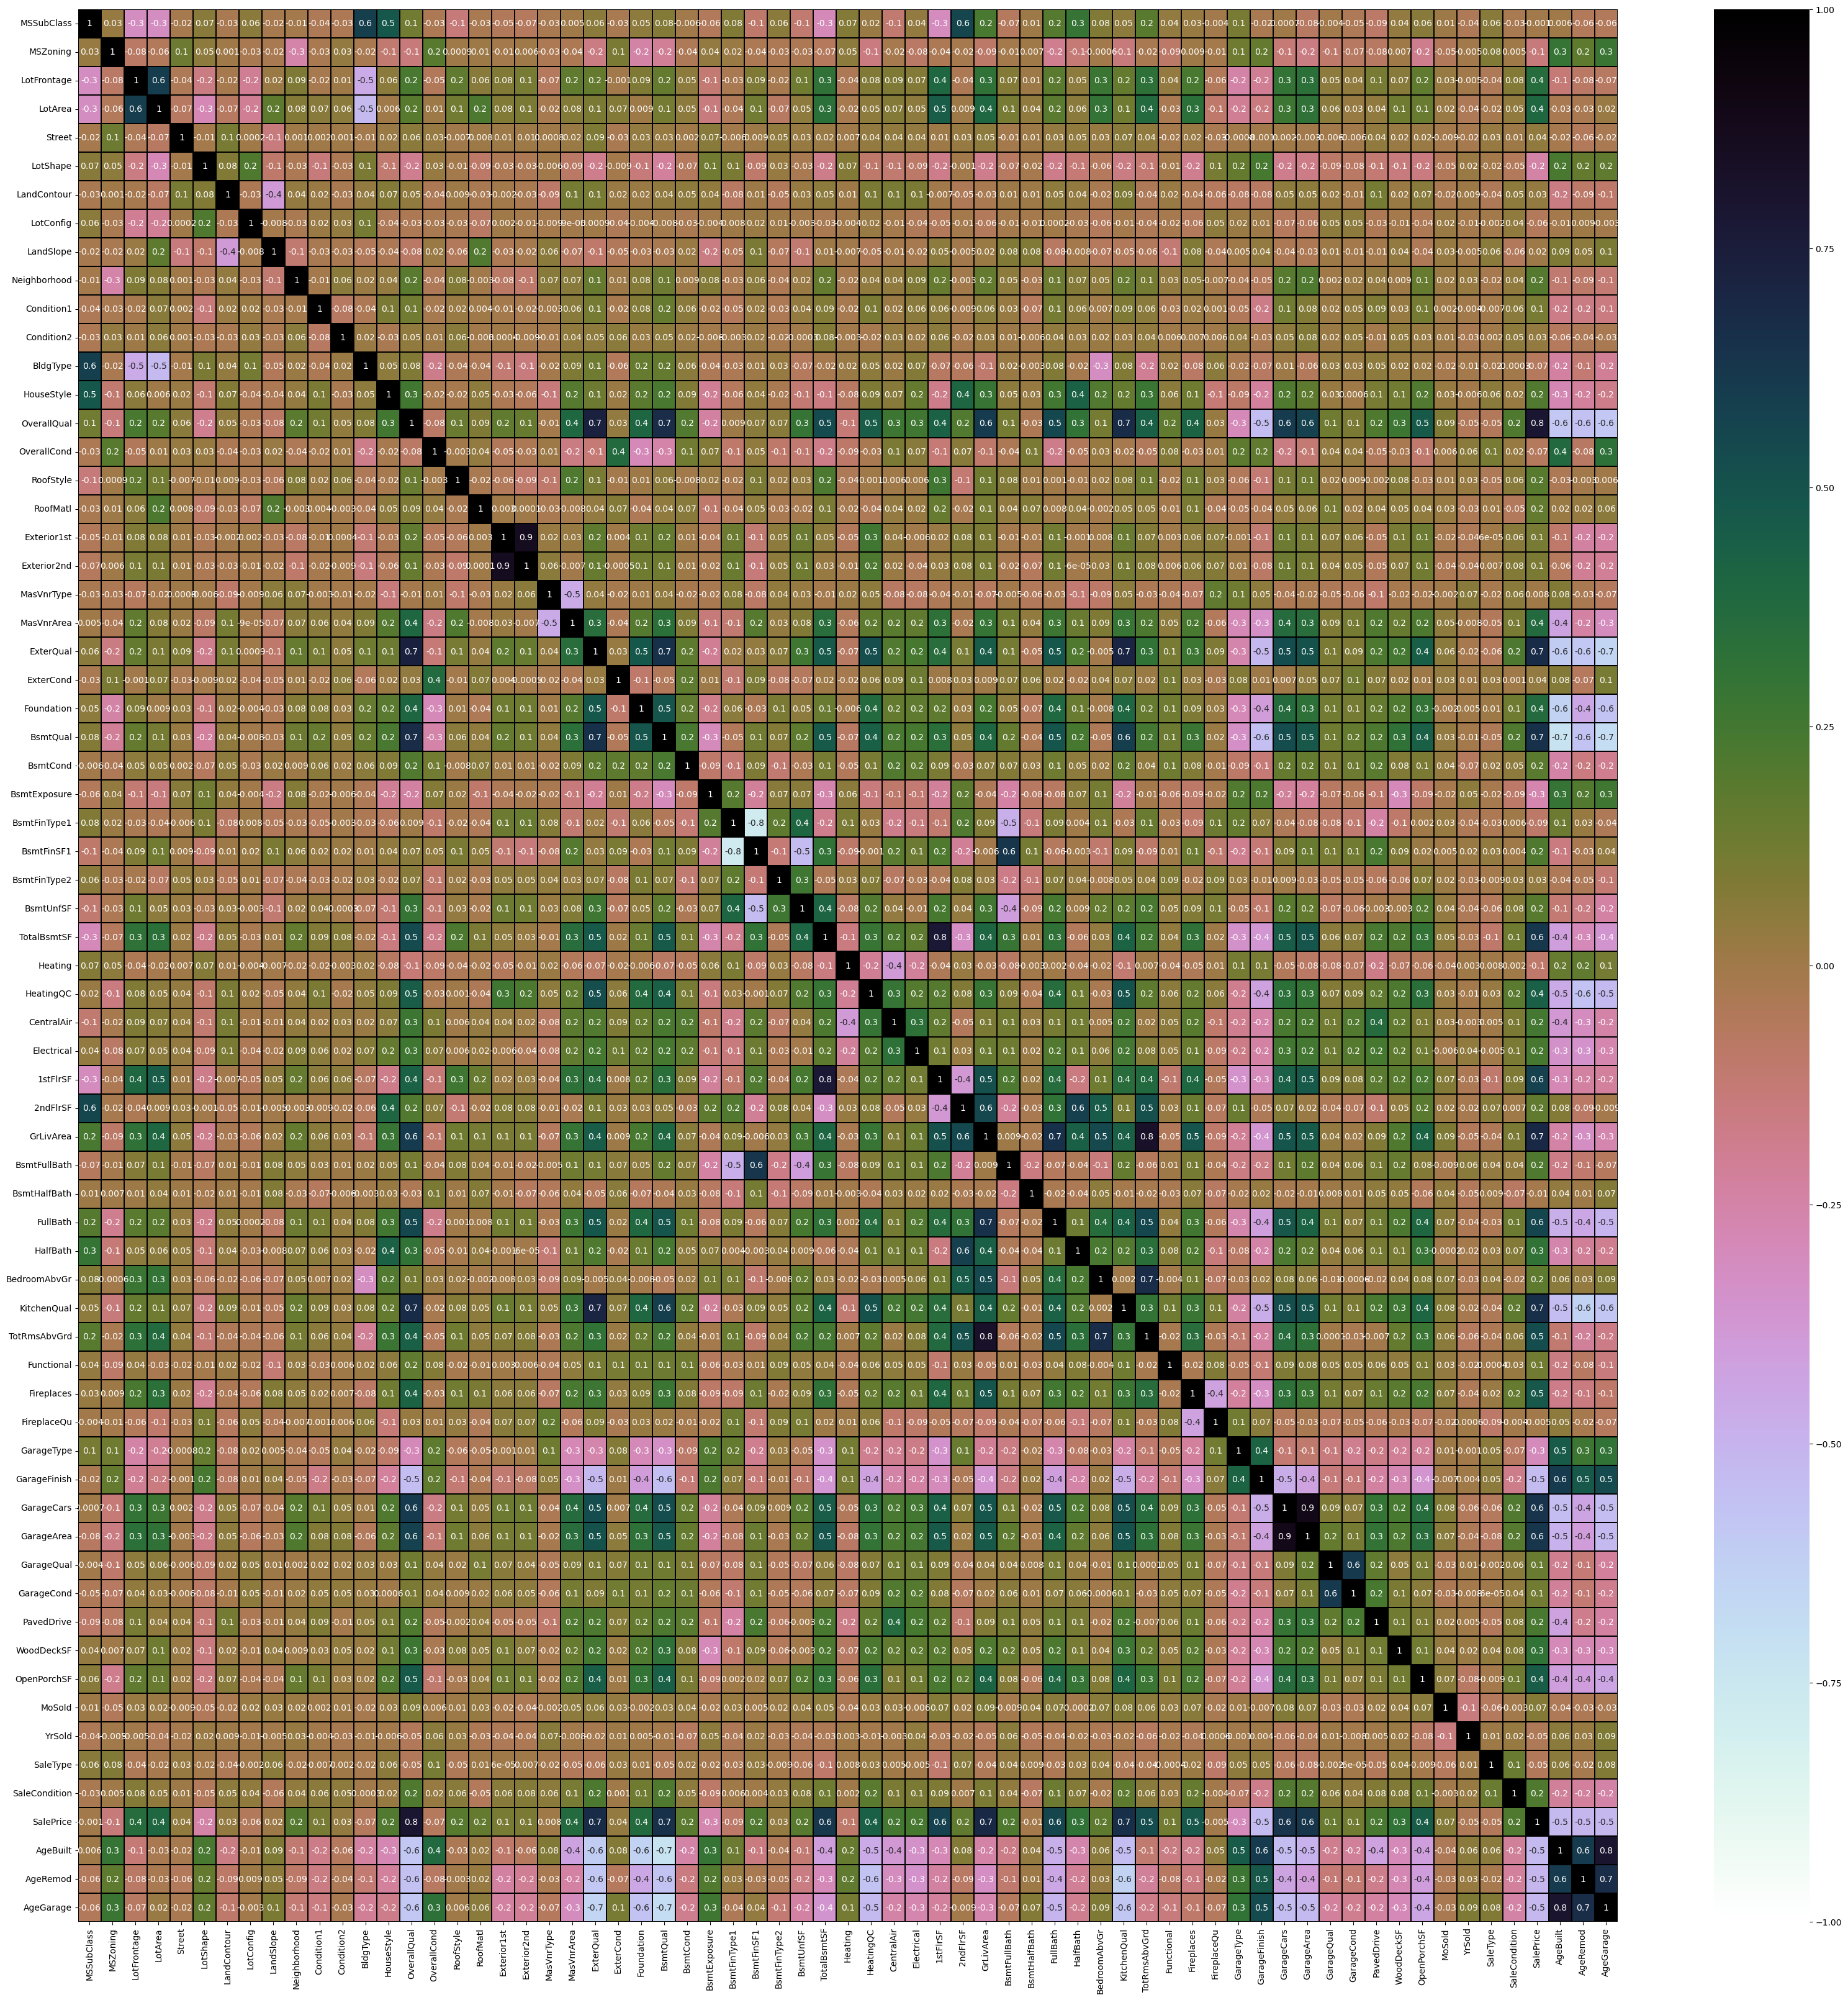

In [112]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(40,40))    
sns.heatmap(train_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="cubehelix_r")
plt.yticks(rotation=0);

- `This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.`
- `Dark shades are positively correlated with the label and light shades are negatively correlated with the label SalePrice.`

### Important features that affect SalePrice positively and negatively

**`Features having high Positive correlation with label`**

- OverallQual     
- GrLivArea        
- ExterQual        
- KitchenQual      
- BsmtQual         
- GarageCars       
- GarageArea       
- TotalBsmtSF      
- 1stFlrSF         
- FullBath         
- TotRmsAbvGrd

**`Features having high Negative correlation with label`**

- Heating         
- MSZoning        
- LotShape        
- BsmtExposure    
- GarageType      
- AgeRemod        
- AgeGarage       
- AgeBuilt       
- GarageFinish  


- `From the heat map it can be seen that most of the features are correlated with each other which means multicollinearity problem. This problem may impact our models.`
- `To overcome with this multicollinearity I need to check Variance Inflation Factor and should remove the columns containing VIF above 10 which is not acceptable. I will do it in the later part.`


In [113]:
cor['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.688210
ExterQual        0.672665
KitchenQual      0.659228
BsmtQual         0.653265
GarageCars       0.634573
GarageArea       0.627504
TotalBsmtSF      0.624311
1stFlrSF         0.575665
FullBath         0.554988
TotRmsAbvGrd     0.528564
Fireplaces       0.475531
OpenPorchSF      0.449961
HeatingQC        0.431516
LotArea          0.394343
Foundation       0.374169
MasVnrArea       0.373364
LotFrontage      0.358470
WoodDeckSF       0.310128
HalfBath         0.309808
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
BsmtFullBath     0.218620
SaleCondition    0.217687
BsmtFinSF1       0.212858
HouseStyle       0.205502
Neighborhood     0.198942
BsmtUnfSF        0.193140
RoofStyle        0.192654
BsmtCond         0.181625
BedroomAbvGr     0.177452
2ndFlrSF         0.167816
RoofMatl         0.159865
GarageQual       0.147272
GarageCond       0.119962
Functional       0.118673
Exterior1st 

In [114]:
cor['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.688210
ExterQual        0.672665
KitchenQual      0.659228
BsmtQual         0.653265
GarageCars       0.634573
GarageArea       0.627504
TotalBsmtSF      0.624311
1stFlrSF         0.575665
FullBath         0.554988
TotRmsAbvGrd     0.528564
Fireplaces       0.475531
OpenPorchSF      0.449961
HeatingQC        0.431516
LotArea          0.394343
Foundation       0.374169
MasVnrArea       0.373364
LotFrontage      0.358470
WoodDeckSF       0.310128
HalfBath         0.309808
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
BsmtFullBath     0.218620
SaleCondition    0.217687
BsmtFinSF1       0.212858
HouseStyle       0.205502
Neighborhood     0.198942
BsmtUnfSF        0.193140
RoofStyle        0.192654
BsmtCond         0.181625
BedroomAbvGr     0.177452
2ndFlrSF         0.167816
RoofMatl         0.159865
GarageQual       0.147272
GarageCond       0.119962
Functional       0.118673
Exterior1st 

### I can observe the positive and negative correlation between features and label.

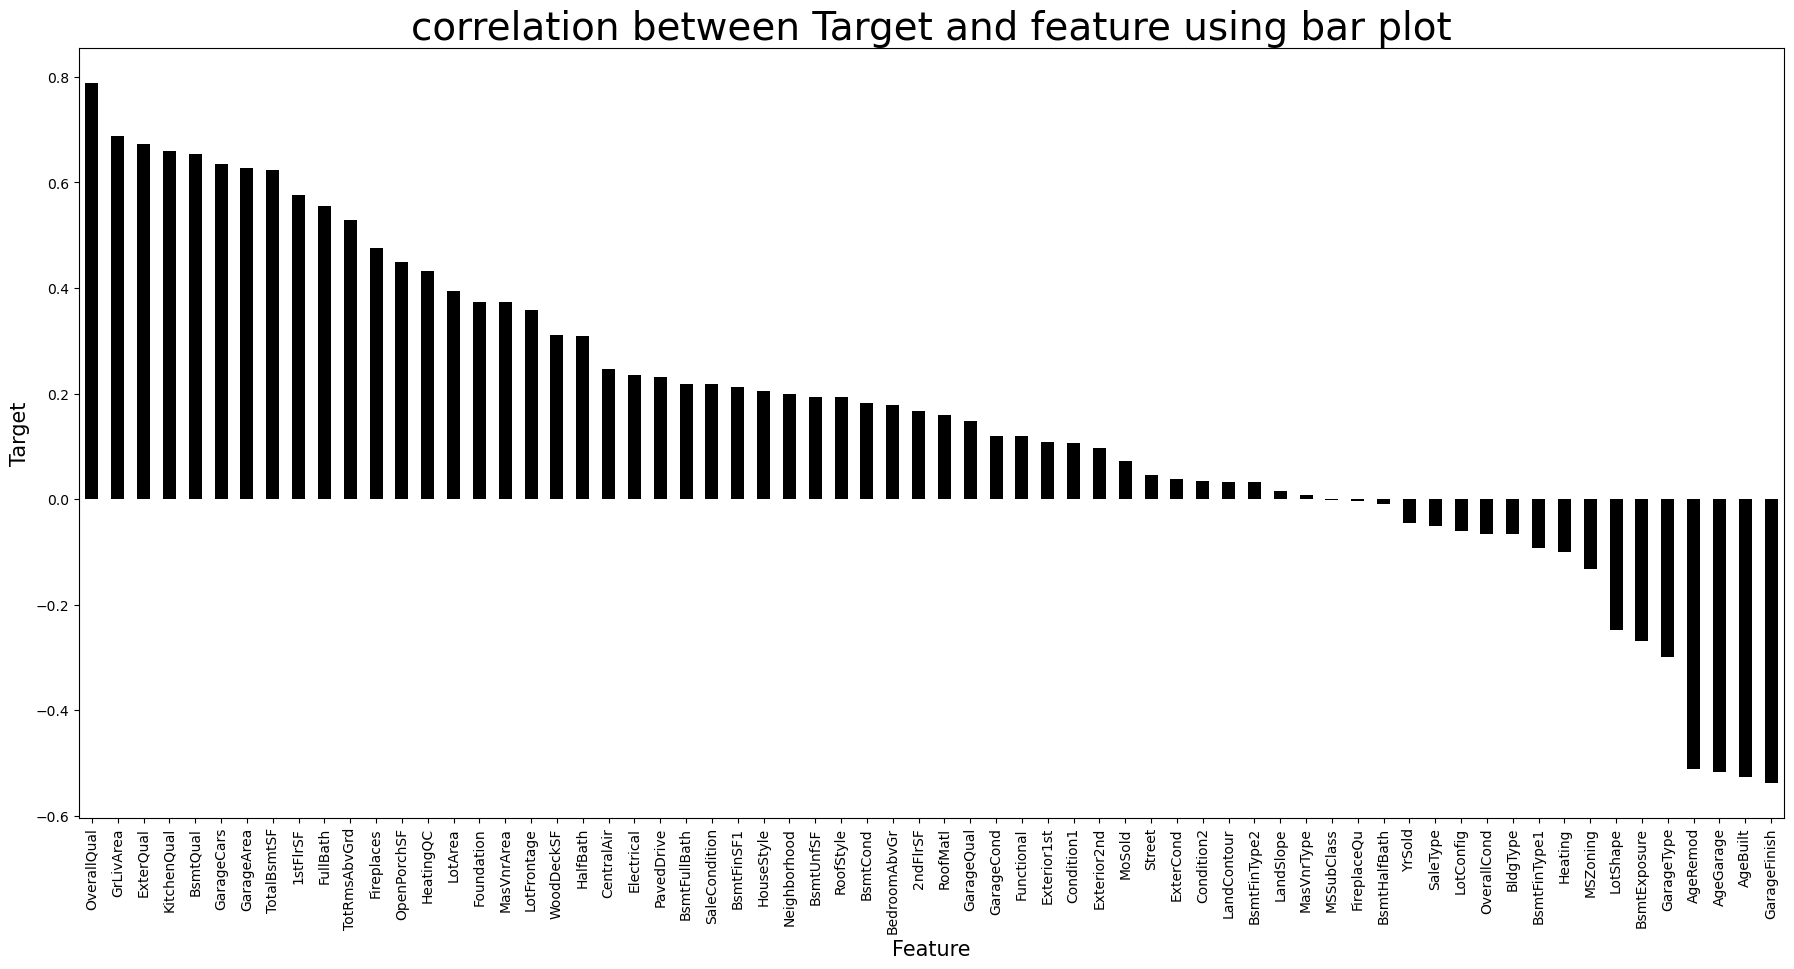

In [116]:
plt.figure(figsize=(22,10))
train_df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='black')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between Target and feature using bar plot',fontsize=28)
plt.show()

## I can observe the columns MSSubClass and FirePlaceQu have very less correlation with the label. I can drop this columns if necessary. But for now keeping them as it is.

<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:green'>  Separating the feature and label into x and y  <h2>

In [117]:
x = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

In [118]:
# Dimension of x and y
x.shape, y.shape

((1168, 66), (1168,))

<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:green'>  Lets Scale Train data using StandardScaler  <h2>

In [119]:
from sklearn.preprocessing import StandardScaler
# Scaling data
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.370435 -0.021646     0.039092 -1.306083  0.058621 -1.373107   
1   -1.167999 -0.021646     1.321126  1.356458  0.058621 -1.373107   
2    0.490047 -0.021646     1.160948  0.113089  0.058621 -1.373107   
3   -1.167999 -0.021646     1.855050  0.530989  0.058621 -1.373107   
4   -1.167999 -0.021646     0.039092  1.497522  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.318473   0.606420  -0.226126      0.142224   -0.037339   -0.023979   
1     0.318473   0.606420   3.295414     -0.024227   -0.037339   -0.023979   
2     0.318473  -1.220661  -0.226126      0.475125   -0.037339   -0.023979   
3     0.318473   0.606420  -0.226126      0.308675   -0.037339   -0.023979   
4     0.318473  -0.611634  -0.226126      0.308675   -0.037339   -0.023979   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0  2.985495   -0.549930    -0.075169    -0.530217  -0.483544 -0.134573   
1 -0.403288   -0.549930     1.364138     0.359572  -1.685203  6.090408   
2 -0.403288    1.030838     0.644484    -0.530217  -0.483544 -0.134573   
3 -0.403288   -0.549930    -0.075169     0.359572   1.919773 -0.134573   
4 -0.403288   -0.549930    -0.075169     1.249361  -0.483544 -0.134573   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0    -0.212927    -0.104890    0.395209   -0.822896  -0.700004  -0.223988   
1     1.079014     1.050880    0.395209   -0.822896   1.032209   2.589114   
2    -0.535912    -0.682775    0.395209   -0.822896   1.032209  -0.223988   
3    -0.212927    -0.104890   -1.241686    1.385487  -0.700004  -0.223988   
4    -1.504868    -1.549602    2.032104    1.140684   1.032209  -0.223988   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0   -0.557836  0.647378 -0.037507      0.635539     -1.523529   -0.117054   
1    0.852451 -0.832343  3.332324     -1.113129     -1.523529    0.395541   
2    0.852451  0.647378 -0.037507     -1.987463     -0.434828    0.934402   
3   -0.557836  0.647378 -0.037507      0.635539     -0.979178    0.803940   
4   -0.557836  0.647378 -0.037507      0.635539     -1.523529    1.189724   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0      0.310141   0.916764     0.067300 -0.11909  -1.178317    0.267506   
1     -0.771186   1.042594     2.453434 -0.11909   0.903792    0.267506   
2      0.310141  -0.510359     0.165553 -0.11909   0.903792    0.267506   
3      0.310141   1.178365     1.997087 -0.11909   0.903792    0.267506   
4      0.310141  -0.230032     1.387415 -0.11909  -0.137262    0.267506   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0    0.299036 -0.481887 -0.871789  -1.281768     -0.838227     -0.238775   
1    0.299036  2.082190 -0.871789   1.377184      1.192995     -0.238775   
2    0.299036  0.048689  1.177246   1.060650      1.192995     -0.238775   
3    0.299036  1.665038 -0.871789   0.775546     -0.838227     -0.238775   
4    0.299036  1.201931 -0.871789   0.322952     -0.838227      4.188040   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0  0.793082 -0.782707     -1.144966    -0.788838     -1.009429    0.261146   
1  0.793082 -0.782707      1.475072     0.716657      0.975397    0.261146   
2  0.793082  1.268421      0.165053    -0.788838      0.975397    0.261146   
3  0.793082 -0.782707      0.165053    -0.788838      0.313788    0.261146   
4  0.793082 -0.782707      0.165053     0.716657      0.975397    0.261146   

   Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  GarageArea  \
0    0.779453    -1.163409   -0.693653     -0.288773    0.307737   -0.163806   
1    0.779453    -1.163409   -0.693653      0.946709    0.307737    0.717359   
2    0.779453    -1.163409   -0.693653      0.946709    0.307737   -0.090782   
3    0.779453    -1.163409   -0.693653     -0

## I have scaled the data using StandardScaler method to overcome with the issue of data biasness.

### As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns in order to overcome with the multicollinearity issue.


<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:green'>  VIF(Variance Inflation Factor)  <h2>

In [120]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     5.713488     MSSubClass
1     1.360230       MSZoning
2     2.034551    LotFrontage
3     2.646135        LotArea
4     1.105741         Street
5     1.286923       LotShape
6     1.337008    LandContour
7     1.149363      LotConfig
8     1.457392      LandSlope
9     1.247096   Neighborhood
10    1.145185     Condition1
11    1.081437     Condition2
12    4.393946       BldgType
13    2.558012     HouseStyle
14    4.195415    OverallQual
15    2.159973    OverallCond
16    1.261527      RoofStyle
17    1.205322       RoofMatl
18    4.309391    Exterior1st
19    4.341659    Exterior2nd
20    1.553896     MasVnrType
21    1.990250     MasVnrArea
22    3.314137      ExterQual
23    1.317008      ExterCond
24    2.134149     Foundation
25    3.255388       BsmtQual
26    1.253280       BsmtCond
27    1.598319   BsmtExposure
28    3.034550   BsmtFinType1
29    6.236965     BsmtFinSF1
30    1.346964   BsmtFinType2
31    4.581997      BsmtUnfSF
32    7.577665    TotalBsmtSF
33    1.326339        Heating
34    1.898682      HeatingQC
35    1.685249     CentralAir
36    1.378262     Electrical
37   13.121291       1stFlrSF
38   13.751327       2ndFlrSF
39   19.935110      GrLivArea
40    2.231707   BsmtFullBath
41    1.230417   BsmtHalfBath
42    3.135776       FullBath
43    2.484583       HalfBath
44    2.690293   BedroomAbvGr
45    2.774098    KitchenQual
46    4.735836   TotRmsAbvGrd
47    1.242739     Functional
48    2.176242     Fireplaces
49    1.545188    FireplaceQu
50    1.769888     GarageType
51    2.075835   GarageFinish
52    6.496379     GarageCars
53    6.618875     GarageArea
54    1.811850     GarageQual
55    1.820513     GarageCond
56    1.528738     PavedDrive
57    1.320669     WoodDeckSF
58    1.612165    OpenPorchSF
59    1.084214         MoSold
60    1.112910         YrSold
61    1.123099       SaleType
62    1.194518  SaleCondition
63    8.466503       AgeBuilt
64    3.213674       AgeRemod
65    5.612681      AgeGarage

### Here the column "GrLivArea" has VIF above 10 which means this feature causing multicollinearity problem. Let's drop this column.

In [121]:
x.drop("GrLivArea",axis=1,inplace=True)

In [122]:
# Checking VIF after removing the column
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     5.693084     MSSubClass
1     1.359386       MSZoning
2     2.030565    LotFrontage
3     2.644317        LotArea
4     1.099567         Street
5     1.285268       LotShape
6     1.336602    LandContour
7     1.149112      LotConfig
8     1.452591      LandSlope
9     1.243868   Neighborhood
10    1.144204     Condition1
11    1.079412     Condition2
12    4.365960       BldgType
13    2.503260     HouseStyle
14    4.175306    OverallQual
15    2.152275    OverallCond
16    1.259230      RoofStyle
17    1.203302       RoofMatl
18    4.305353    Exterior1st
19    4.332219    Exterior2nd
20    1.546577     MasVnrType
21    1.989515     MasVnrArea
22    3.314125      ExterQual
23    1.312432      ExterCond
24    2.113847     Foundation
25    3.249337       BsmtQual
26    1.253243       BsmtCond
27    1.596317   BsmtExposure
28    3.034356   BsmtFinType1
29    6.234663     BsmtFinSF1
30    1.346147   BsmtFinType2
31    4.581370      BsmtUnfSF
32    7.535892    TotalBsmtSF
33    1.324474        Heating
34    1.893913      HeatingQC
35    1.680440     CentralAir
36    1.377402     Electrical
37    6.490990       1stFlrSF
38    6.545980       2ndFlrSF
39    2.231588   BsmtFullBath
40    1.229208   BsmtHalfBath
41    2.955559       FullBath
42    2.391212       HalfBath
43    2.657332   BedroomAbvGr
44    2.773439    KitchenQual
45    4.361712   TotRmsAbvGrd
46    1.236563     Functional
47    2.141506     Fireplaces
48    1.536731    FireplaceQu
49    1.769887     GarageType
50    2.067198   GarageFinish
51    6.491140     GarageCars
52    6.571639     GarageArea
53    1.807059     GarageQual
54    1.819609     GarageCond
55    1.527704     PavedDrive
56    1.319667     WoodDeckSF
57    1.601247    OpenPorchSF
58    1.083084         MoSold
59    1.112885         YrSold
60    1.121457       SaleType
61    1.194159  SaleCondition
62    8.343810       AgeBuilt
63    3.209383       AgeRemod
64    5.608571      AgeGarage

## Now all the feature have VIF less than 10 which means multicollinearity problem has been solved.


<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:green'> BUILDING ML MODELS FROM TRAIN DATASET  <h2>

In [125]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [126]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9033916164328796  on Random_state  50


# Creating new train test split

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

## Regression Algorithms

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


# Linear Regression

In [129]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
lir=r2_score(y_test,predLR)
print('R2_score:',lir)


# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

# Checking Cross Validation Score for Linear Regression
lr_cv=cross_val_score(LR,x,y,cv=5).mean()
print("Cross Validation Score:",lr_cv)


R2_score: 0.8473875779004594
MAE: 21800.803922533174
MSE: 918581166.383771
RMSE: 30308.103972102428
Cross Validation Score: 0.801539214552311


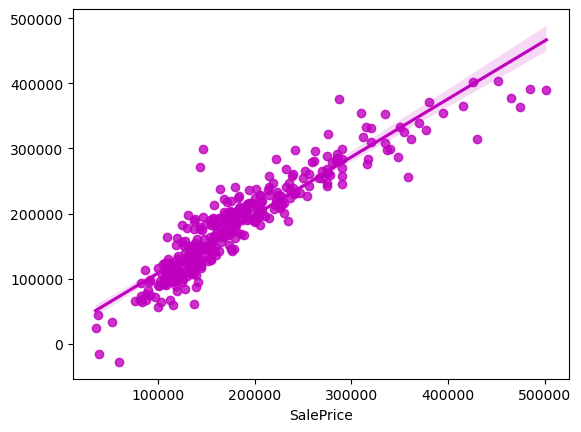

In [130]:
# Visualizing the predicteed values
sns.regplot(y_test,predLR,color="m")
plt.show()

### Created linear regression model and getting 84.73% R2 score using this model. From the above plot we can observe the sales price of the house. The best fit line shows there is strong linear relation between test data of trained model and predicted values.

# Regularization

## Lasso Regressor

In [131]:
# Checking r2score for Lasso Regressor
lasso=Lasso()

# Predictions
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
pred_lasso=lasso.predict(x_test)
las=r2_score(y_test,pred_lasso)
print('R2_Score:',las)
print('MAE:',metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:',metrics.mean_squared_error(y_test, pred_lasso))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

# Checking cv score for Lasso Regression
las_cv=cross_val_score(lasso,x,y,cv=5).mean()
print("Cross Validation Score:",las_cv)
dif2=las-las_cv

R2_Score: 0.8474202090757218
MAE: 21798.01067336179
MSE: 918384757.8436227
RMSE: 30304.863600478762
Cross Validation Score: 0.8015627825252103


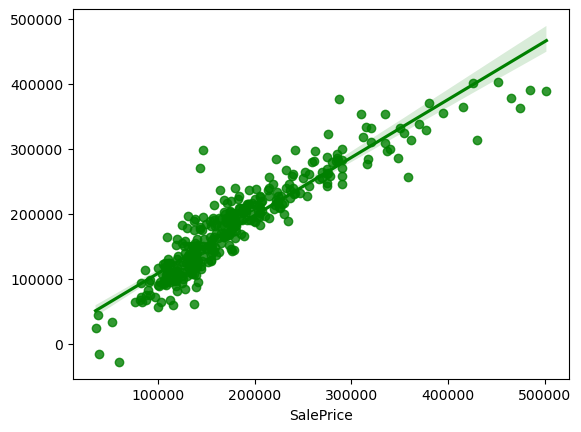

In [132]:
sns.regplot(y_test,pred_lasso,color="g")
plt.show()

### Created Lasso regressor model and getting 84.74% R2 score using this model. From the above plot we can observe the sales price of the house. The best fit line shows there is strong linear relation between test data of trained model and predicted values.

## Ridge Regressor

In [133]:
# Checking R2 score for Ridge regressor
ridge=Ridge(alpha=100)
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
pred_ridge=ridge.predict(x_test)
rid=r2_score(y_test,pred_ridge)
print('R2_Score:',rid)
print('MAE:',metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

# Checking cv score for Ridge regressor
cross_val_score(ridge,x,y,cv=5).mean()
rid_cv=cross_val_score(ridge,x,y,cv=5).mean()
print("Cross Validation Score:",rid_cv)
dif3=rid-rid_cv

R2_Score: 0.8530186845374867
MAE: 21064.584473909617
MSE: 884687277.3312912
RMSE: 29743.6930681328
Cross Validation Score: 0.8056349740140506


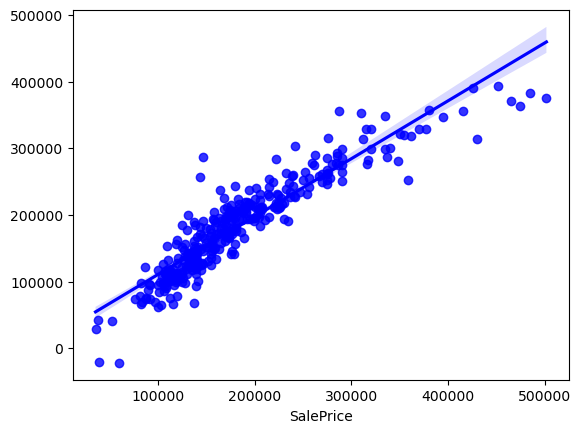

In [134]:
# Visualizing the predicteed values
sns.regplot(y_test,pred_ridge,color="b")
plt.show()

## Created Ridge regressor model and getting 85.30% R2 score using this model. From the above plot we can observe the sales price of the house. The best fit line shows there is strong linear relation between test data of trained model and predicted values.

# Ensemble Techniques

## Random Forest Regressor

In [135]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
rfr=r2_score(y_test,predRFR)
print('R2_Score:',rfr)

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:',metrics.mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

# Checking cv score for Lasso Regression
rfr_cv=cross_val_score(RFR,x,y,cv=5).mean()
print("Cross Validation Score:",rfr_cv)
dif4=rfr-rfr_cv

R2_Score: 0.898907332122795
MAE: 16604.657948717948
MSE: 608481403.3743693
RMSE: 24667.41582278876
Cross Validation Score: 0.834384234641872


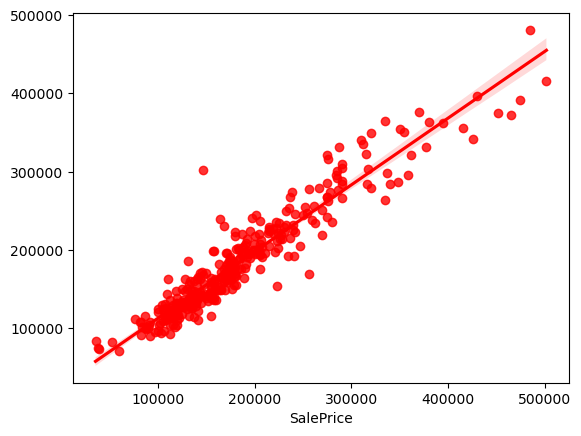

In [136]:
# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="r")
plt.show()

## Created Random Forest Regressor model and getting 90.16% R2 score using this model.From the above plot we can observe the sales price of the house. The best fit line shows there is strong linear relation between test data of trained model and predicted values.

# ExtraTrees Regressor

In [137]:
# Checking R2 score for Extra Trees Regressor

XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
etr=r2_score(y_test,predXT)
print('R2_Score:',etr)

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predXT))
print('MSE:',metrics.mean_squared_error(y_test, predXT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predXT)))

# Checking cv score for ExtraTreesRegressor
etr_cv=cross_val_score(XT,x,y,cv=5).mean()
print("Cross Validation Score:",etr_cv)
dif5=etr-etr_cv

R2_Score: 0.8905894472525387
MAE: 16881.396495726494
MSE: 658547133.8100106
RMSE: 25662.173209025197
Cross Validation Score: 0.8322255291625957


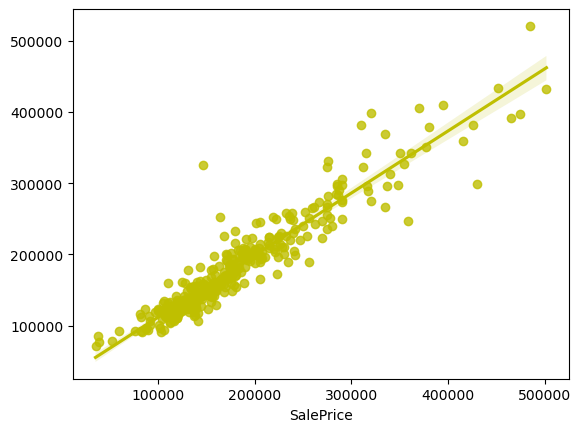

In [138]:
# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="y")
plt.show()

### Created ExtraTrees Regressor model and getting 89.02% R2 score using this model. From the above plot we can observe the sales price of the house. The best fit line shows there is strong linear relation between test data of trained model and predicted values.

In [139]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
gbr=r2_score(y_test,predGB)
print('R2_Score:',gbr)

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Checking cv score for Gradient Boosting Regressor
gbr_cv=cross_val_score(GB,x,y,cv=5).mean()
print("Cross Validation Score:",gbr_cv)
dif6=gbr-gbr_cv

R2_Score: 0.906317608813585
MAE: 15766.220621170556
MSE: 563878608.1876671
RMSE: 23746.12827784073
Cross Validation Score: 0.8216637462120564


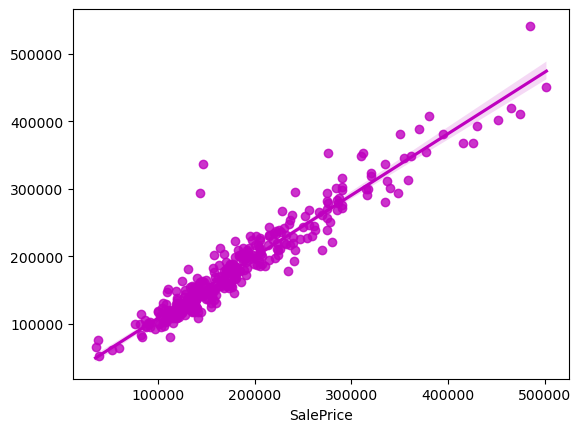

In [140]:
# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="m")
plt.show()

### Created GradientBoosting Regressor model and getting 90.63% R2 score using this model. From the above plot we can observe the sales price of the house. The best fit line shows there is strong linear relation between test data of trained model and predicted values.

In [143]:
model_list=['Linear Regressor','Lasso Regressor','Ridge Regressor','Random Forest Regressor','Extra Trees Regressor','Gradient Boosting Regressor']

In [144]:
accuracyscore=[lir,las,rid,rfr,etr,gbr]

In [145]:
crossvalidationscore=[lr_cv,las_cv,rid_cv,rfr_cv,etr_cv,gbr_cv]

In [146]:
models=pd.DataFrame({})
models["Regressor Type"]=model_list
models["Accuracy score"]=accuracyscore
models["Cross validation Score"]=crossvalidationscore

models

Regressor Type  Accuracy score  Cross validation Score
0             Linear Regressor        0.847388                0.801539
1              Lasso Regressor        0.847420                0.801563
2              Ridge Regressor        0.853019                0.805635
3      Random Forest Regressor        0.898907                0.834384
4        Extra Trees Regressor        0.890589                0.832226
5  Gradient Boosting Regressor        0.906318                0.821664

## From the difference between R2 score and Cross Validation Score I can conclude that Lasso Regressor  as my best fitting model as it is giving less difference compare to other models. Let's perform Hyperparameter tuning to increase the model accuracy.

# Hyper Parameter Tuning

In [148]:
# Checking best alpha value
parameters={'alpha':[1e-15,1e-10, 1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso=Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 100}


In [149]:
GCV=GridSearchCV(Lasso(),parameters,cv=5)

In [150]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [151]:
# Getting best parameters
GCV.best_params_

{'alpha': 100}

R2_Score: 84.98663819231868
Mean absolute error: 21568.63462492266
Mean squared error: 903661131.3098979
Root Mean Squared error: 30060.956926051073


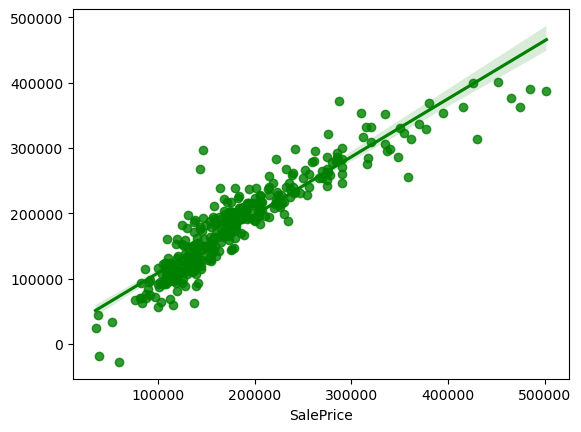

In [152]:
# Creating final model
Final_Model = Lasso(alpha=100)

# Prediction
Final_Model.fit(x_train, y_train)
pred = Final_Model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('Mean absolute error:',metrics.mean_absolute_error(y_test, pred))
print('Mean squared error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicteed values
sns.regplot(y_test,pred,color="g")
plt.show()

# Saving the Final model

In [153]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_Model,"HPP.pkl")

['HPP.pkl']

# Predicition

In [154]:
# Loading the saved model
Model=joblib.load("HPP.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([130311.74712278, 171307.4717253 , 120488.90358829, 278299.72009069,
       119730.83314292,  66882.60213468,  76379.91548522, 351490.66623834,
       282994.95742549, 227547.17702939, 281404.42021956, 136594.10608936,
       210394.89564958, 215191.89121763, 161923.15339446, 189153.37533034,
       163971.9704443 , 210204.59377181, 156726.12626001, 164590.7093591 ,
       165845.52556881, 332666.16856972, 192706.13545694, 227786.42493619,
        93302.45795721, 121480.63555075, 179636.35864987, 240286.52638251,
        99393.81565065, 150642.65320671, 321531.28543223, 208178.35440061,
       131144.58085426, 209986.72066747,  70592.94951418, 193150.91757516,
       149974.1291865 ,  44788.24352982, 204170.25627163, 205011.22430865,
       215555.38095035, 223369.38607116, 131617.28870082, 211836.72807797,
       188635.86364158, 207048.77808246, 278243.29188191, 200395.78946709,
       182962.3431006 , 181616.10117358, 175241.66019316, -18833.46791026,
       198089.71161549,  

In [155]:
pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0    130311.747123  137000.0
1    171307.471725  168500.0
2    120488.903588  115000.0
3    278299.720091  280000.0
4    119730.833143  140000.0
5     66882.602135   76000.0
6     76379.915485   88000.0
7    351490.666238  335000.0
8    282994.957425  222000.0
9    227547.177029  227000.0
10   281404.420220  286000.0
11   136594.106089  132250.0
12   210394.895650  189000.0
13   215191.891218  193500.0
14   161923.153394  140000.0
15   189153.375330  198900.0
16   163971.970444  157500.0
17   210204.593772  226700.0
18   156726.126260  164900.0
19   164590.709359  168000.0
20   165845.525569  173733.0
21   332666.168570  320000.0
22   192706.135457  171750.0
23   227786.424936  254000.0
24    93302.457957   82500.0
25   121480.635551  133000.0
26   179636.358650  143000.0
27   240286.526383  232000.0
28    99393.815651  126175.0
29   150642.653207  127000.0
30   321531.285432  276000.0
31   208178.354401  185000.0
32   131144.580854  119500.0
33   209986.720667  190000.0
34    70592.949514   82000.0
35   193150.917575  170000.0
36   149974.129187  146000.0
37    44788.243530   37900.0
38   204170.256272  168500.0
39   205011.224309  203000.0
40   215555.380950  227875.0
41   223369.386071  200000.0
42   131617.288701  133000.0
43   211836.728078  157500.0
44   188635.863642  234000.0
45   207048.778082  190000.0
46   278243.291882  259000.0
47   200395.789467  178000.0
48   182962.343101  159000.0
49   181616.101174  174000.0
50   175241.660193  176000.0
51   -18833.467910   39300.0
52   198089.711615  175000.0
53    93824.031262  124500.0
54   103446.435862  120000.0
55   262305.503908  275000.0
56   286067.467652  348000.0
57   164498.415285  153500.0
58    97298.473941   92000.0
59   236644.035683  214000.0
60    68283.414241  112000.0
61    84235.383114   90000.0
62   192933.327614  169990.0
63   354182.493785  310000.0
64   150802.024341  135000.0
65   203376.601767  191000.0
66   268251.500989  275000.0
67   -27422.632244   60000.0
68   153449.755998  156000.0
69   199013.481897  169000.0
70   215630.037011  194000.0
71   211800.904536  204900.0
72    64929.032008  103200.0
73   238102.202147  164000.0
74   192121.085988  165000.0
75   261630.236613  240000.0
76   119187.089830  139000.0
77   227744.924085  224000.0
78   258236.586234  278000.0
79   127271.281067  154900.0
80   390052.299893  485000.0
81   124130.982174  128900.0
82   195750.555553  204750.0
83   205185.863436  187100.0
84   194537.134477  174000.0
85   257168.734311  215000.0
86   195887.034539  211000.0
87   296642.149005  147000.0
88   162475.577479  179400.0
89    63191.579395   83000.0
90   117468.874063  120000.0
91   196966.108584  173000.0
92   199258.902942  230000.0
93   134762.513684  160000.0
94   119592.560603  136500.0
95   102261.170252  113000.0
96   109115.651105  119000.0
97   127003.874348  133000.0
98   254879.236679  249700.0
99   123971.731692  112000.0
100  152671.142588  119000.0
101  271291.729210  290000.0
102  256412.433021  359100.0
103  191195.071142  192500.0
104  275947.736227  315750.0
105  280541.335948  261500.0
106  192344.214023  178000.0
107  232383.072565  241500.0
108  112674.115648  118500.0
109   91461.305416  108000.0
110  159439.262252  156000.0
111  231060.559893  241000.0
112  221296.899707  168000.0
113  217186.024012  171000.0
114  201894.200510  205000.0
115  112140.262355  136905.0
116  119648.332401  138500.0
117  247179.728809  290000.0
118  220349.186548  222000.0
119  216881.782007  230000.0
120  188647.982734  154000.0
121  100337.779563  110000.0
122  202580.712192  180000.0
123  128376.140813  145000.0
124  192954.899071  195000.0
125  227190.891502  205000.0
126  187959.832397  200000.0
127  184472.707017  205000.0
128  139224.027369  155900.0
129  363356.290195  475000.0
130  202019.211383  176500.0
131  363308.561175  415298.0
132  245823.031776  219210.0
133  323420.053817  354000.0
134   34278.461968   52500.0
135  226950.332731  184000.0
136  202017.863270  187750.0
137  19